In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [3]:
data_path = os.path.join("..", "data")

dir_store_path = os.path.join(data_path, "temporary results")

full_dataset_path = os.path.join(dir_store_path, "overall_dataset.xlsx")

In [4]:
dataset_df = pd.read_excel(full_dataset_path)

In [5]:
dataset_df

DateTime Site Technician Water Quality Technician Counting  \
0   2023-01-31 10:40:00    A                    Randa               Randa   
1   2023-02-07 07:30:00    A                    Randa               Randa   
2   2023-02-14 09:00:00    A                    Randa               Randa   
3   2023-02-21 15:15:00    A                    Randa               Randa   
4   2023-02-22 11:50:00    A                    Randa               Randa   
..                  ...  ...                      ...                 ...   
262 2023-01-31 12:13:00    F                    Randa               Randa   
263 2023-02-07 08:48:00    F                    Randa               Randa   
264 2023-02-14 10:25:00    F                    Randa               Randa   
265 2023-02-21 16:40:00    F                    Randa               Randa   
266 2023-04-20 13:25:00    F                    Randa                Anan   

     Temp C_mean  Temp C_std  Ph_mean    Ph_std  Cond (ms)_mean  \
0           9.75    0.353553     8.30  0.141421           0.710   
1           6.50    0.707107     7.80  0.141421           0.745   
2           8.50    0.707107     7.80  0.000000           0.845   
3          10.50    0.707107     7.95  0.070711           1.290   
4          12.00         NaN     7.90       NaN           0.740   
..           ...         ...      ...       ...             ...   
262         8.10    0.282843     8.09  0.014142           0.765   
263         6.00    0.000000     8.10  0.000000           0.785   
264         8.50    0.707107     7.95  0.070711           0.780   
265         9.50    0.707107     8.00  0.141421           1.140   
266        13.50    0.577350     7.95  0.057735         622.500   

     Cond (ms)_std  Coliform (1ml)_mean  Coliform (1ml)_std  Ecoli (1ml)_mean  \
0         0.028284                10.00            4.242641               3.0   
1         0.007071                17.00            2.828427               6.5   
2         0.021213                23.50            3.535534               7.5   
3         0.028284                16.00            5.656854               6.0   
4              NaN                54.00                 NaN               4.0   
..             ...                  ...                 ...               ...   
262       0.007071                 6.00            2.828427               7.5   
263       0.007071                14.00            0.000000               8.0   
264       0.000000                12.50            3.535534               5.0   
265       0.028284                20.00            7.071068               5.0   
266       8.660254                47.25           39.101364               3.0   

     Ecoli (1ml)_std  cso_hinterland  cso_middle  cso_sea  rained  \
0           0.000000        0.333333    0.285714      0.0       0   
1           0.707107        0.500000    0.285714      0.0       0   
2           3.535534        0.833333    0.428571      0.0       1   
3           1.414214        0.833333    0.428571      0.0       0   
4                NaN        0.833333    0.571429      0.0       1   
..               ...             ...         ...      ...     ...   
262         3.535534        0.333333    0.285714      0.0       0   
263         2.828427        0.500000    0.285714      0.0       0   
264         2.828427        0.833333    0.428571      0.0       1   
265         0.000000        0.833333    0.428571      0.0       0   
266         2.160247        0.833333    0.857143      0.8       1   

     rising_tide  tide_value  
0              0    0.240592  
1              0   -0.589693  
2              0    0.215941  
3              0    0.960796  
4              1   -0.476808  
..           ...         ...  
262            0   -0.365662  
263            0   -0.907697  
264            0   -0.400976  
265            0    0.350163  
266            1    0.811674  

[267 rows x 20 columns]

# Per Site Data Visualization and Analysis

In [6]:
dataset_df.columns.to_list()

['DateTime',
 'Site',
 'Technician Water Quality',
 'Technician Counting',
 'Temp C_mean',
 'Temp C_std',
 'Ph_mean',
 'Ph_std',
 'Cond (ms)_mean',
 'Cond (ms)_std',
 'Coliform (1ml)_mean',
 'Coliform (1ml)_std',
 'Ecoli (1ml)_mean',
 'Ecoli (1ml)_std',
 'cso_hinterland',
 'cso_middle',
 'cso_sea',
 'rained',
 'rising_tide',
 'tide_value']

In [7]:
analyze_columns = [
    "Temp C_mean",
    "Ph_mean",
    "Cond (ms)_mean",
    "cso_hinterland",
    "cso_middle",
    "cso_sea",
    "rained",
    "rising_tide",
    "tide_value",
    "Ecoli (1ml)_mean",
    "Coliform (1ml)_mean",
]

## General Info

In [8]:
site_dict = {}
for site in dataset_df["Site"].unique():
    site_dict[site] = dataset_df[dataset_df["Site"] == site]

In [9]:
for site in site_dict:
    print("Site: ", site)
    print("-" * 30)
    print(site_dict[site].describe().to_string())
    print("\n")
    print(
        "Timespan: "
        + pd.to_datetime(site_dict[site]["DateTime"])
        .min()
        .strftime("%Y-%m-%d %H:%M:%S")
        + " - "
        + pd.to_datetime(site_dict[site]["DateTime"])
        .max()
        .strftime("%Y-%m-%d %H:%M:%S")
    )
    print("\n")

Site:  A
------------------------------
                            DateTime  Temp C_mean  Temp C_std    Ph_mean     Ph_std  Cond (ms)_mean  Cond (ms)_std  Coliform (1ml)_mean  Coliform (1ml)_std  Ecoli (1ml)_mean  Ecoli (1ml)_std  cso_hinterland  cso_middle    cso_sea     rained  rising_tide  tide_value
count                             49    49.000000   48.000000  49.000000  48.000000       49.000000      48.000000            49.000000           48.000000         49.000000        48.000000       49.000000   49.000000  49.000000  49.000000    49.000000   49.000000
mean   2023-07-27 02:52:37.959183872    20.343537    0.351144   7.829388   0.030378        1.658288       0.020399            88.259354           35.901640         20.875227        17.842551        0.350340    0.282799   0.257143   0.408163     0.448980   -0.023968
min              2023-01-31 10:40:00     6.500000    0.000000   7.500000   0.000000        0.000000       0.000000             6.750000            0.000000       

## Correlation Matrix Heatmap

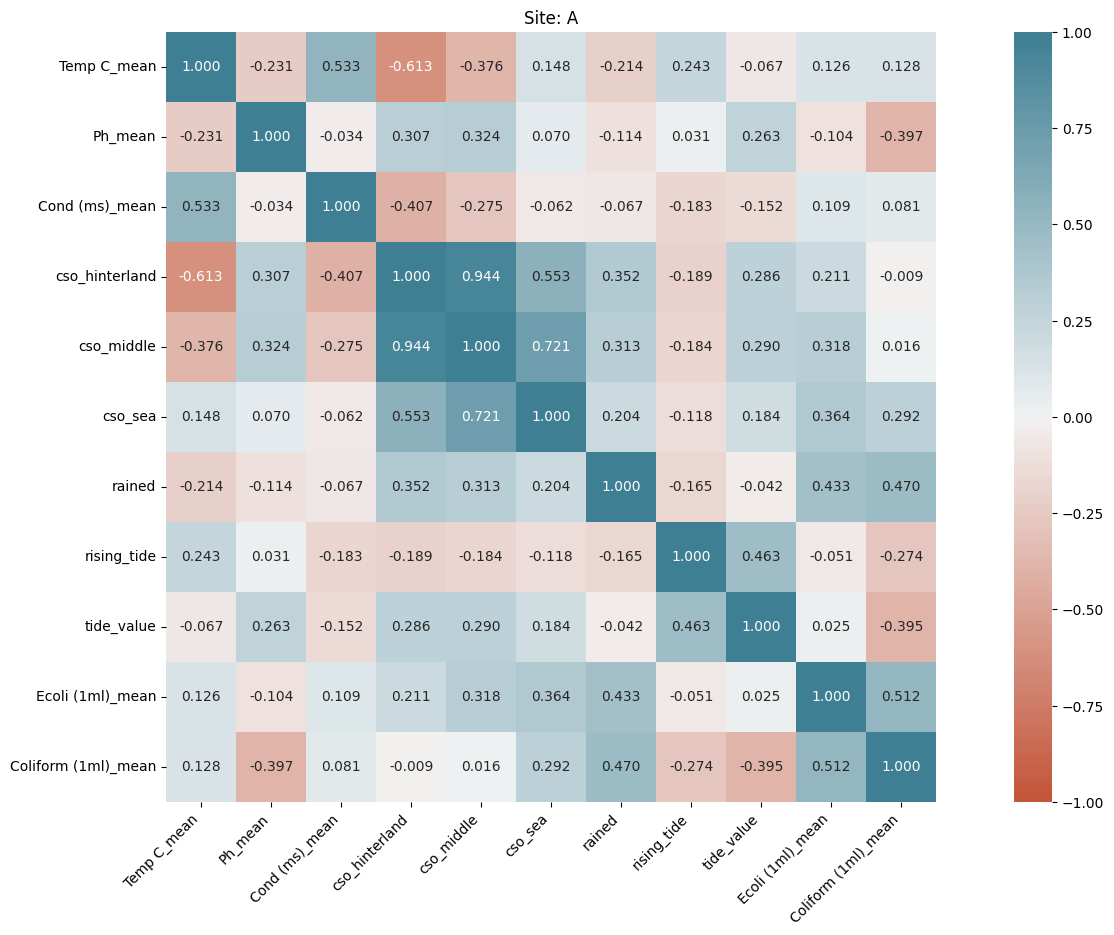

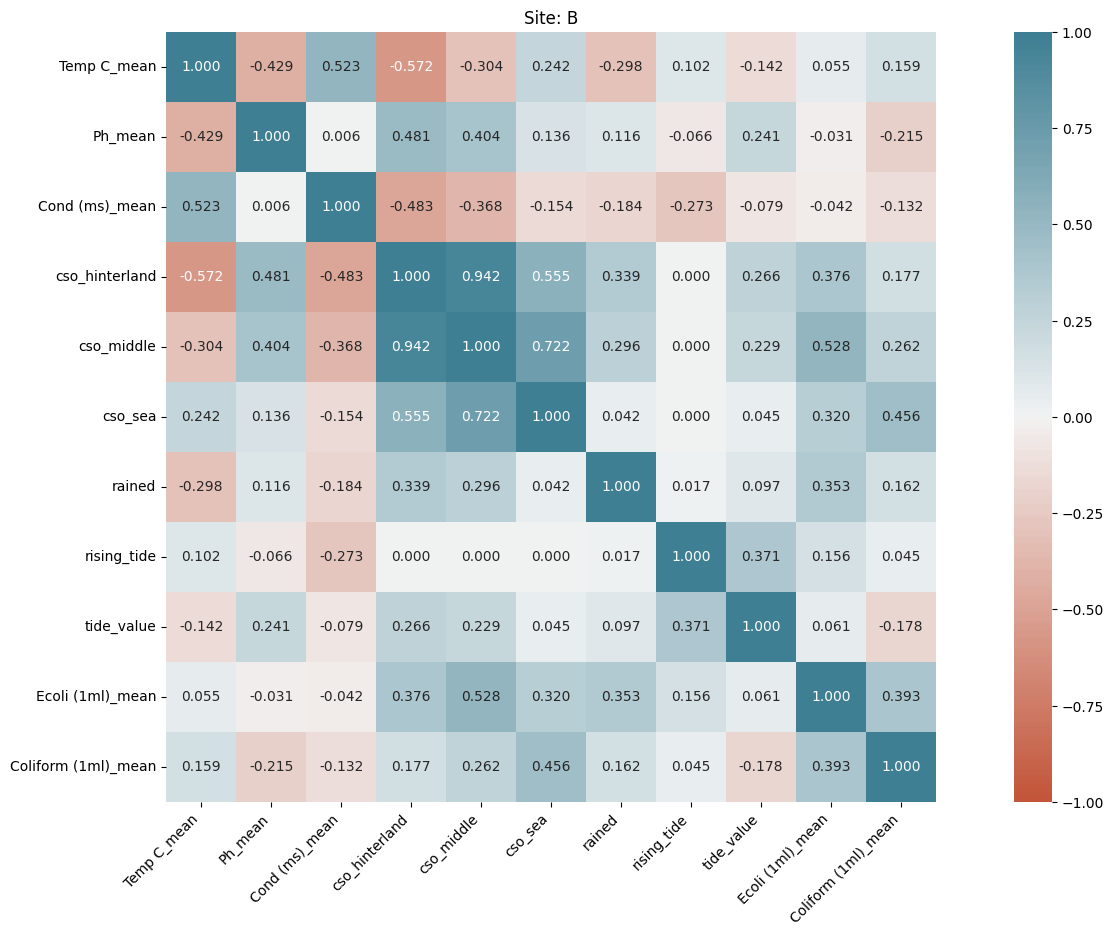

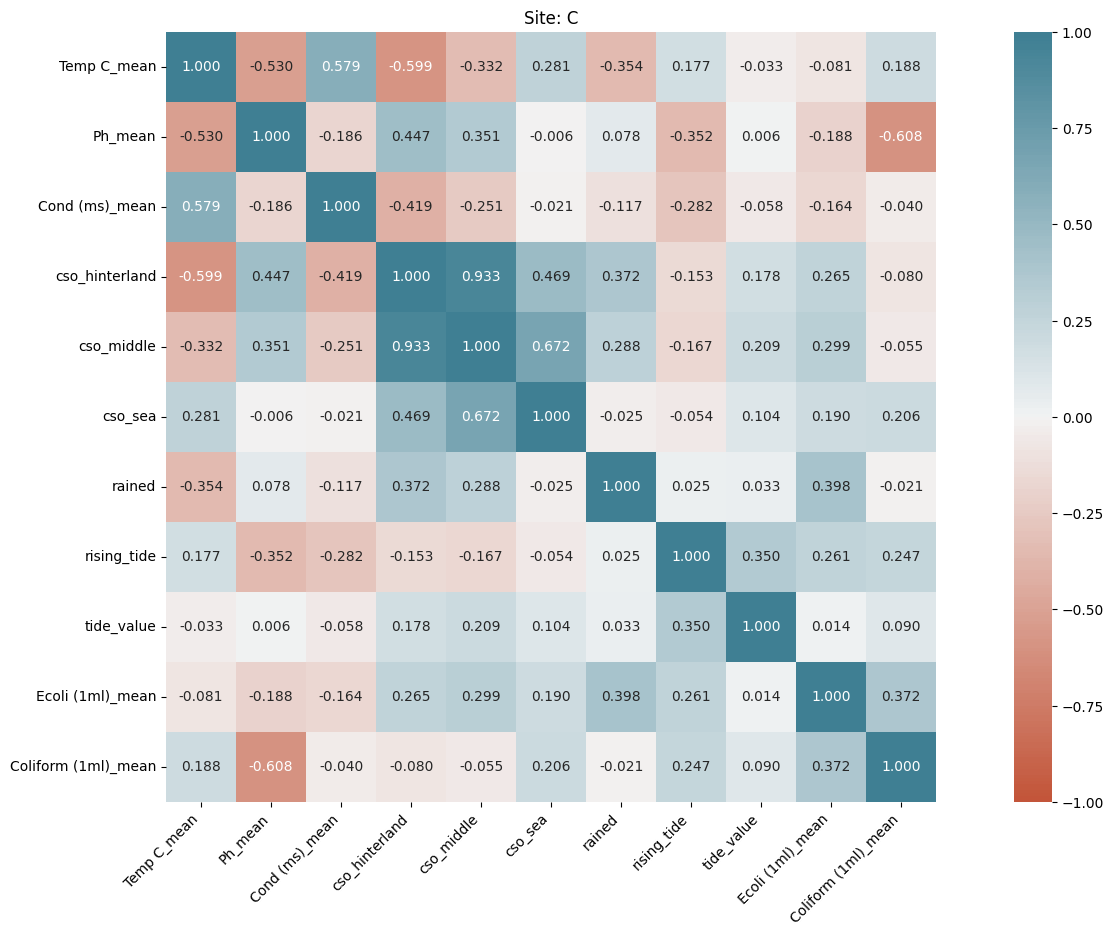

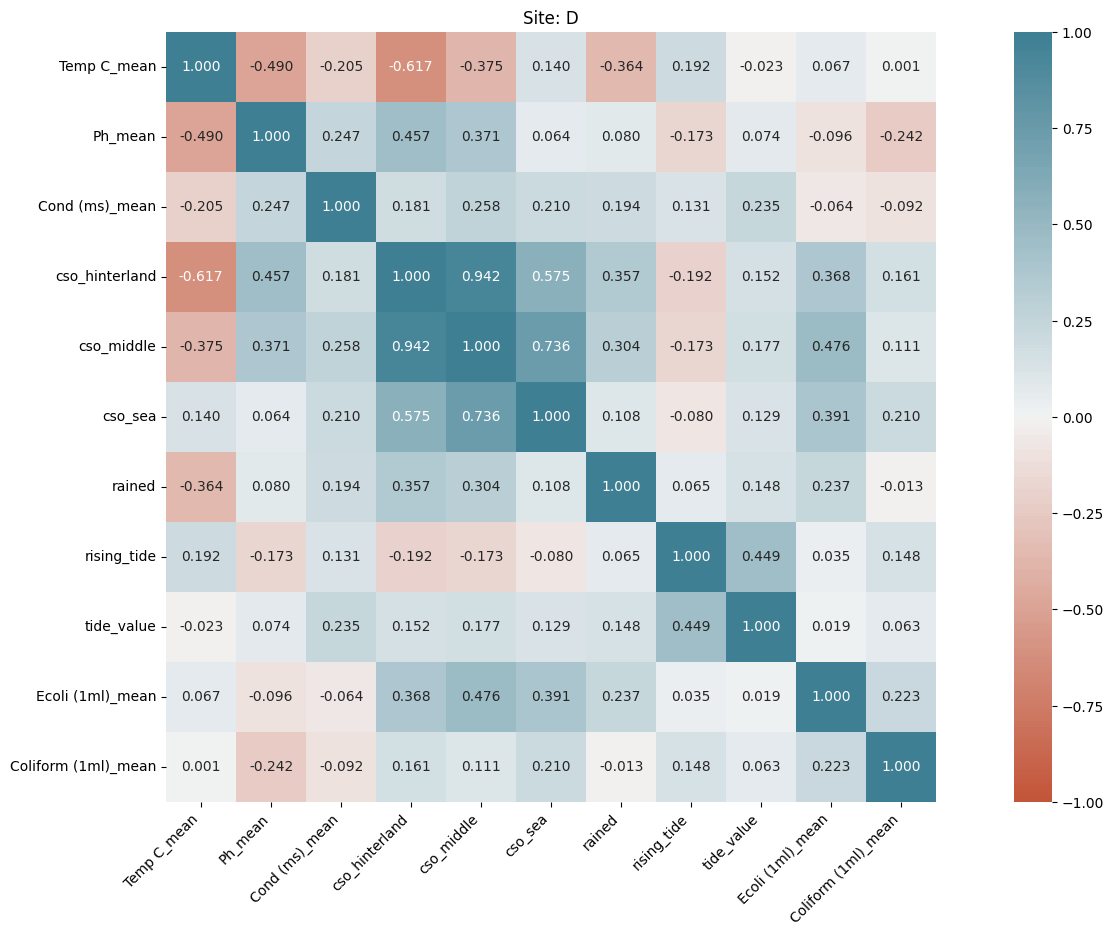

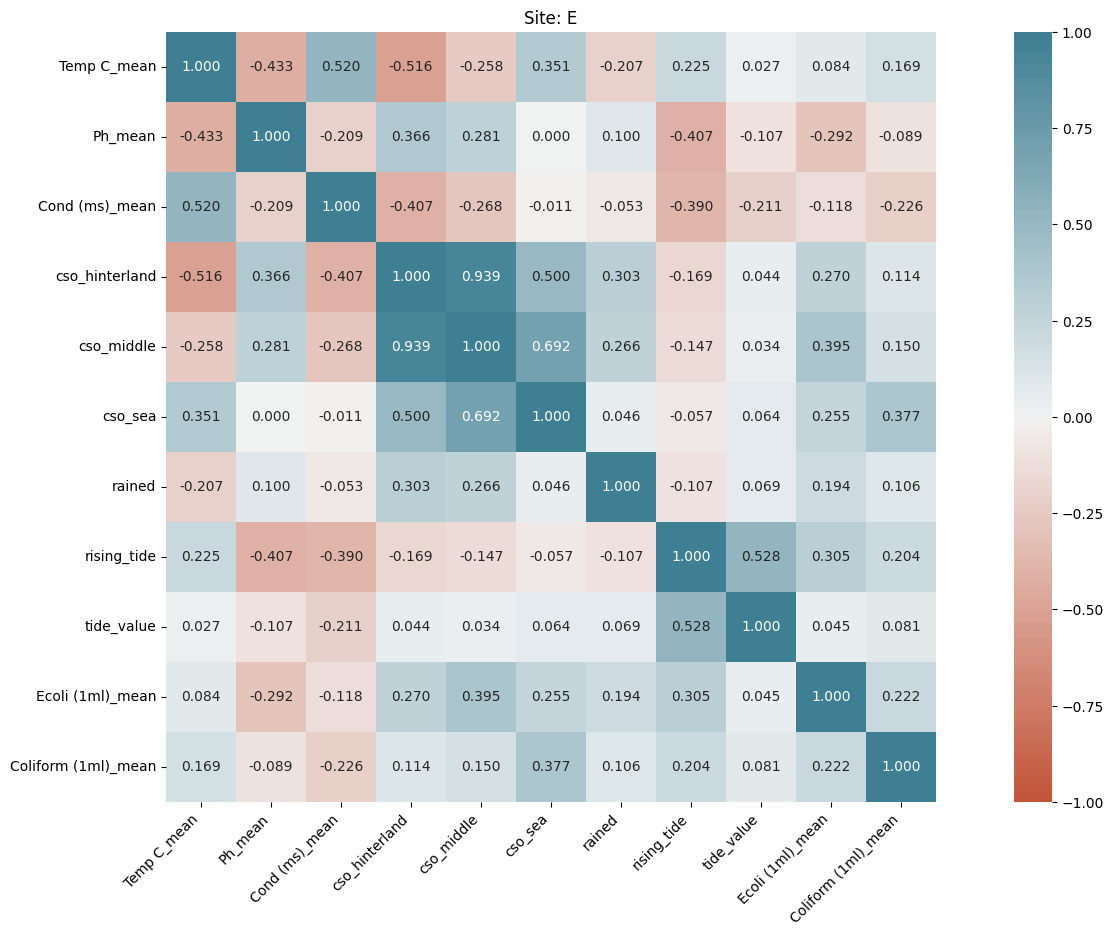

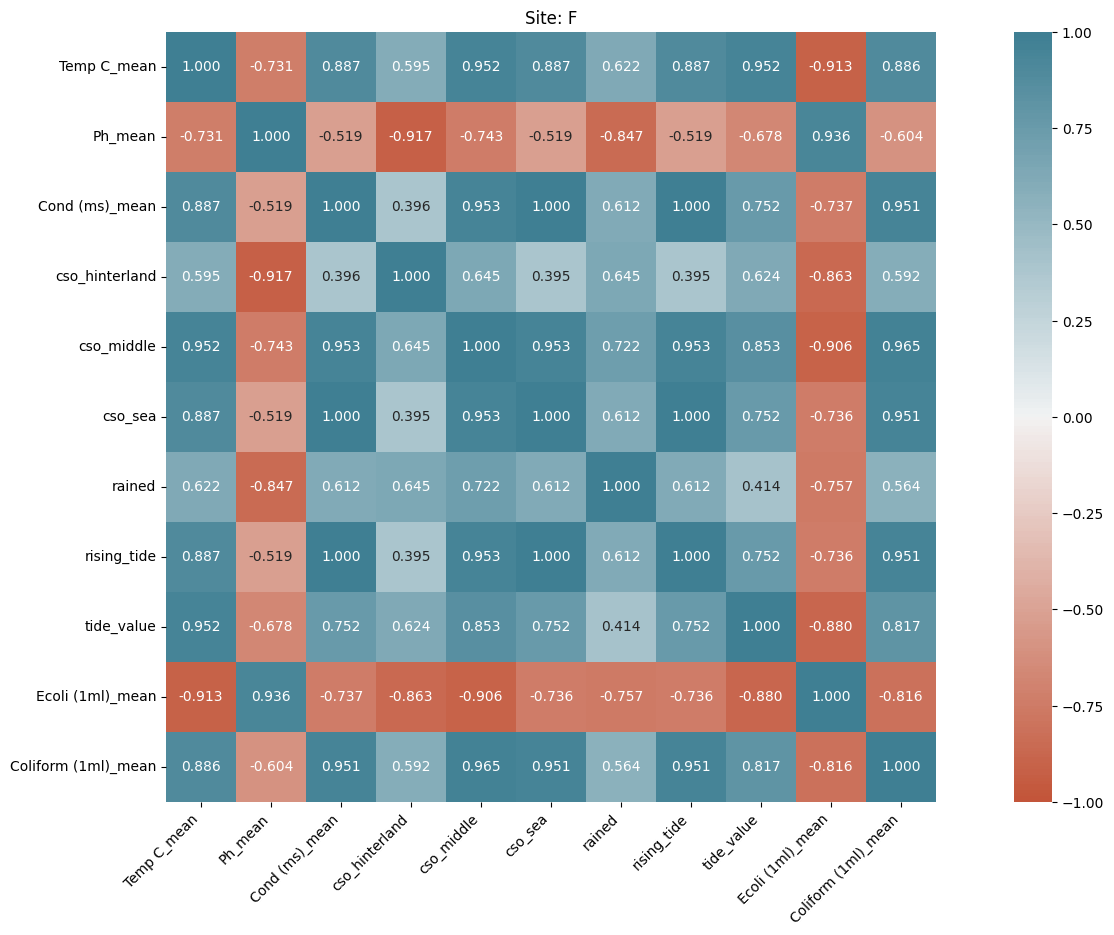

In [10]:
# Pearson, used for two quantitative continuous variables which have a linear relationship
# Spearman, used for two quantitative variables if the link is partially linear, or for one qualitative ordinal variable and one quantitative variable
# Kendall, often used for two qualitative ordinal variables

for site in site_dict:
    corr = site_dict[site][analyze_columns].corr(method="pearson")

    plt.figure(figsize=(20, 10))
    plt.title("Site: " + site)
    ax = sns.heatmap(
        corr,
        vmin=-1,
        vmax=1,
        center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        fmt=".3f",
    )
    ax.set_xticklabels(
        ax.get_xticklabels(), rotation=45, horizontalalignment="right"
    )

## Scatter Plots

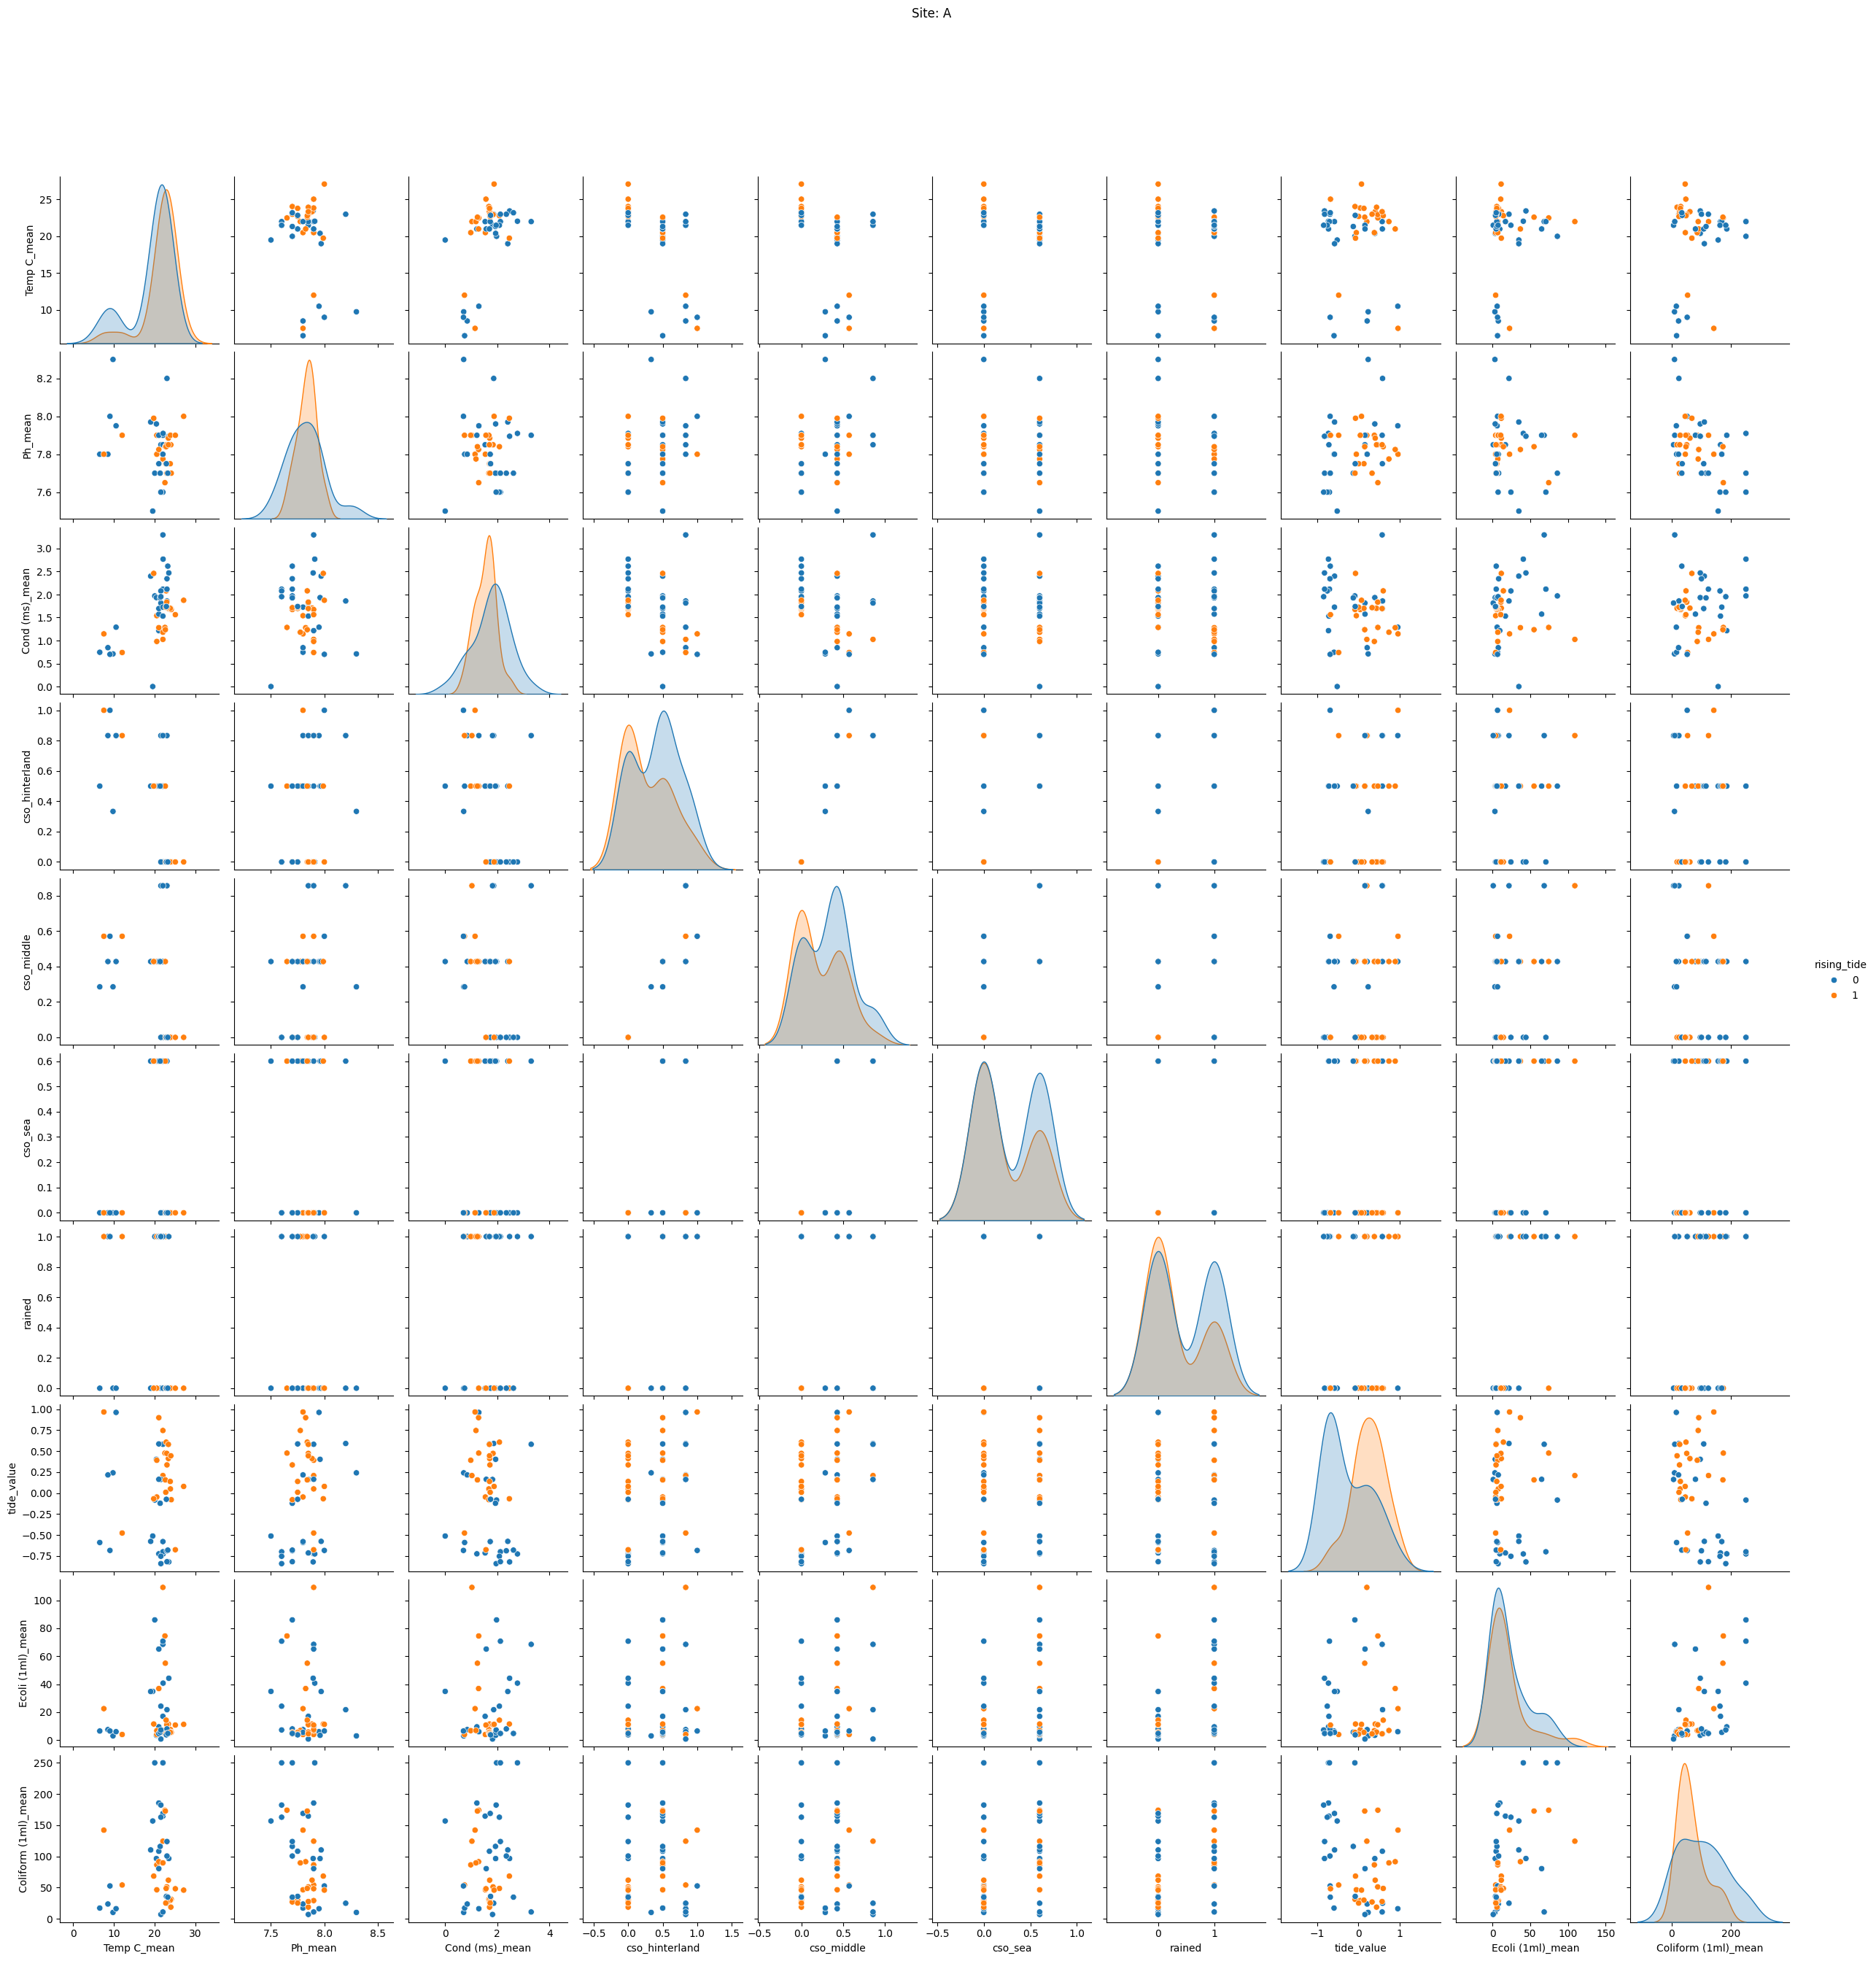

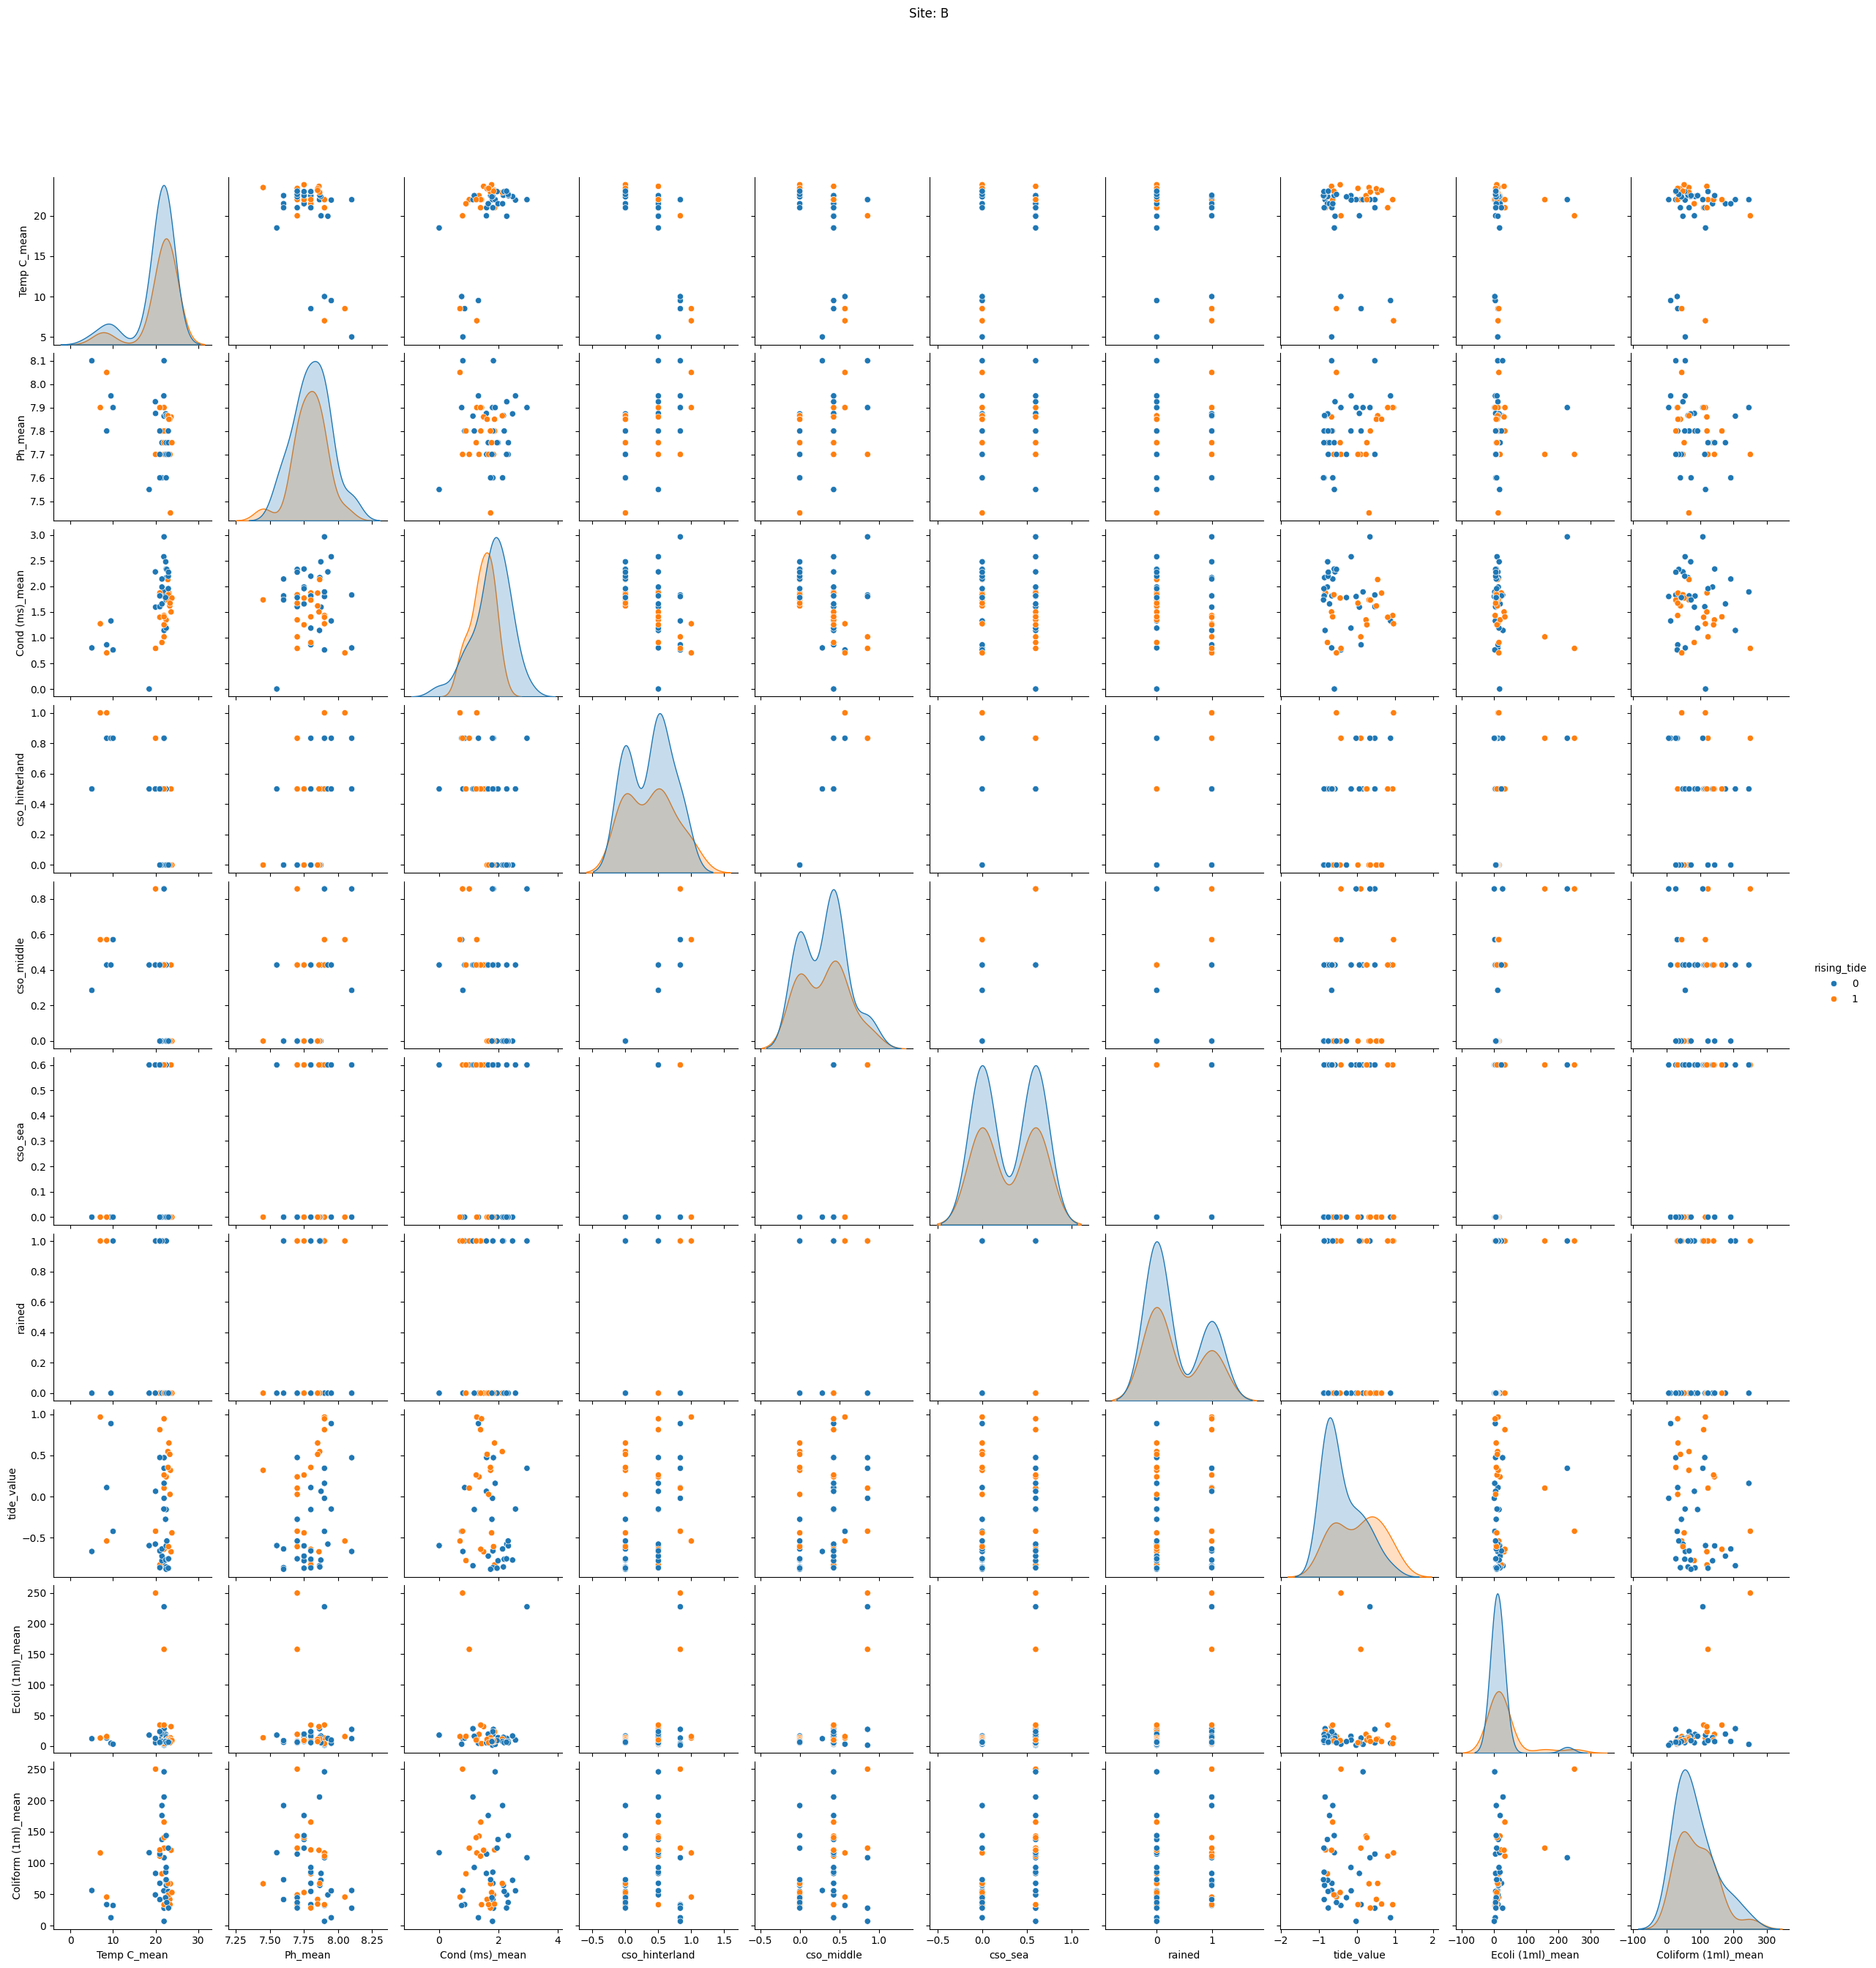

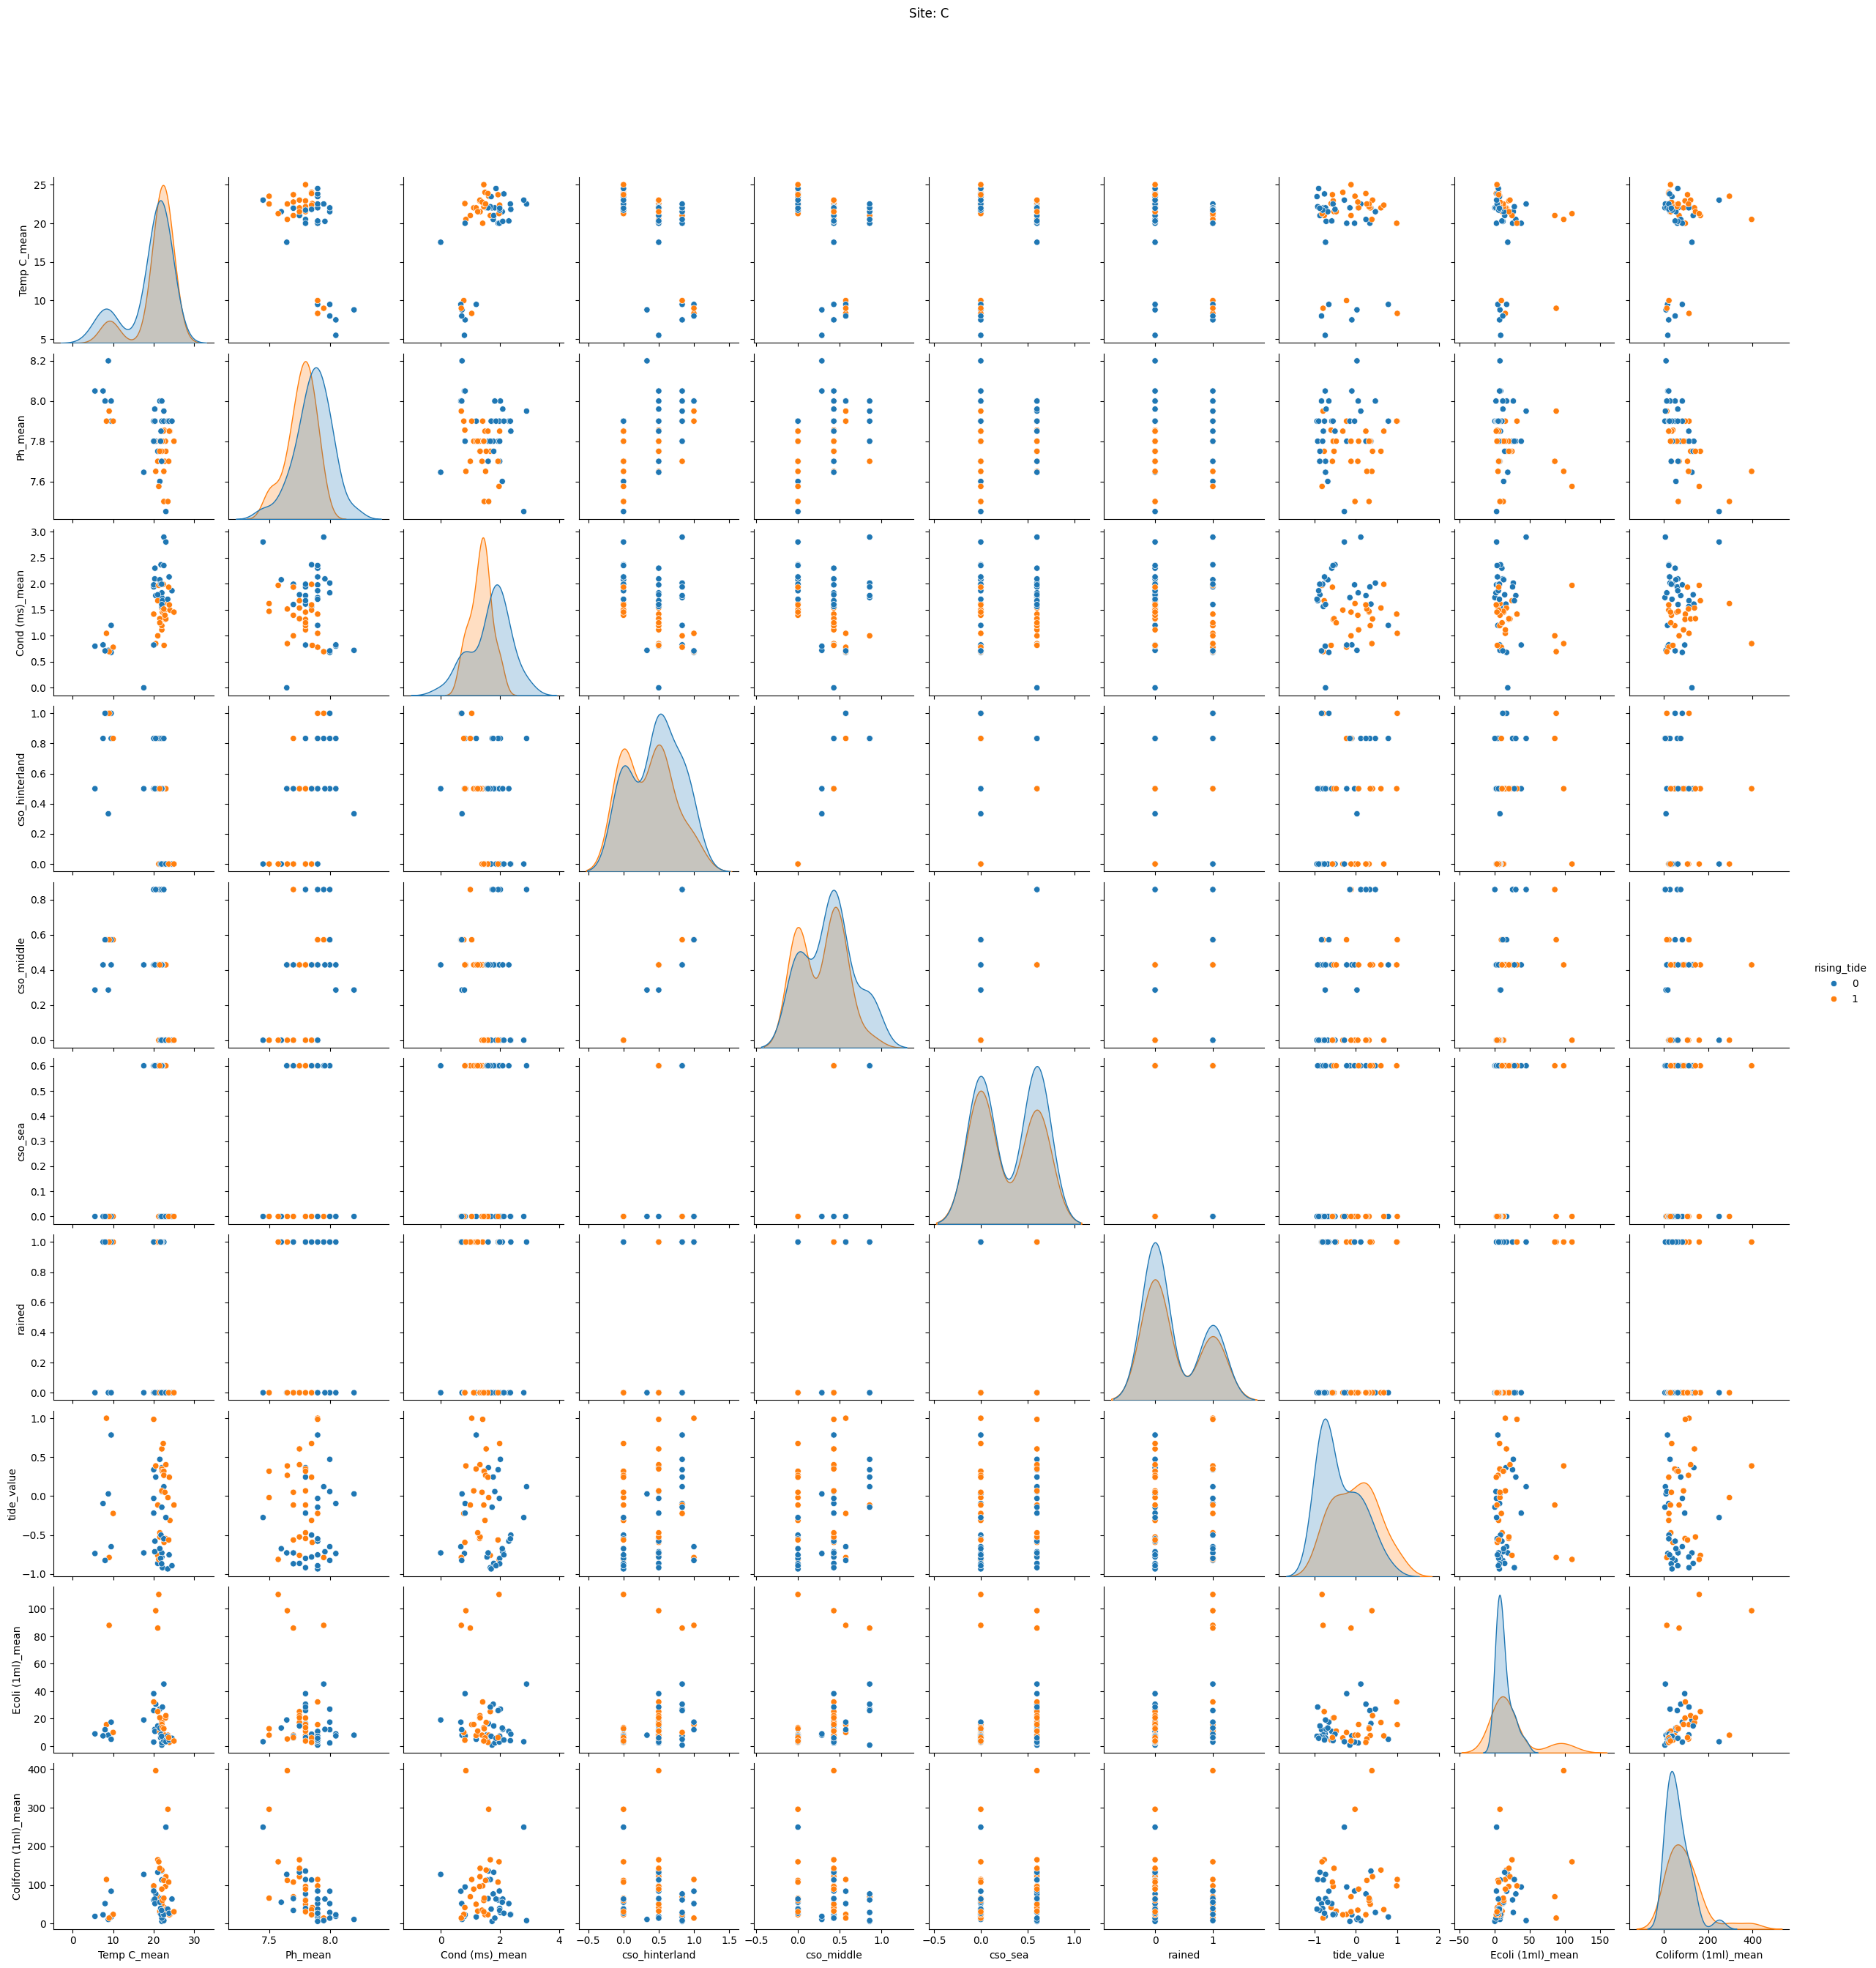

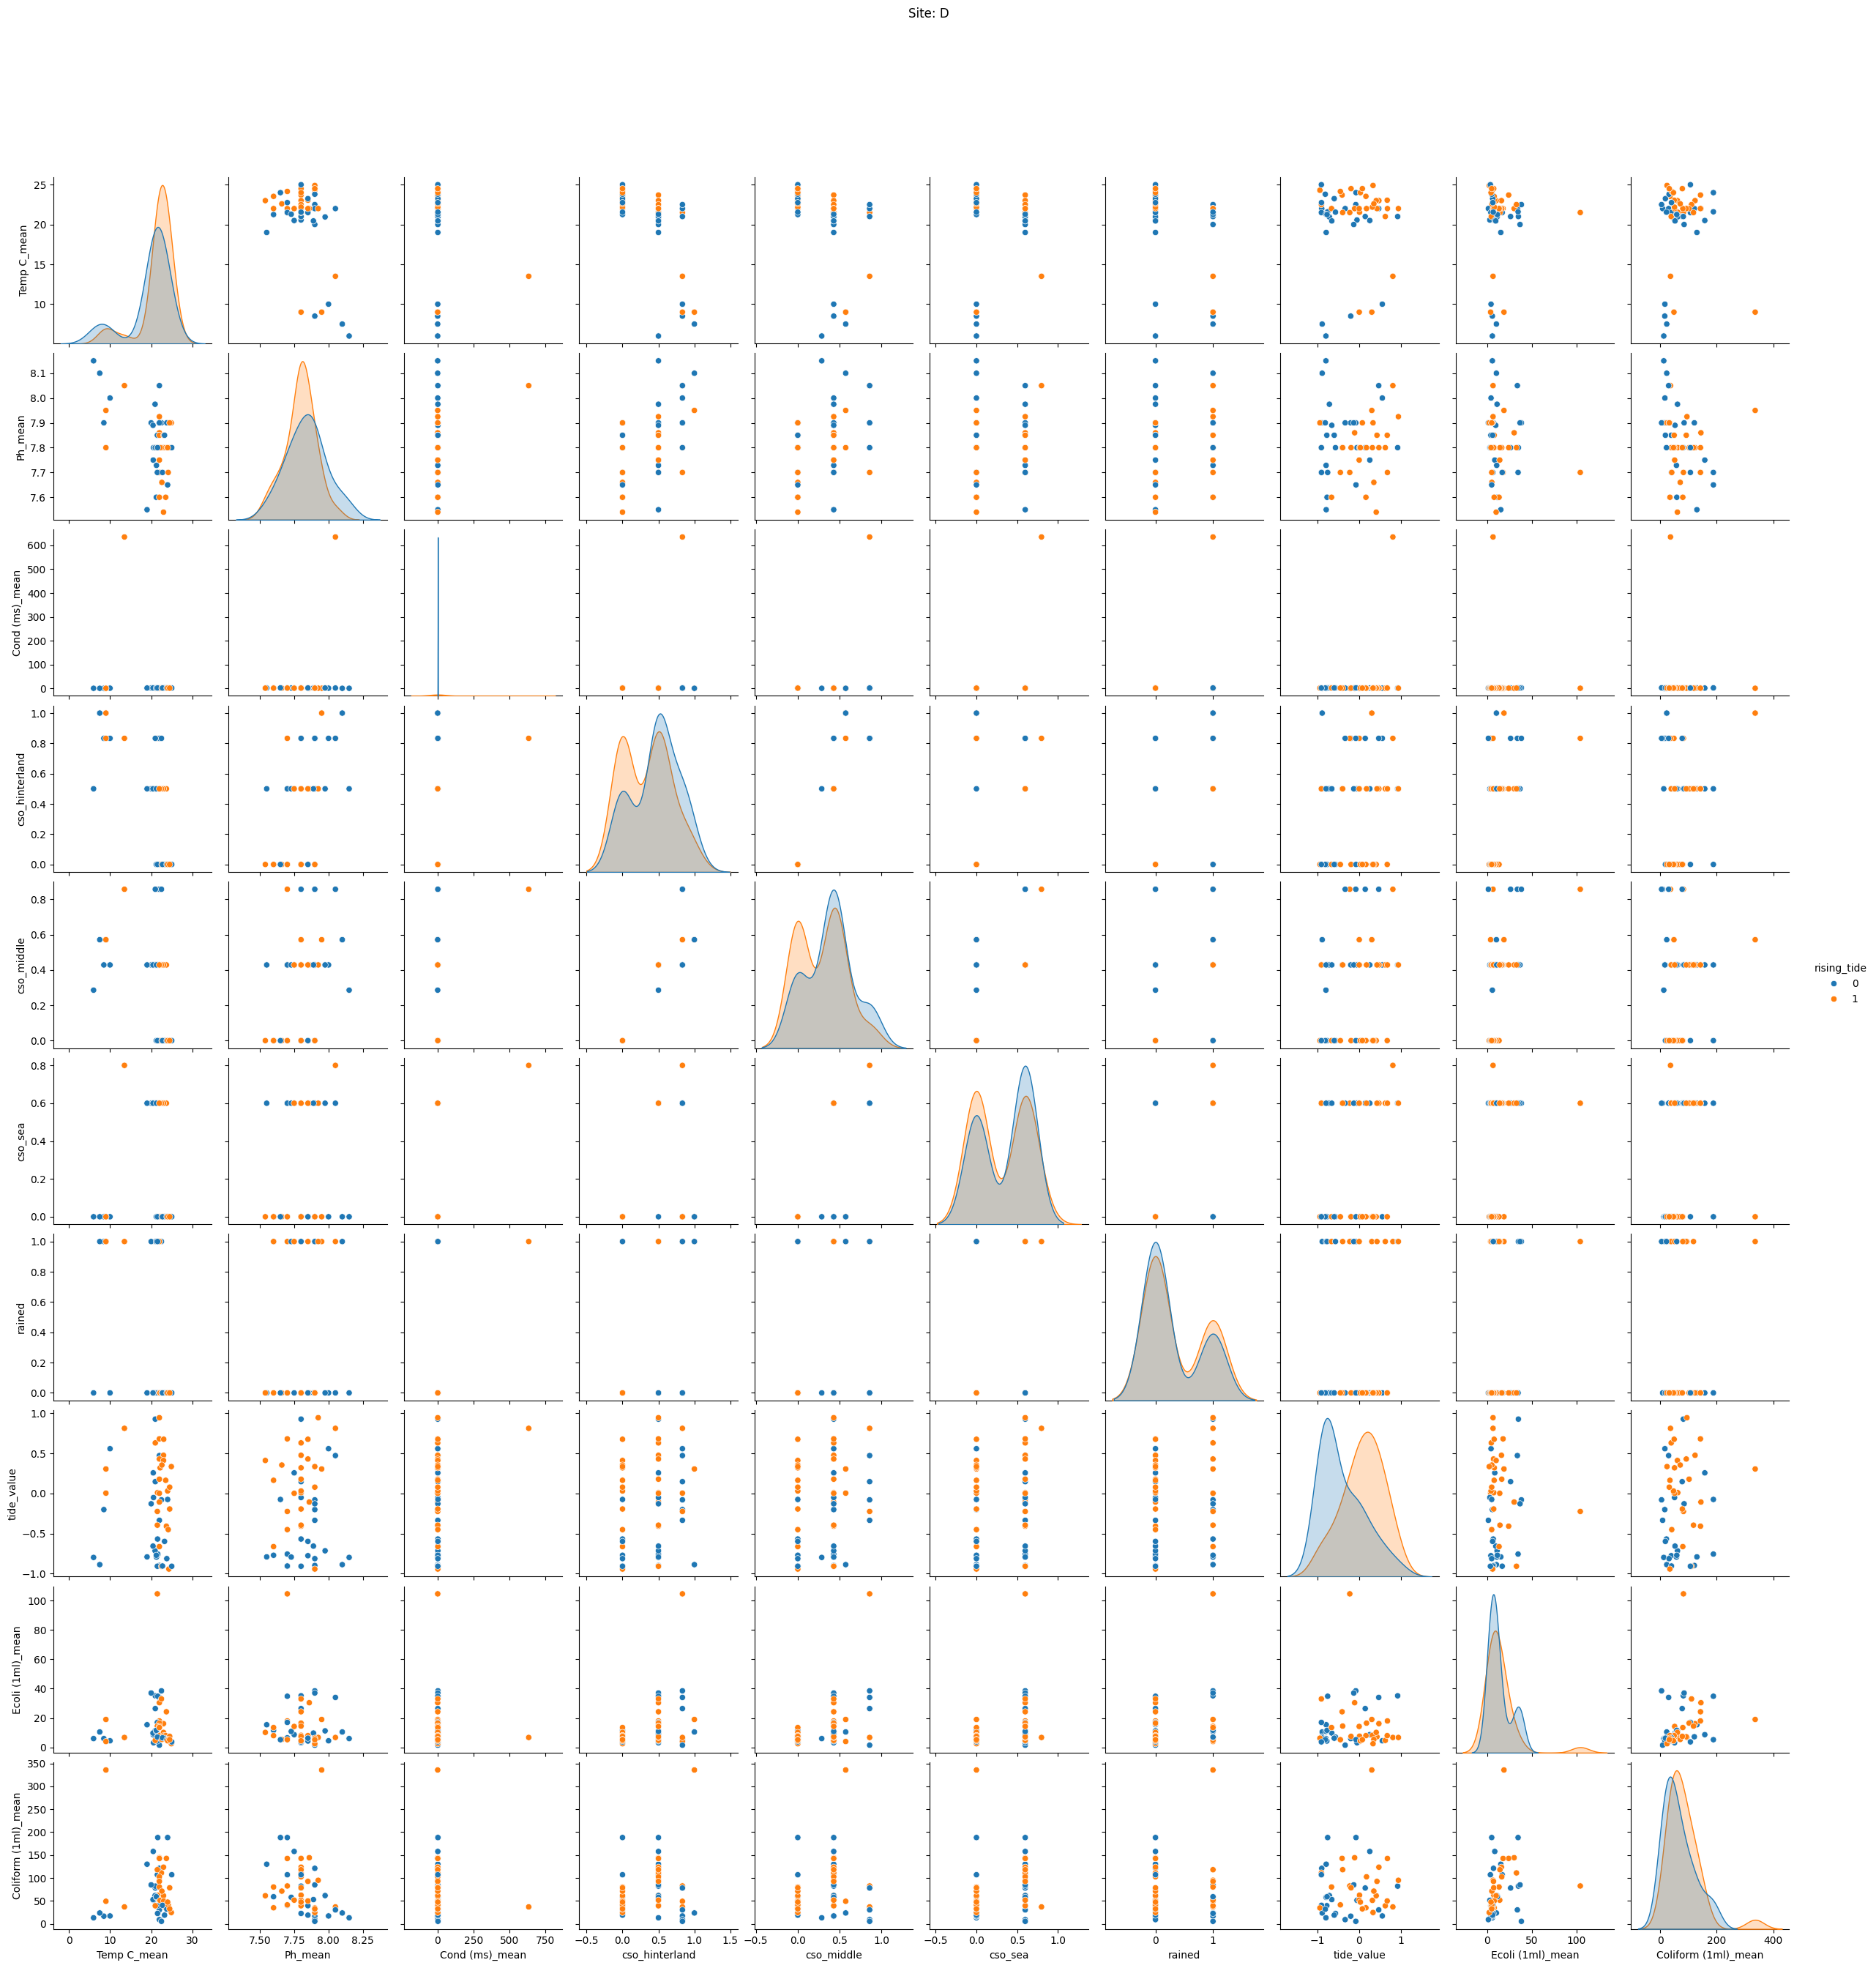

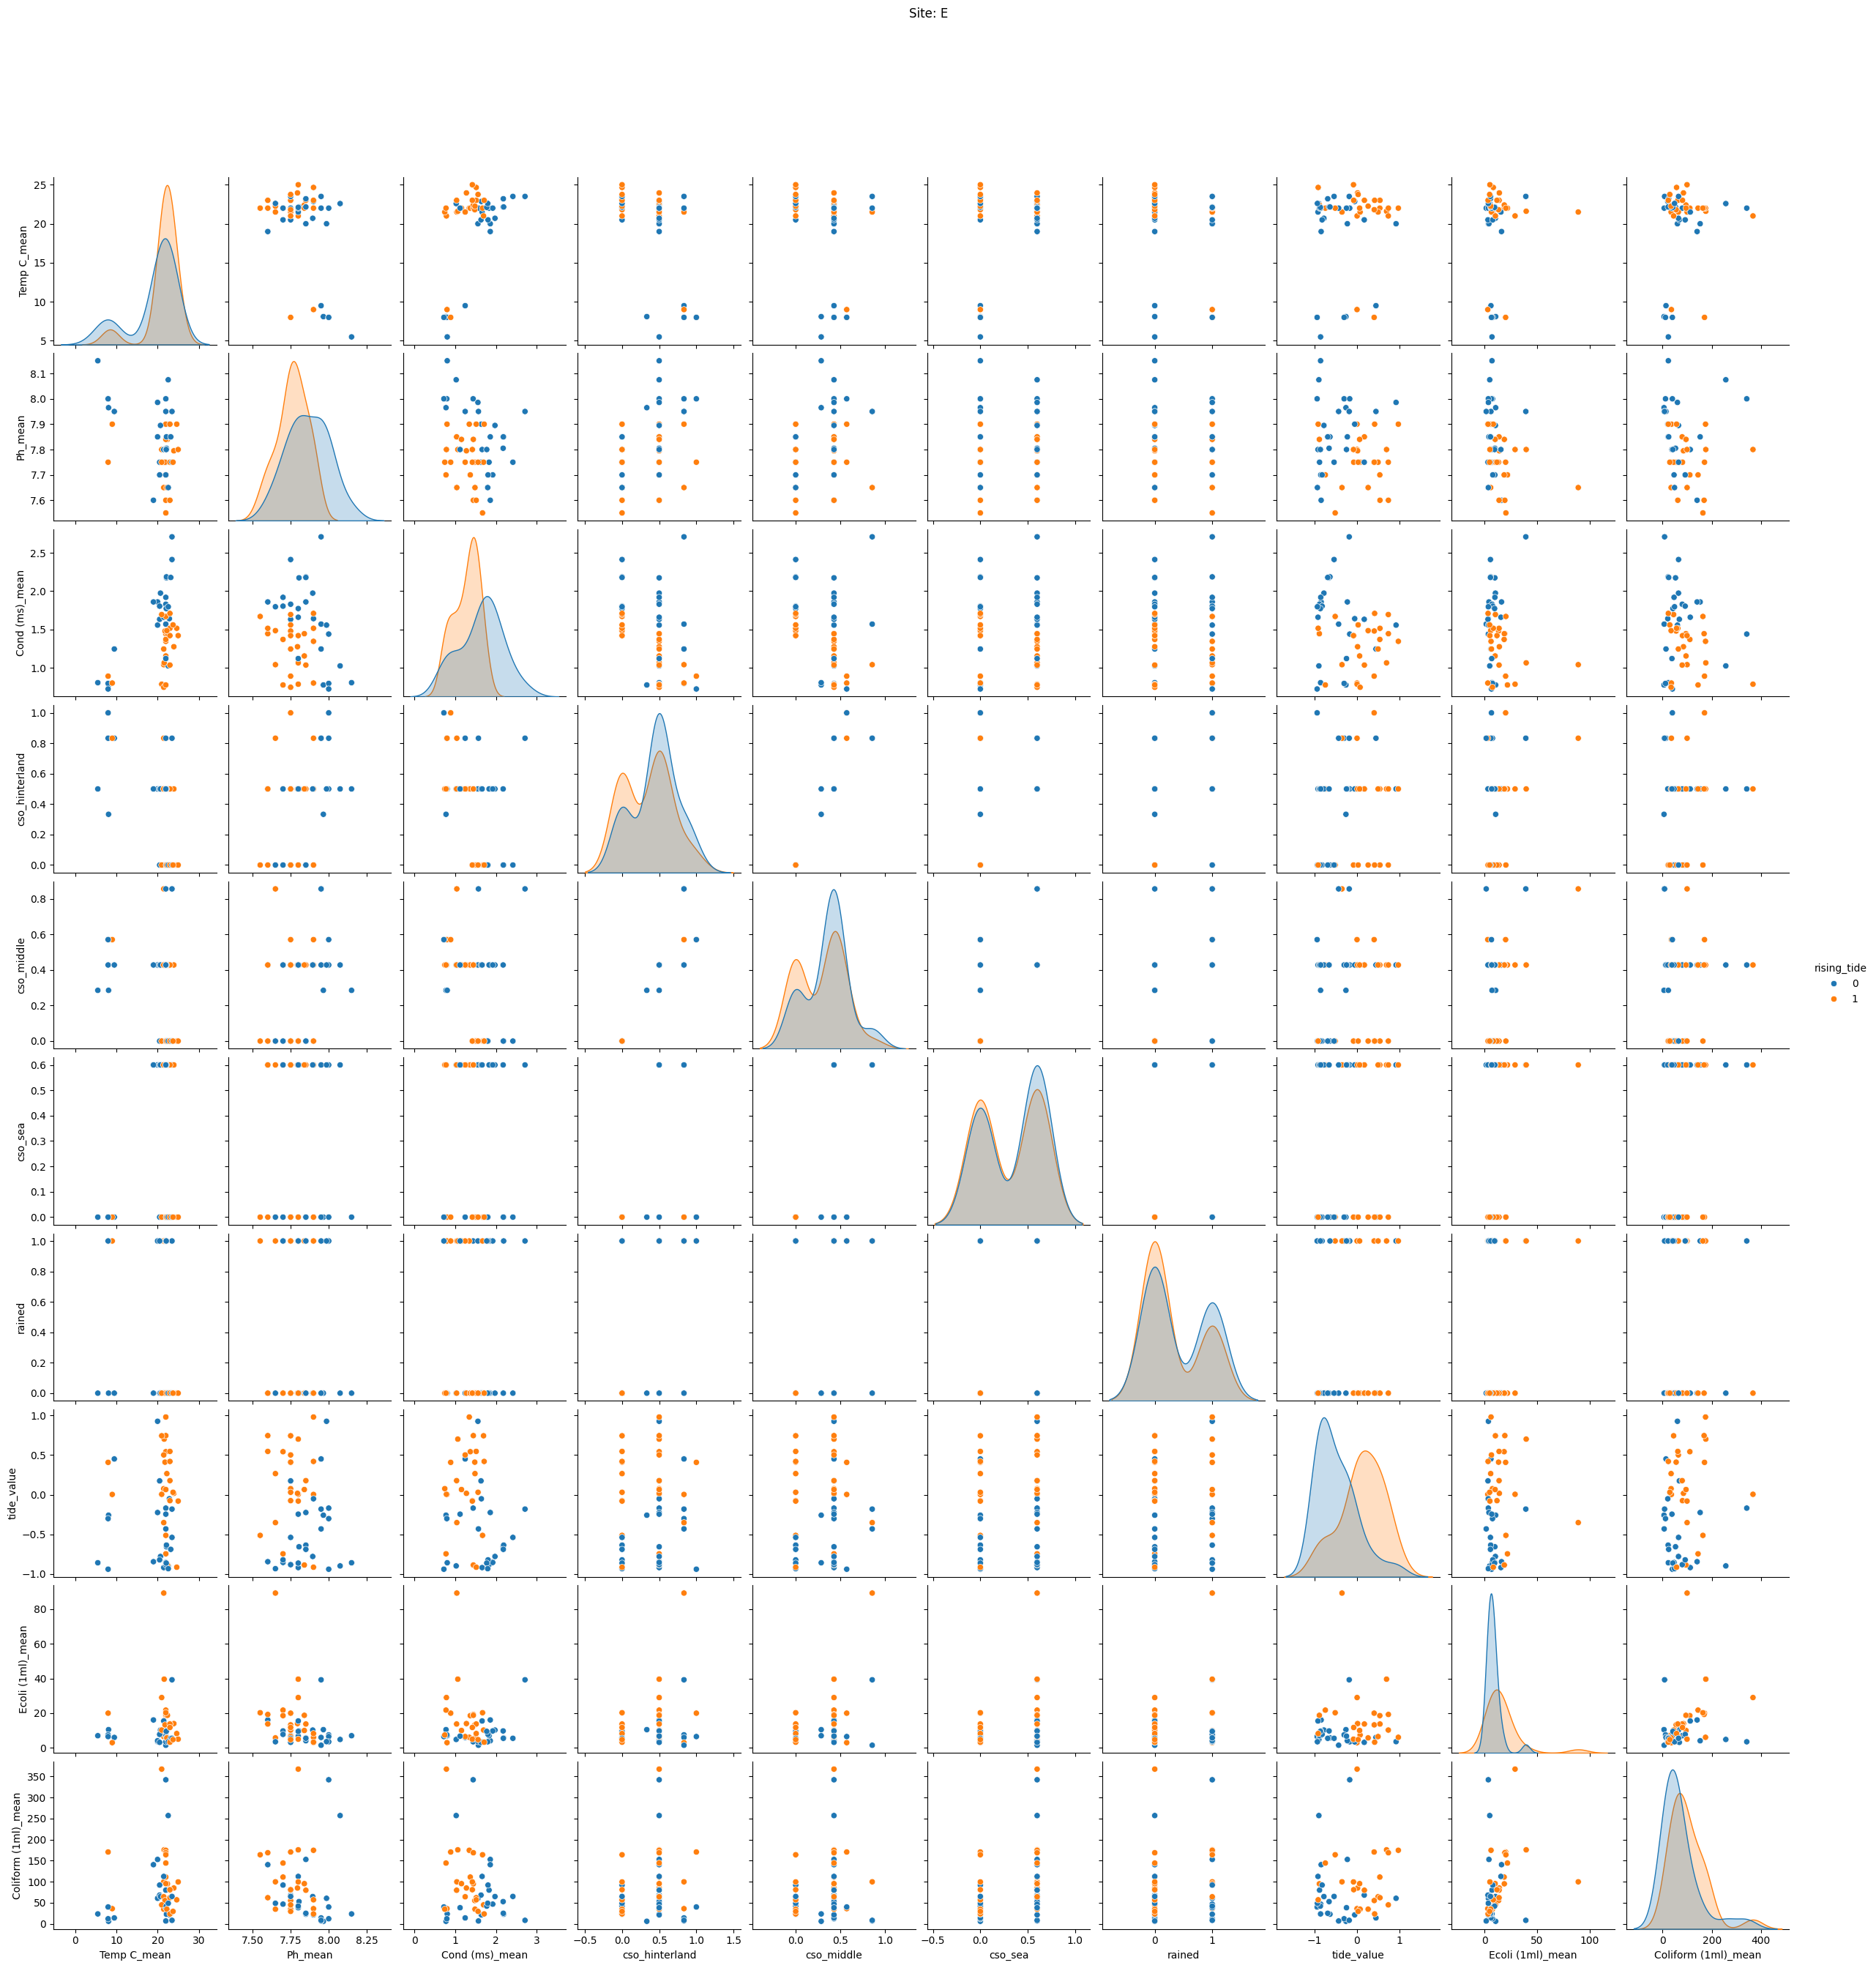

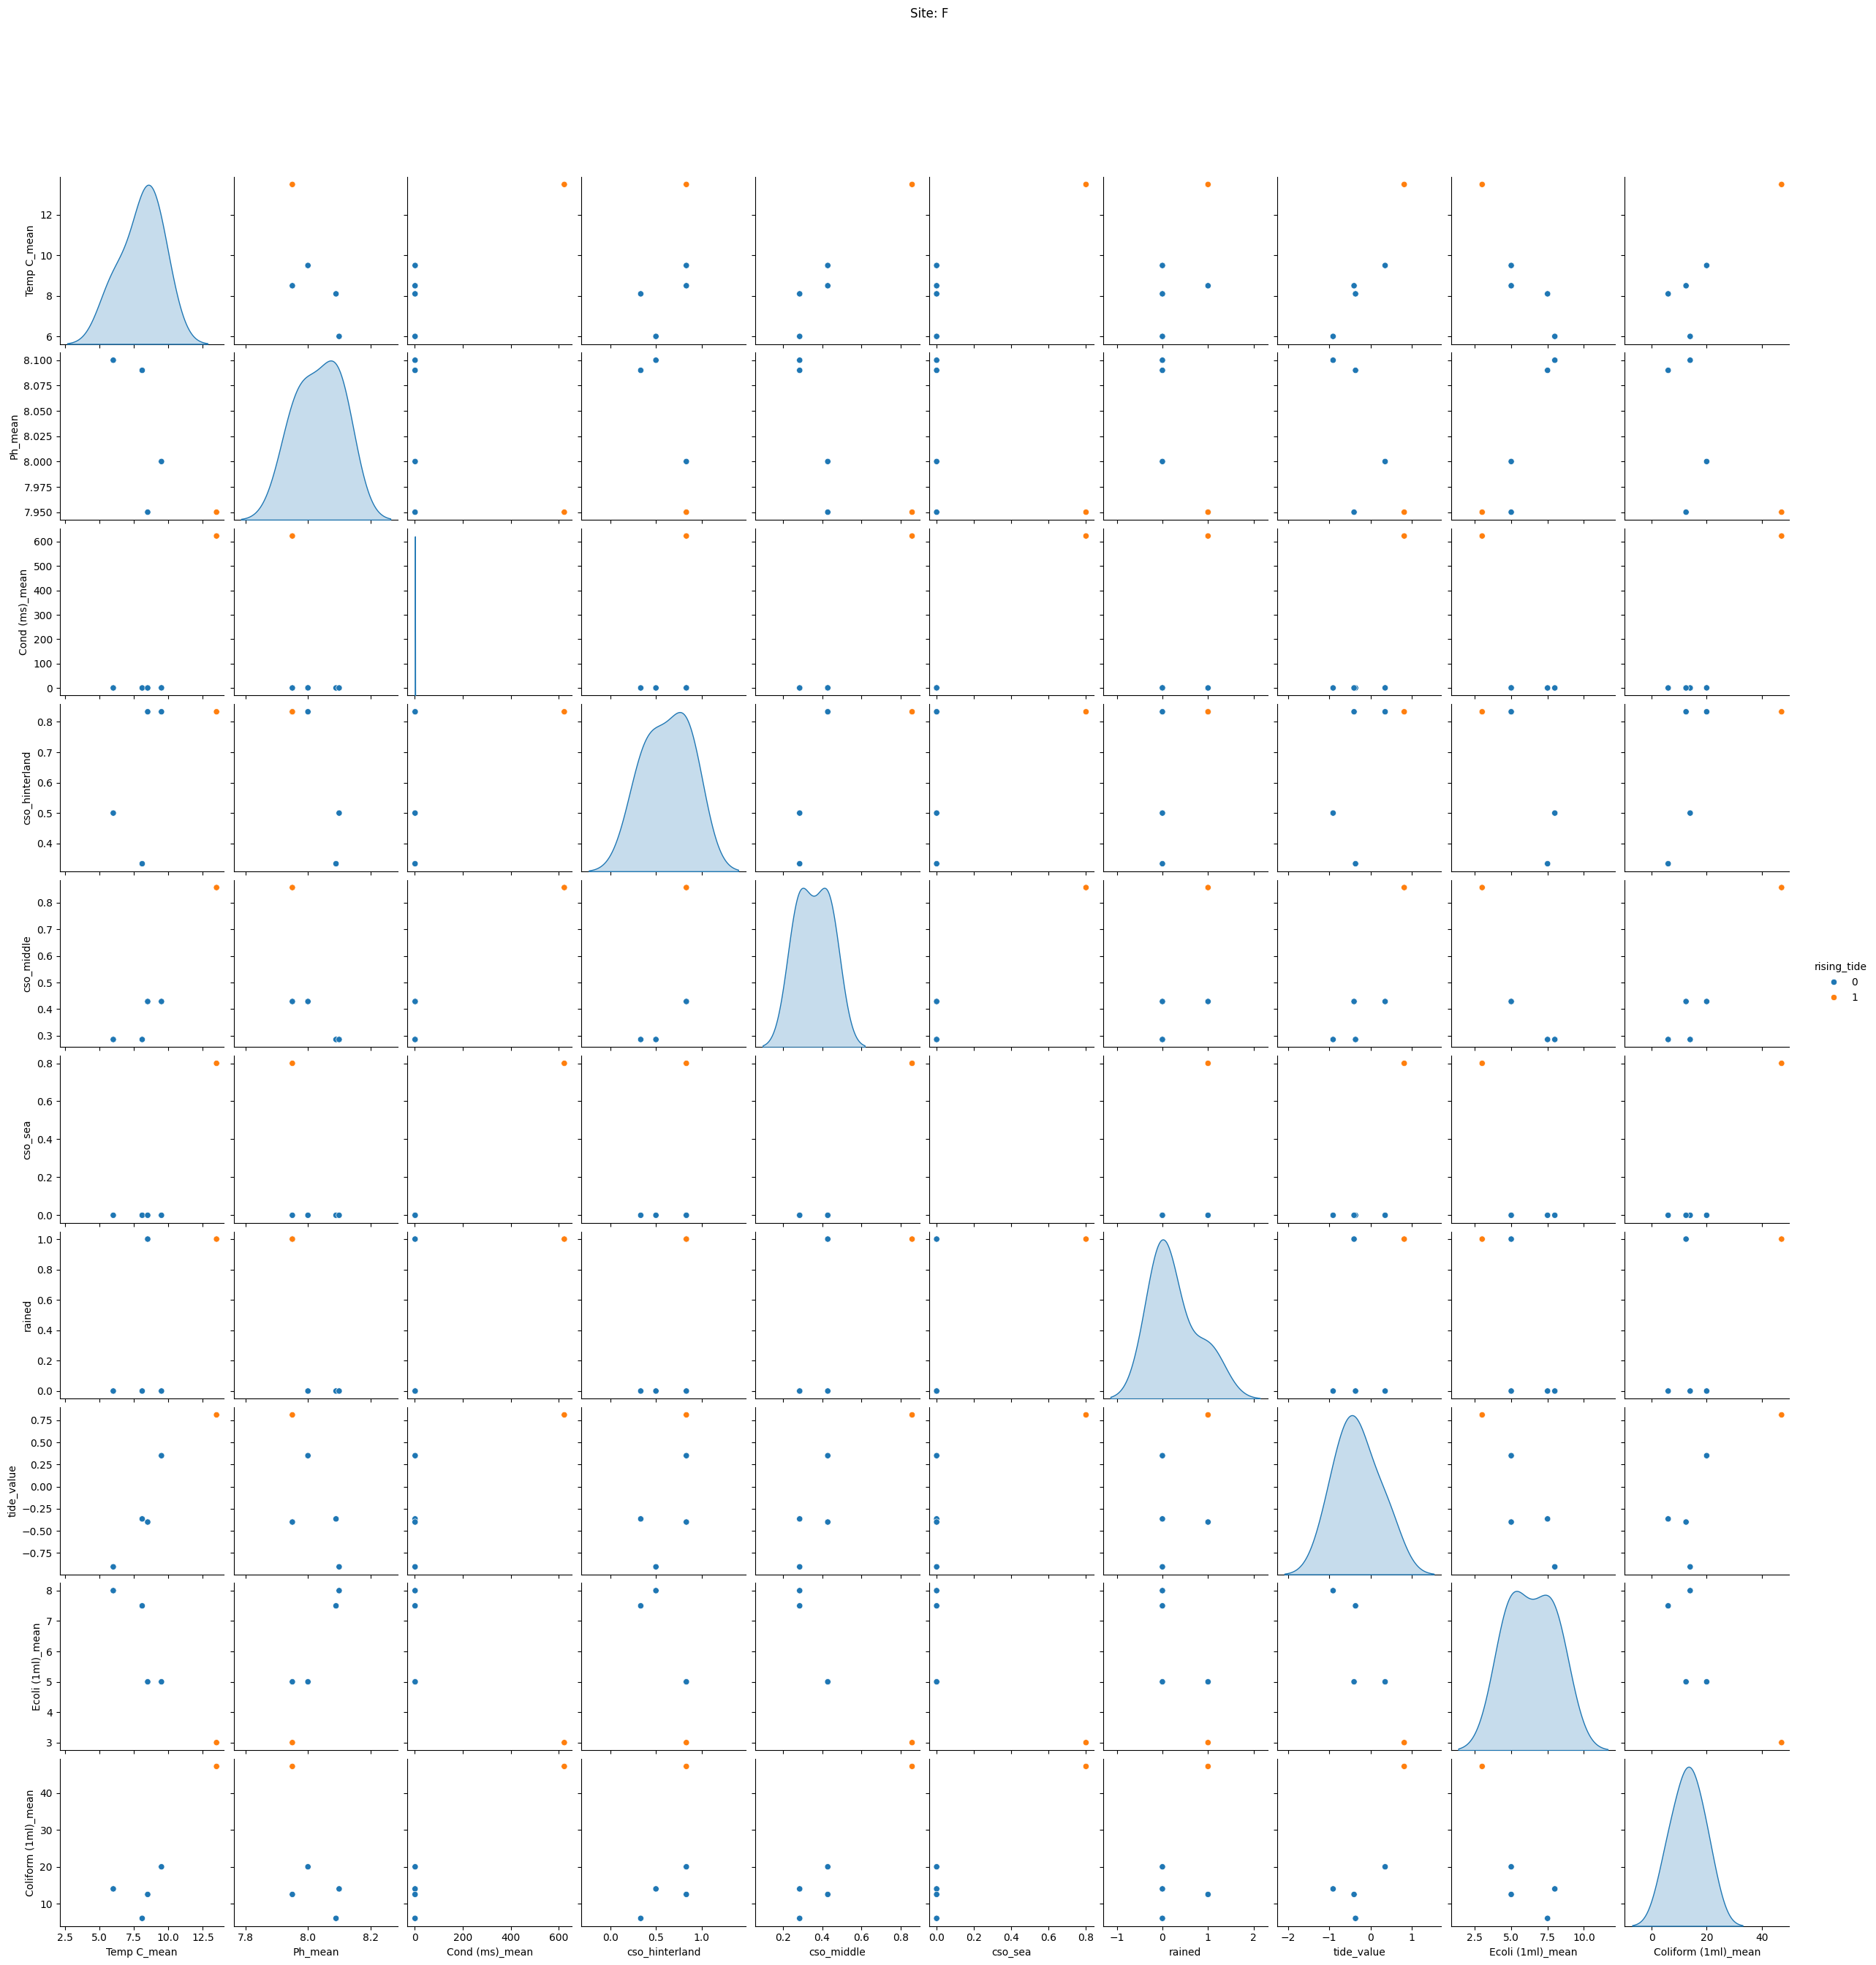

In [13]:
for site in site_dict:
    plot = sns.pairplot(data=site_dict[site][analyze_columns], hue='rising_tide')
    plot.figure.suptitle("Site: " + site, y=1.08)

### Conductivity vs Tides

In [14]:
cols = [
    "Cond (ms)_mean",
    "rising_tide",
    "tide_value",
]

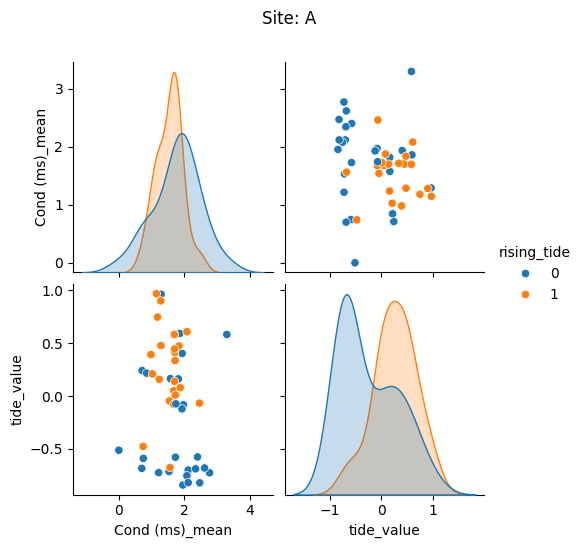

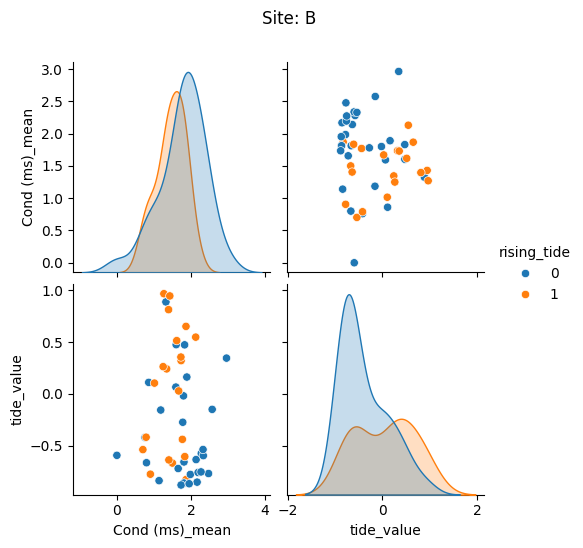

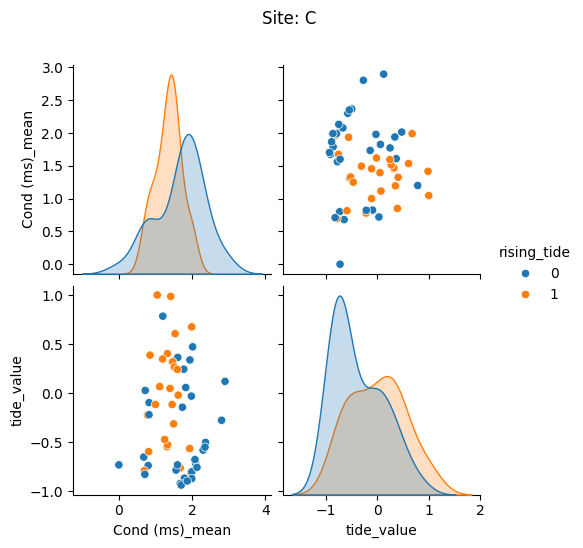

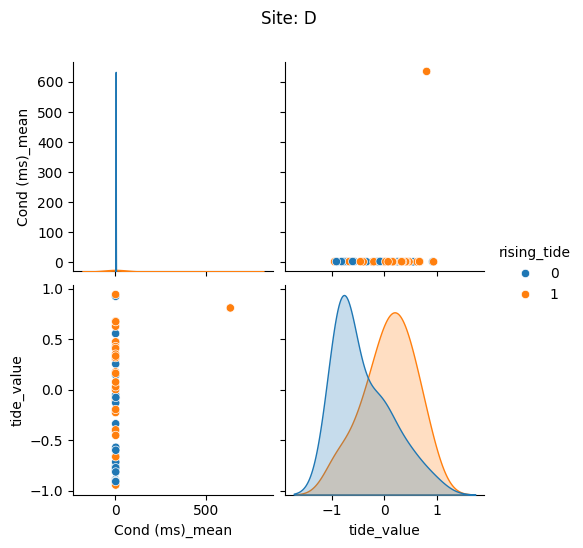

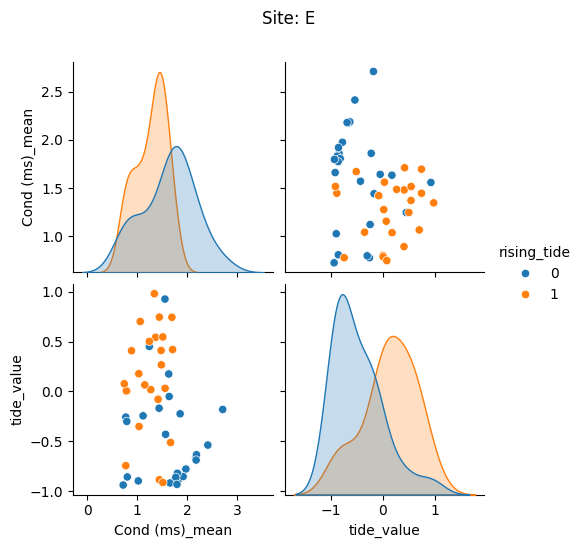

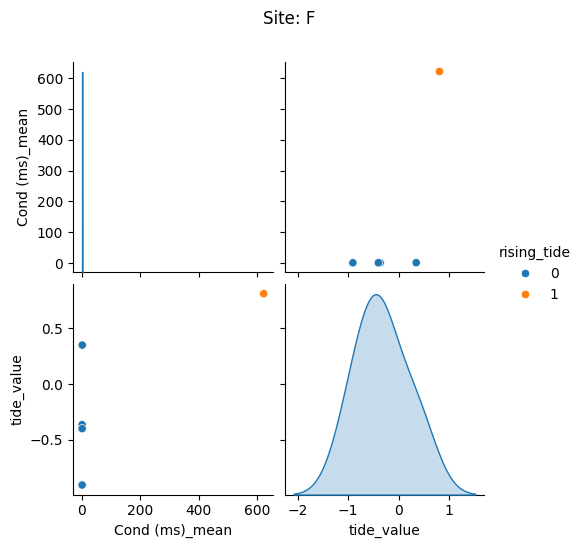

In [16]:
for site in site_dict:
    plot = sns.pairplot(data=site_dict[site][cols], hue='rising_tide')
    plot.figure.suptitle("Site: " + site, y=1.08)

## Boxplots

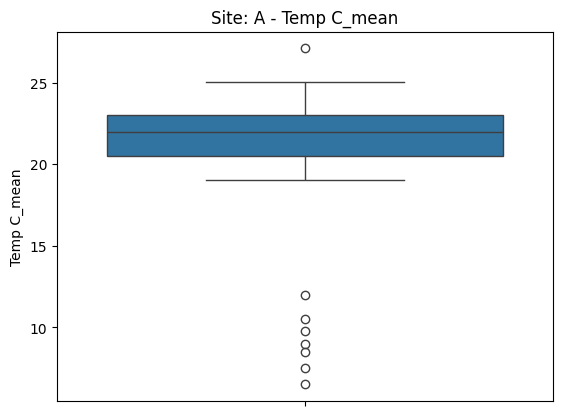

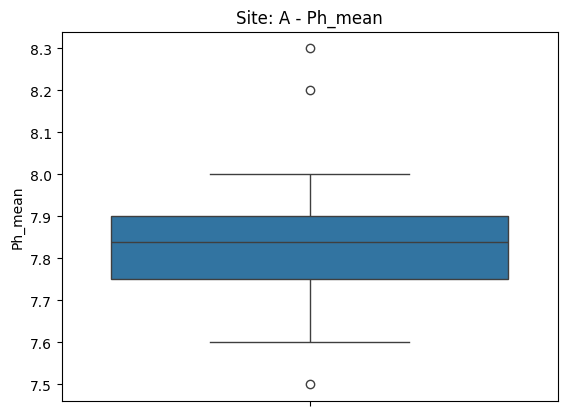

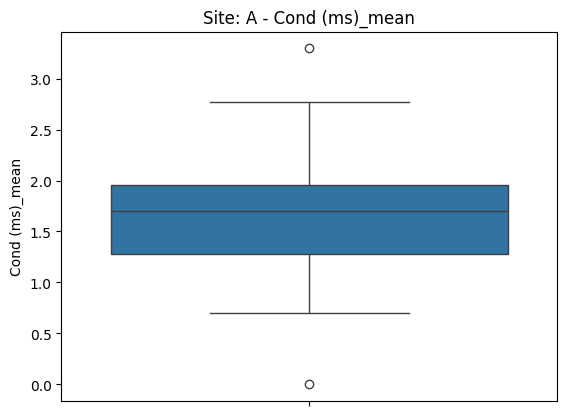

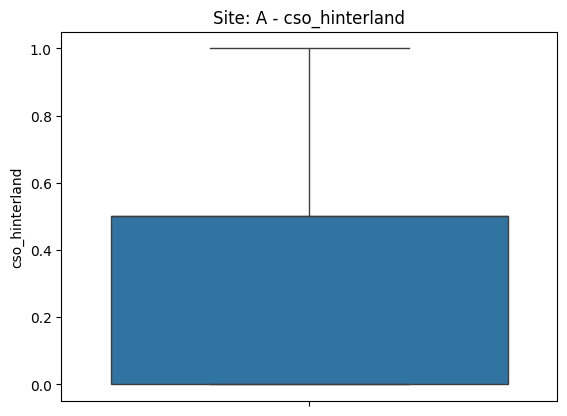

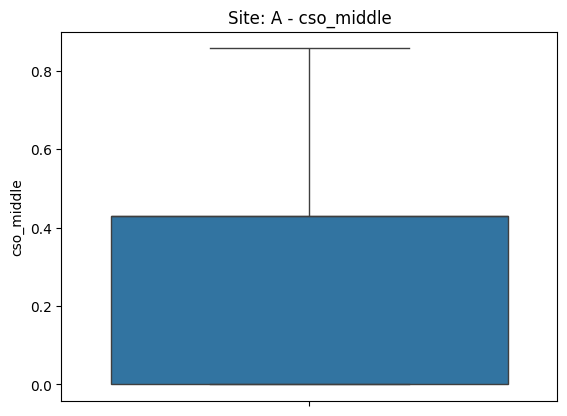

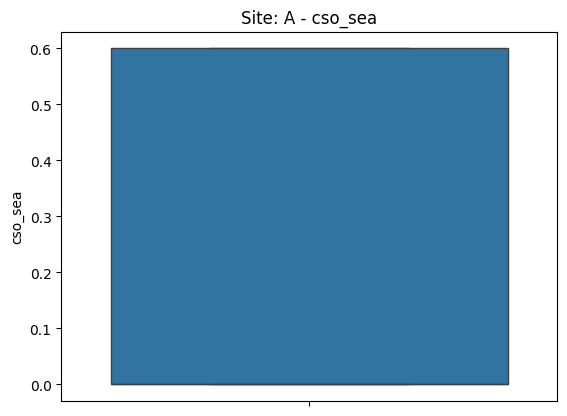

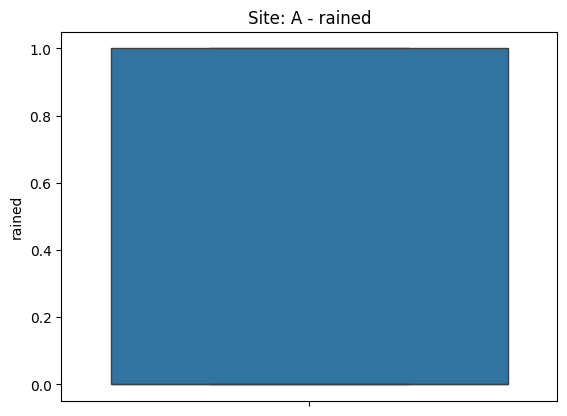

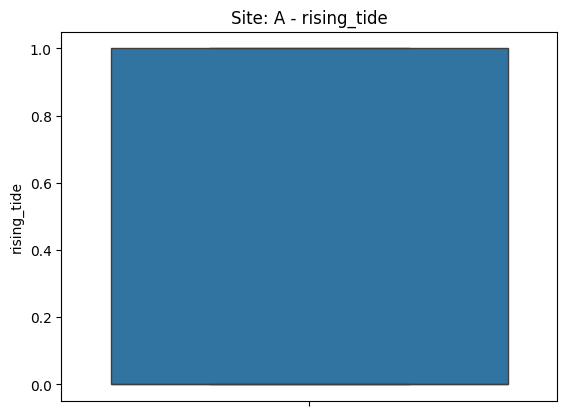

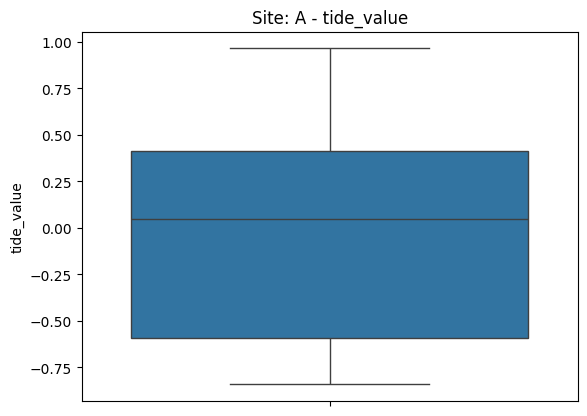

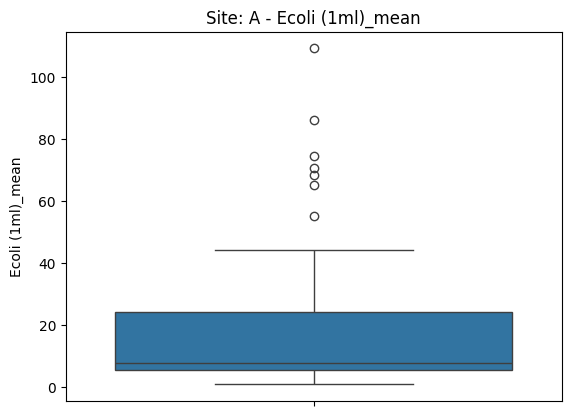

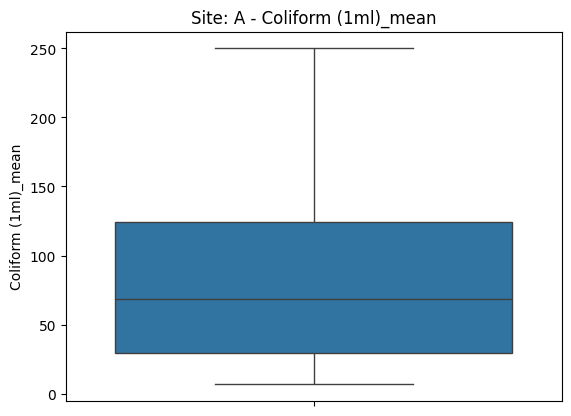

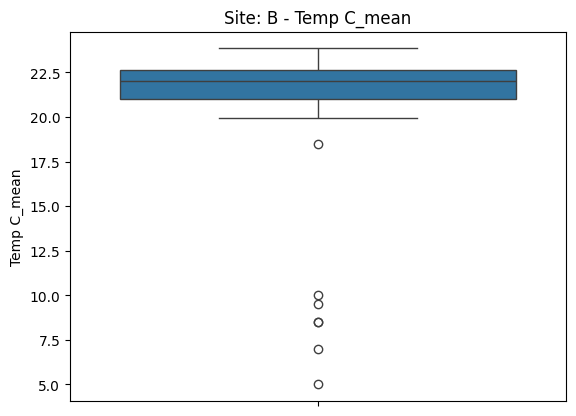

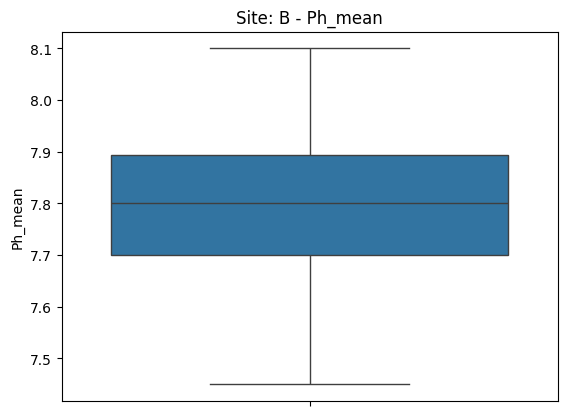

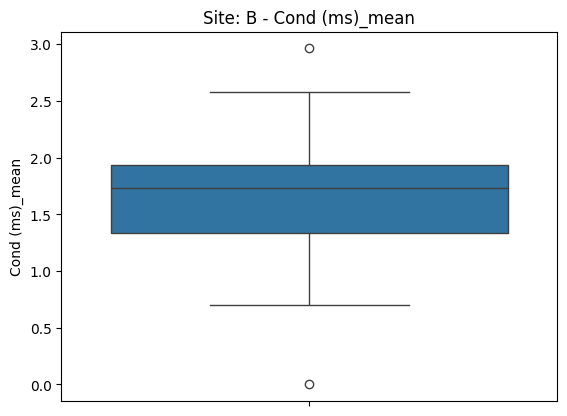

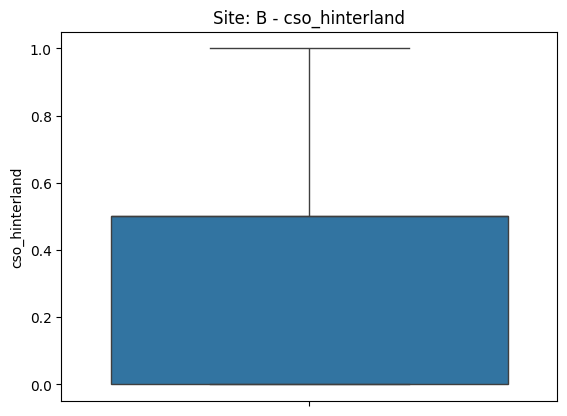

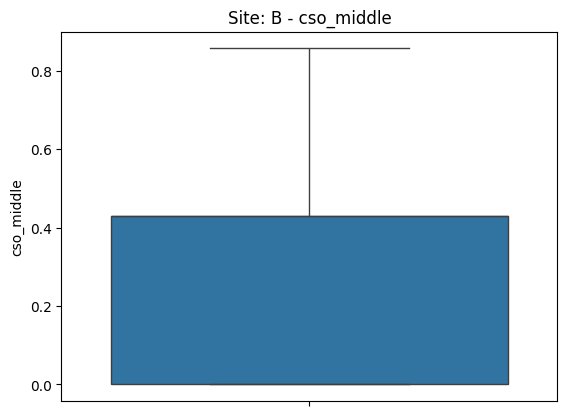

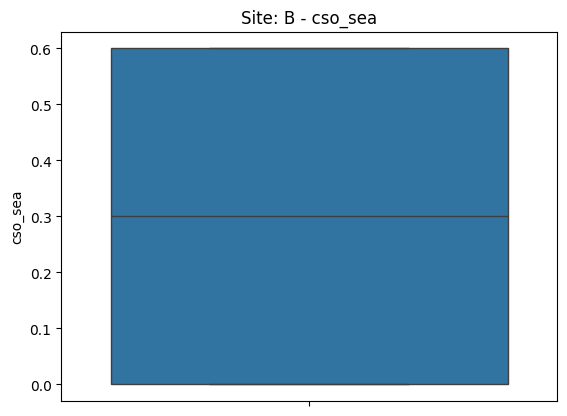

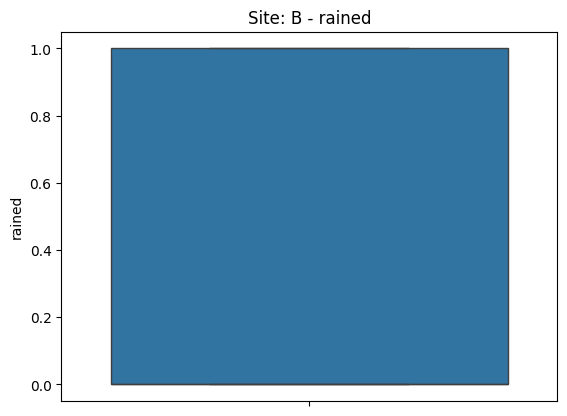

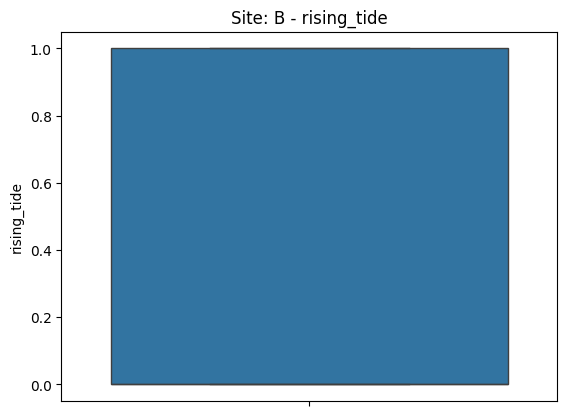

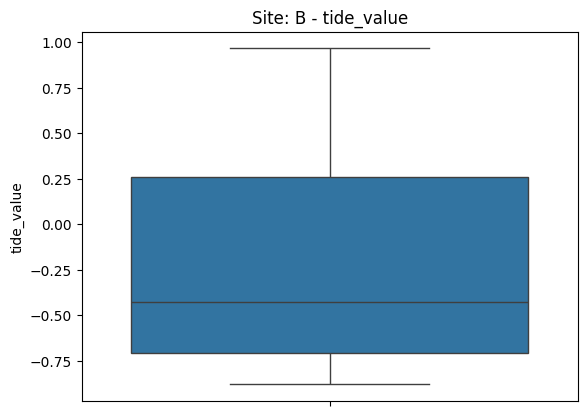

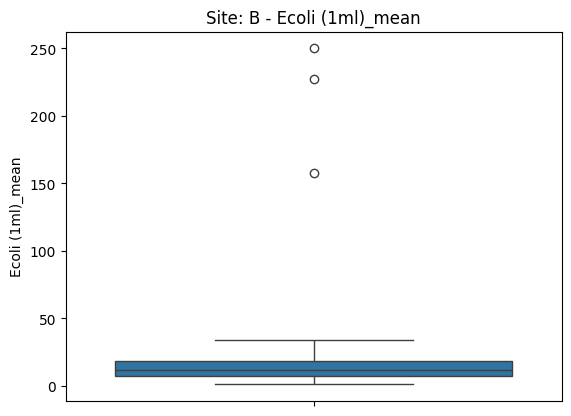

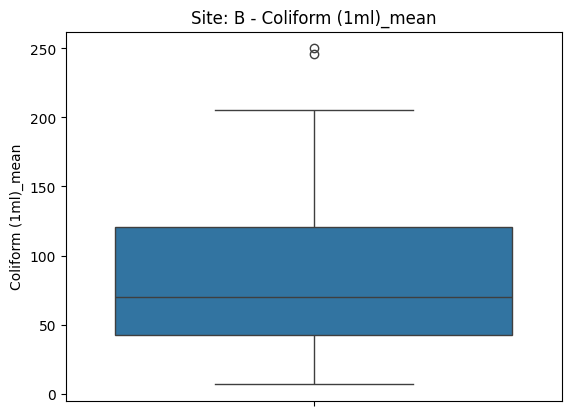

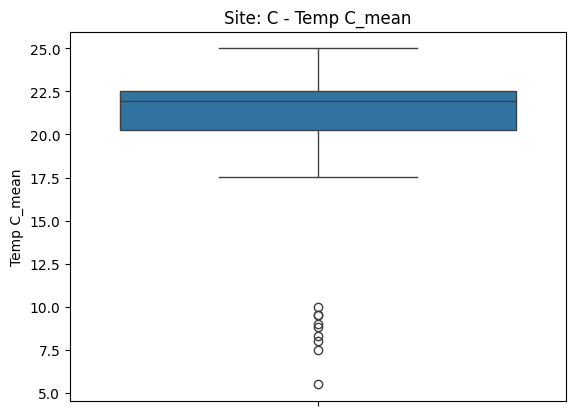

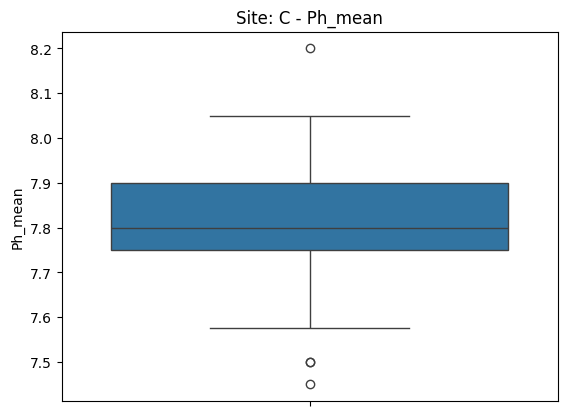

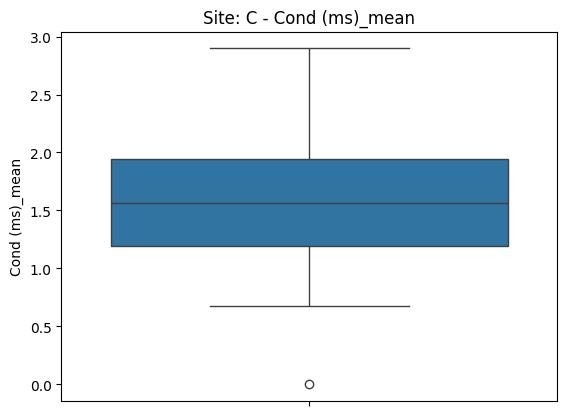

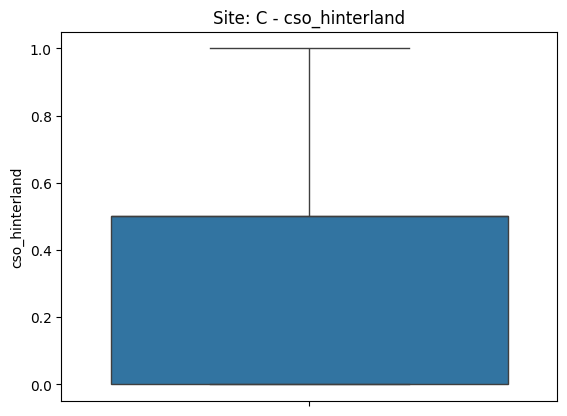

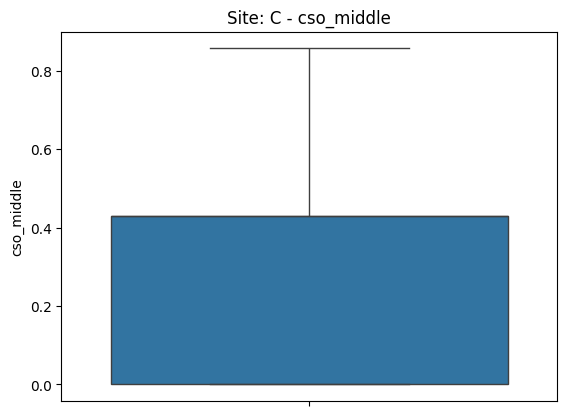

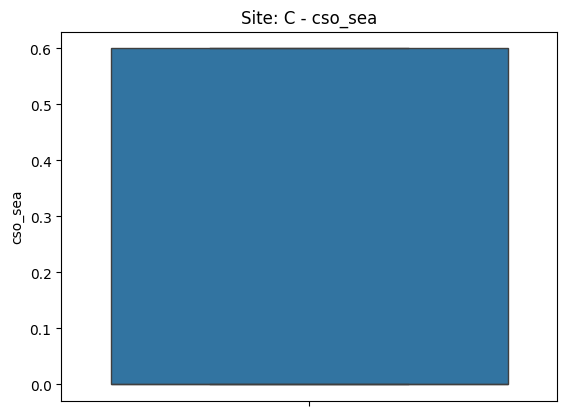

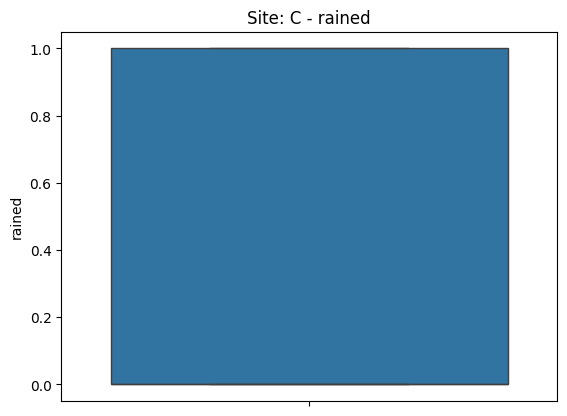

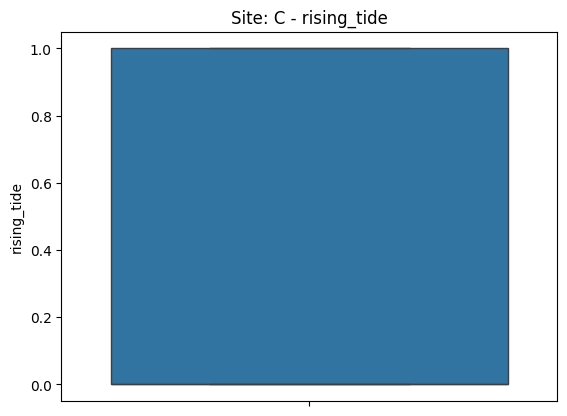

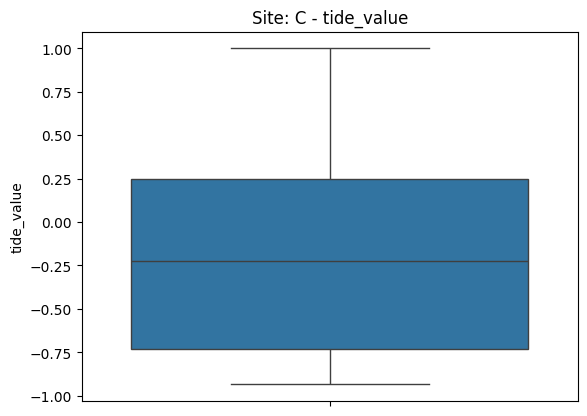

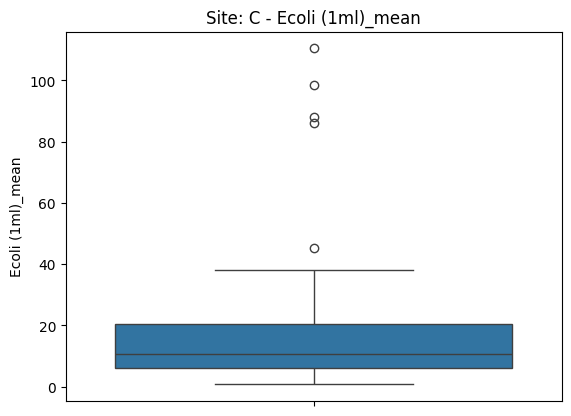

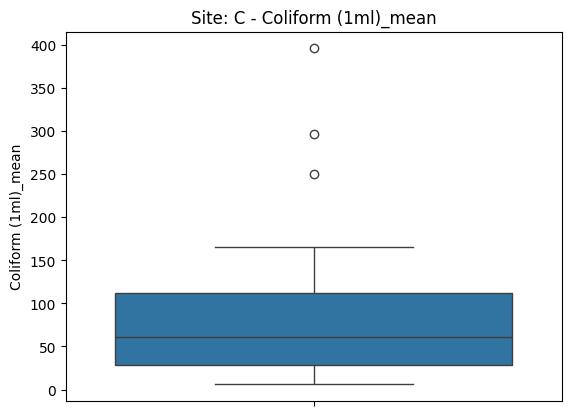

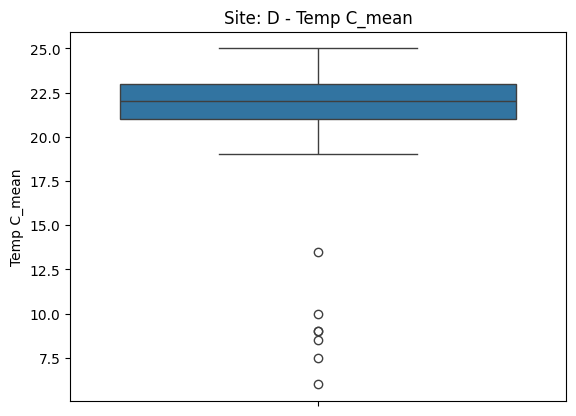

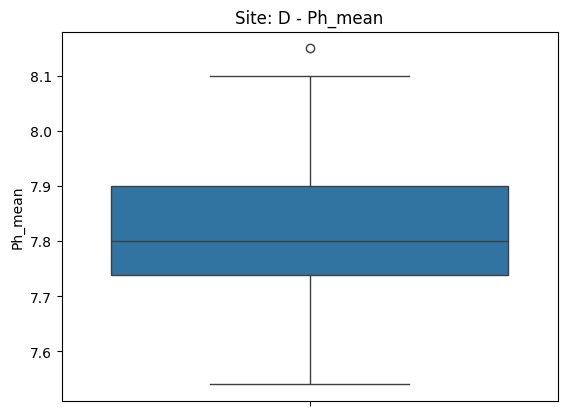

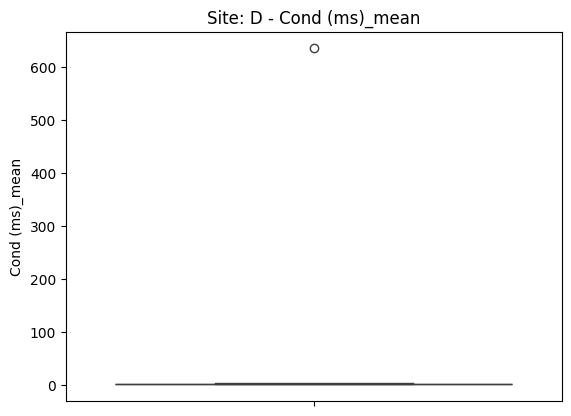

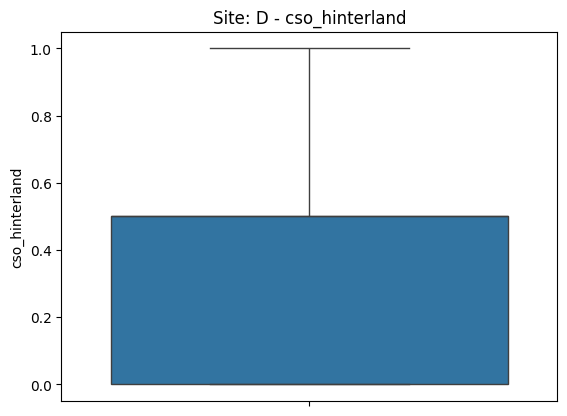

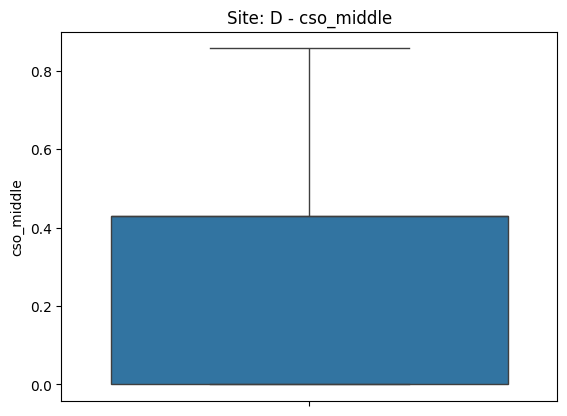

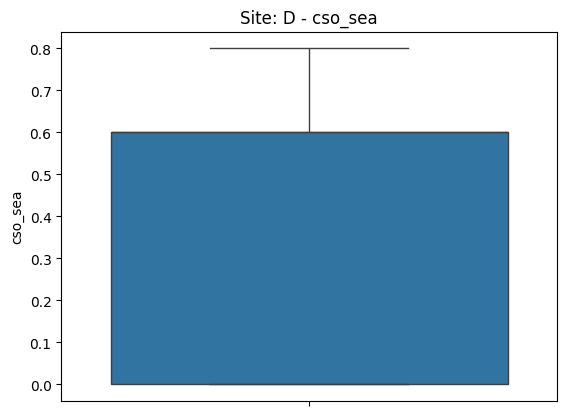

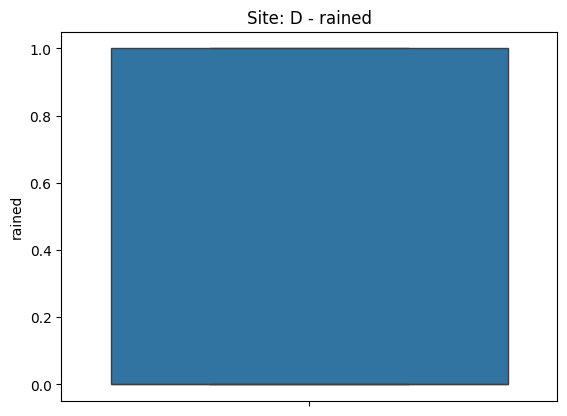

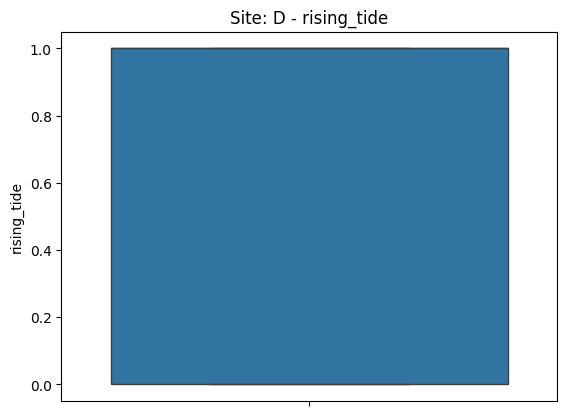

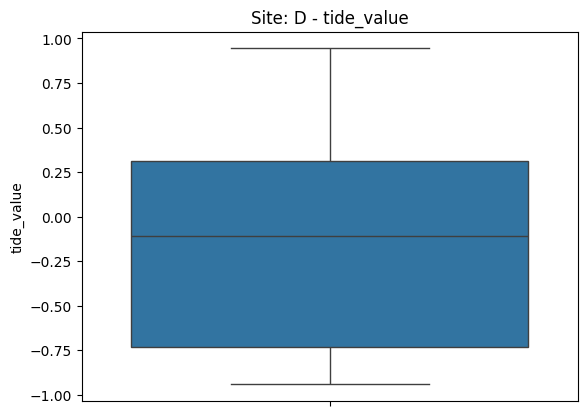

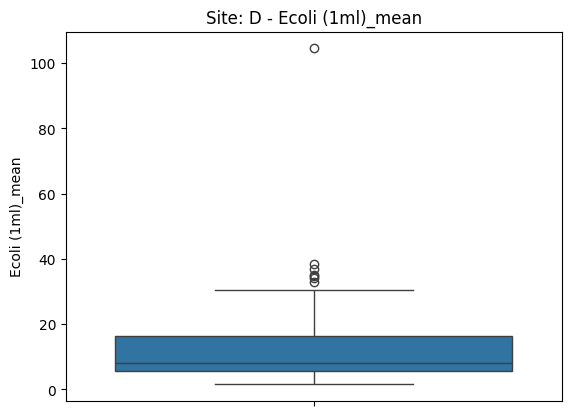

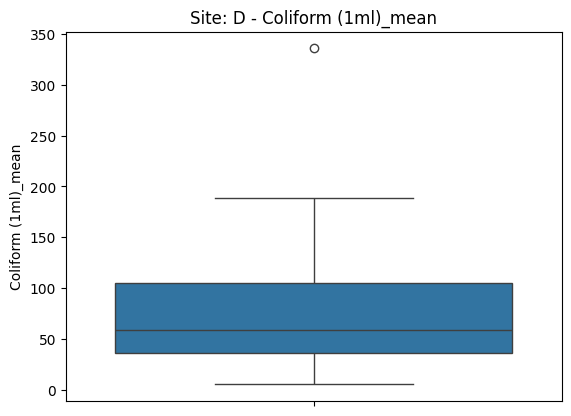

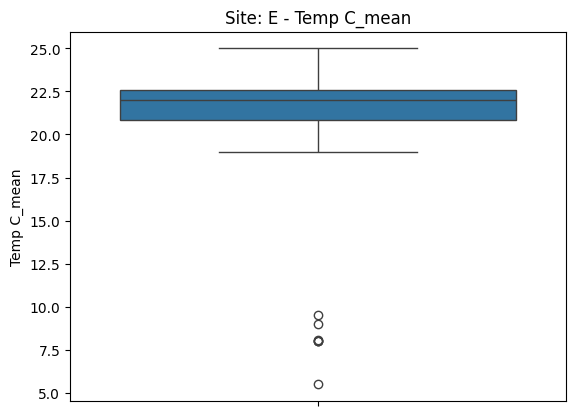

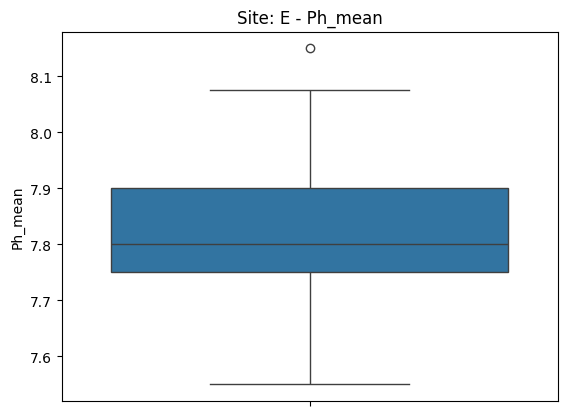

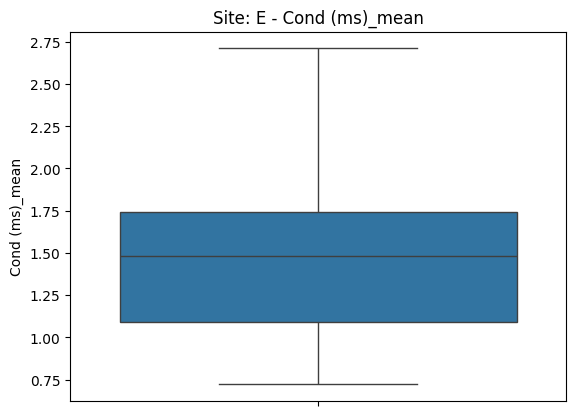

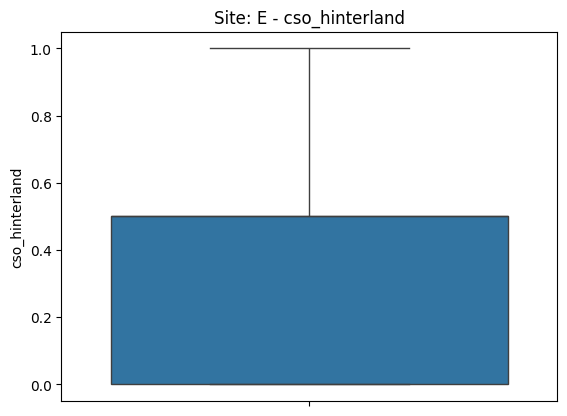

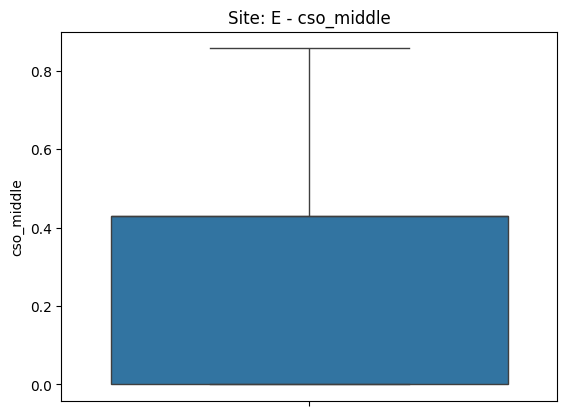

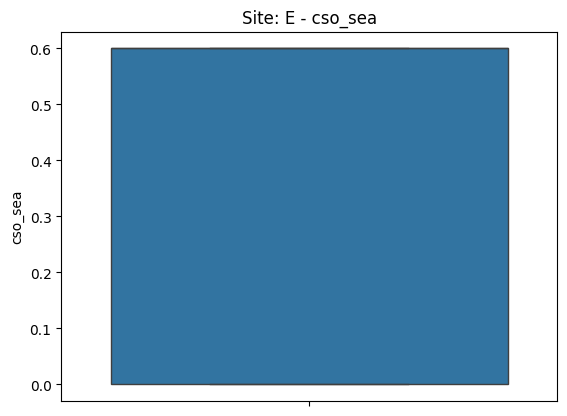

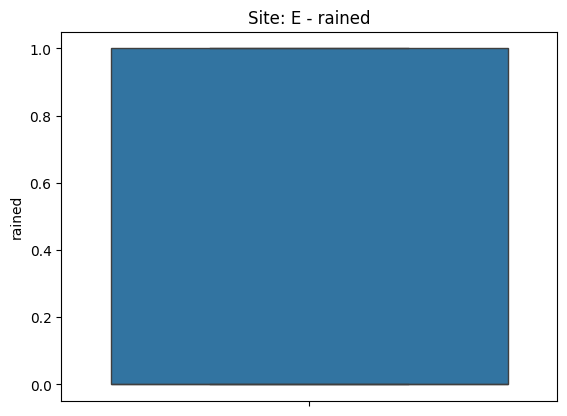

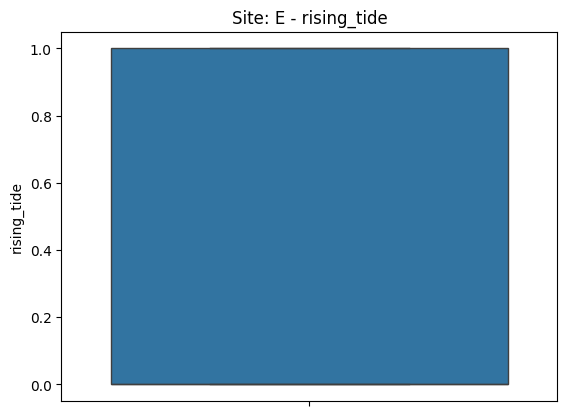

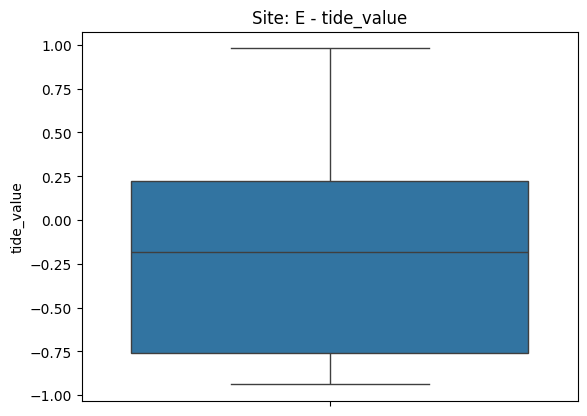

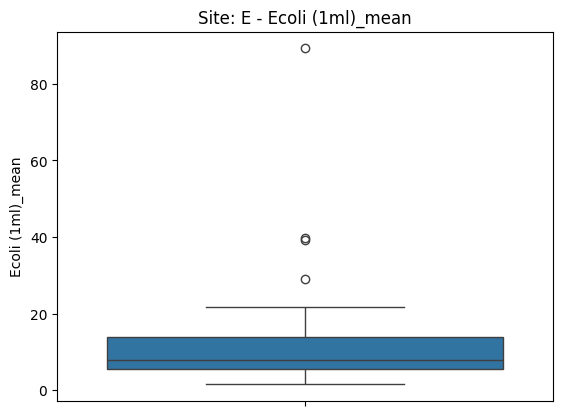

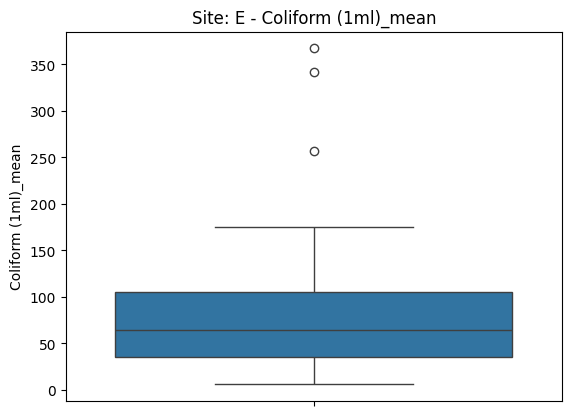

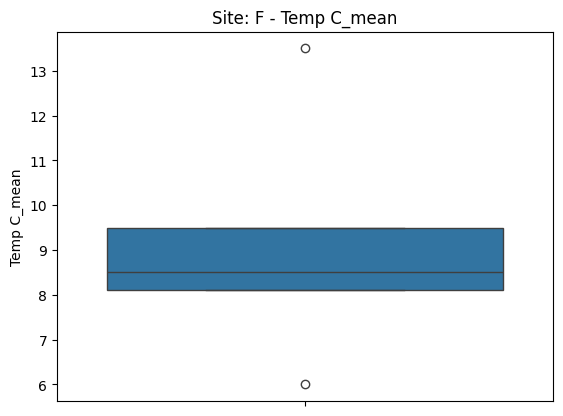

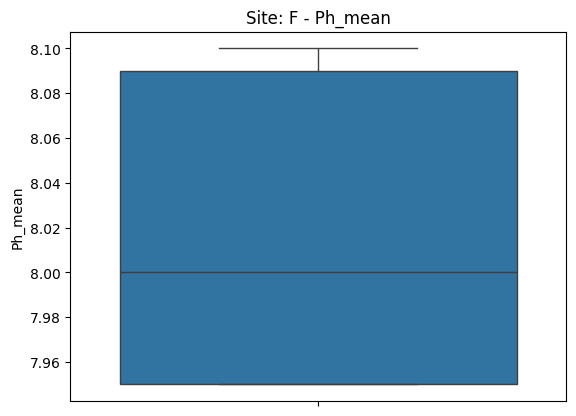

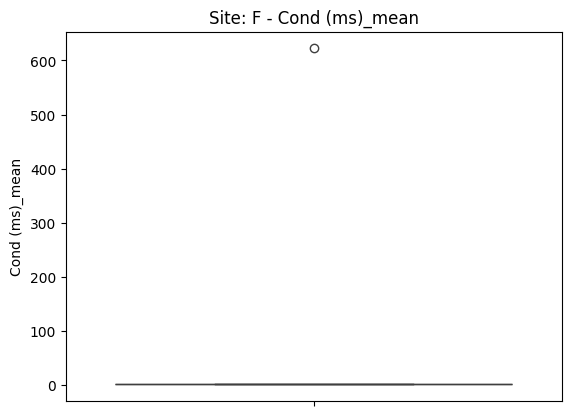

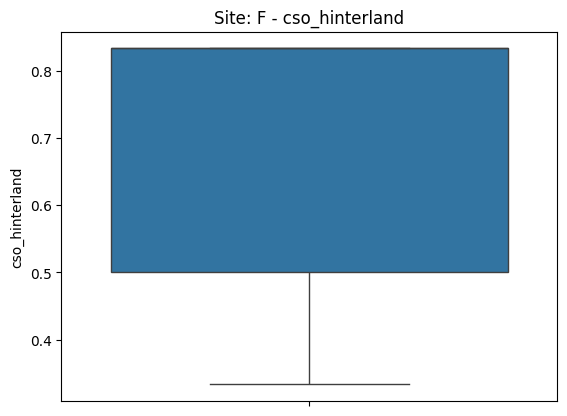

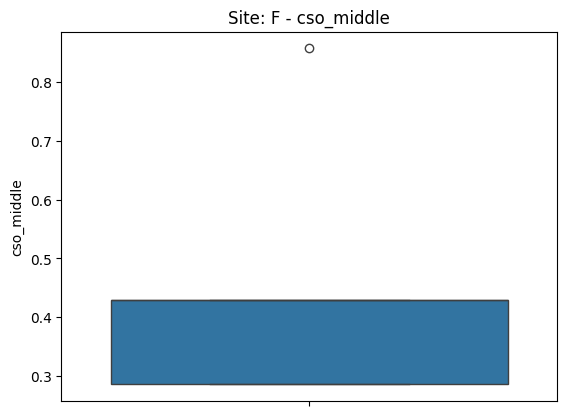

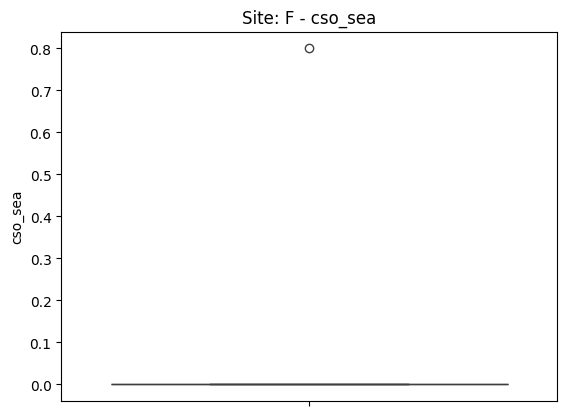

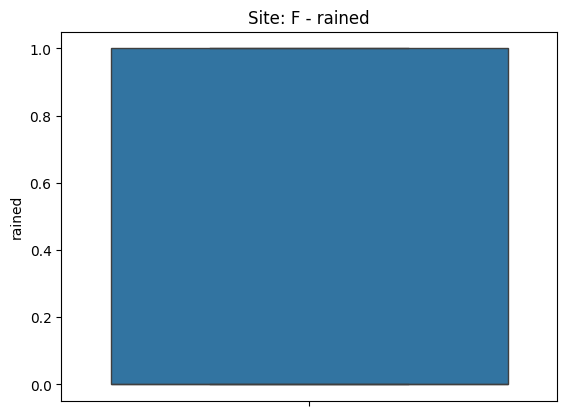

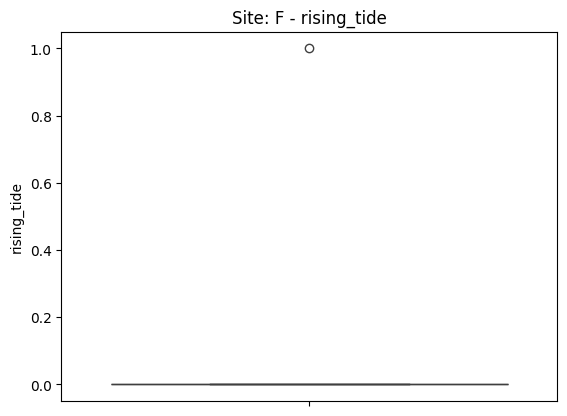

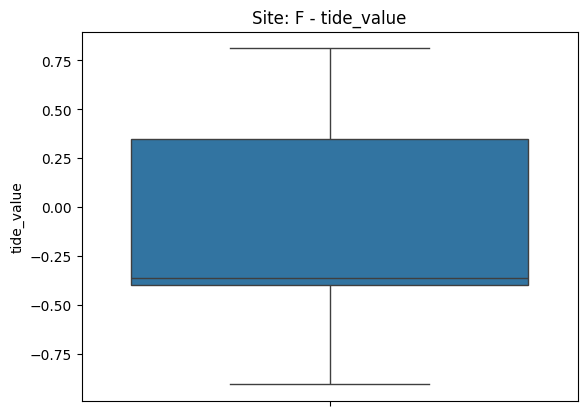

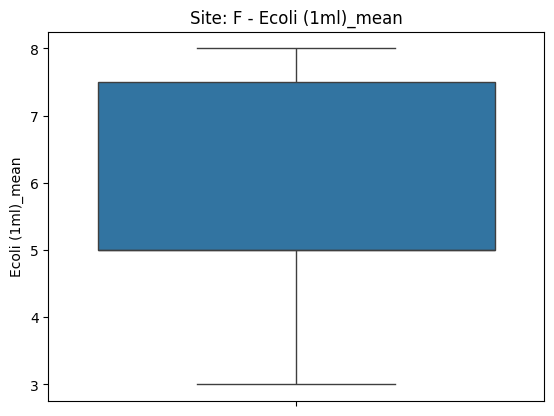

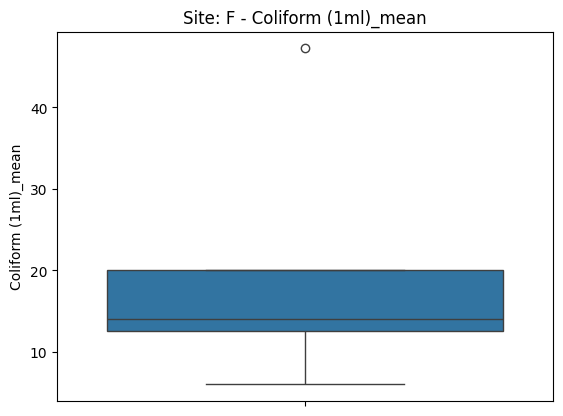

In [54]:
for site in site_dict:
    for col in analyze_columns:
        sns.boxplot(y=site_dict[site][col], orient="v")
        plt.title("Site: " + site + " - " + col)
        plt.show()

## Timeseries

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


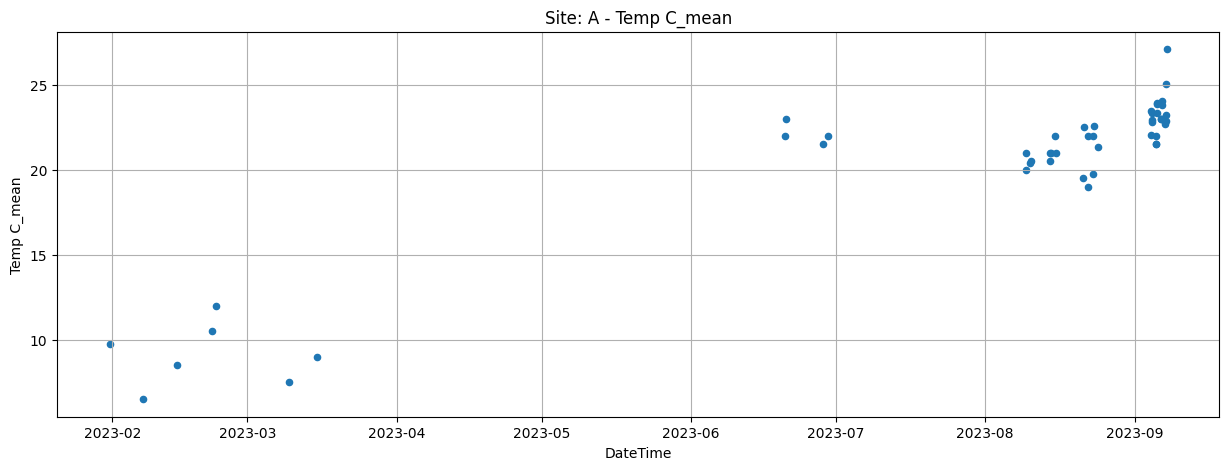

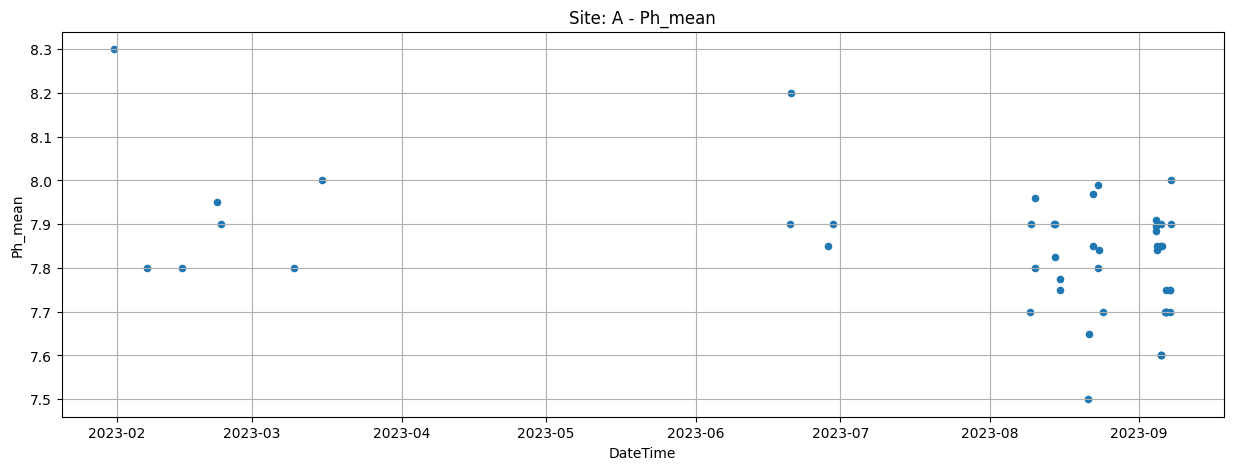

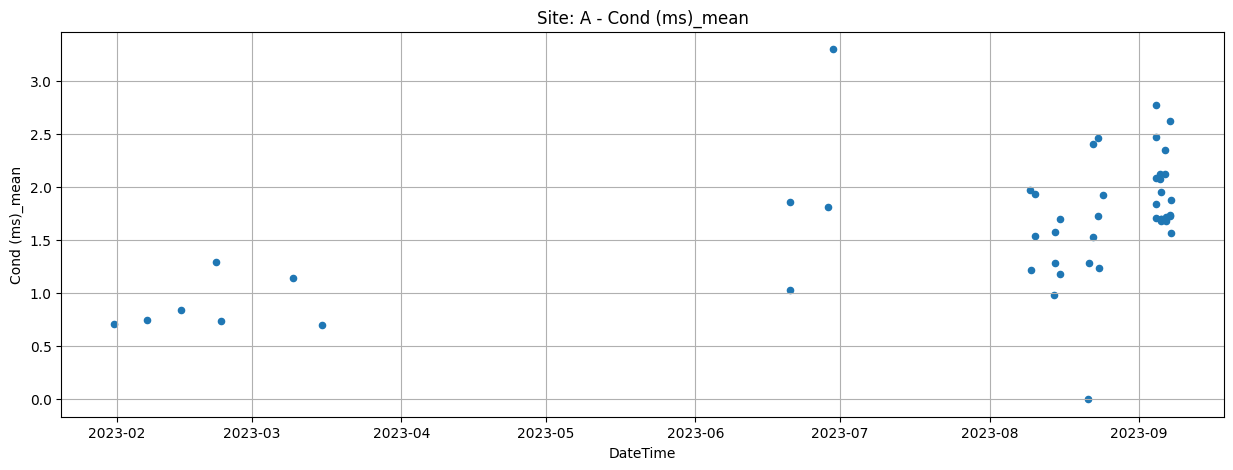

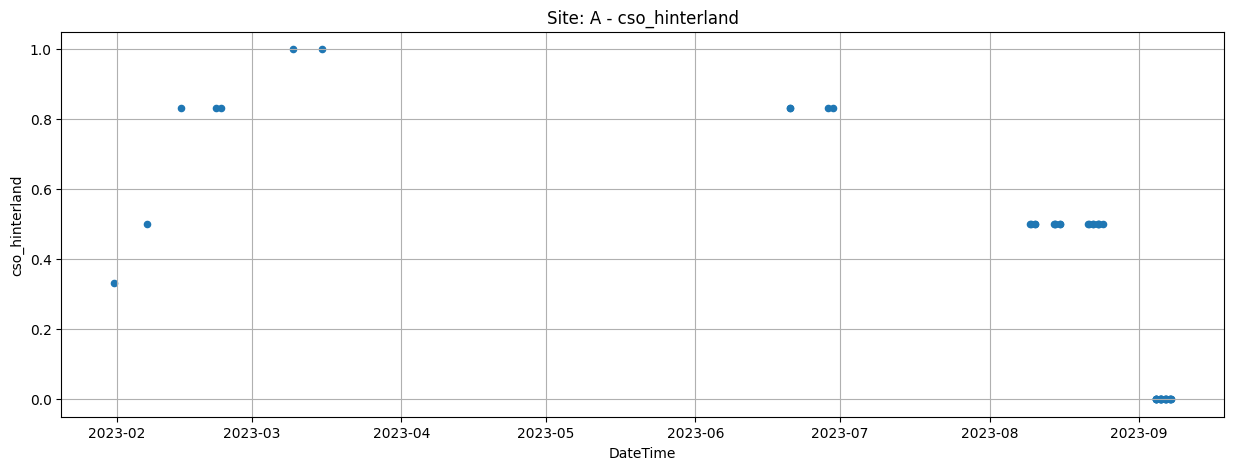

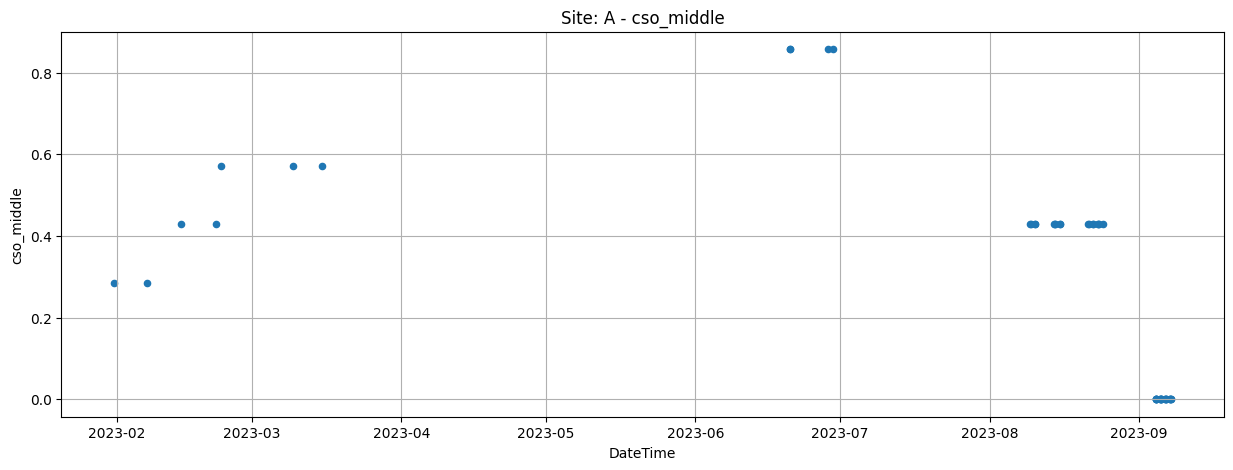

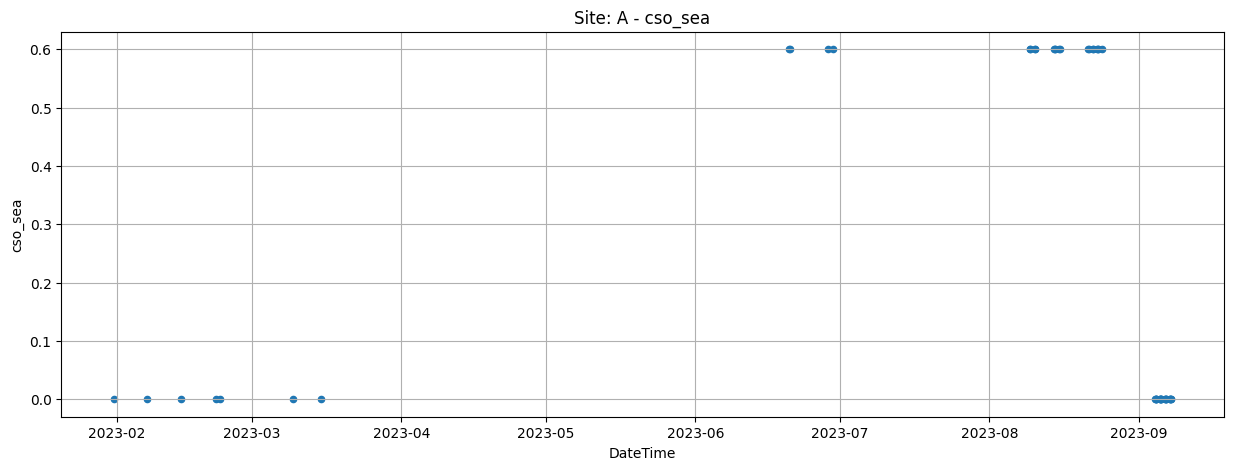

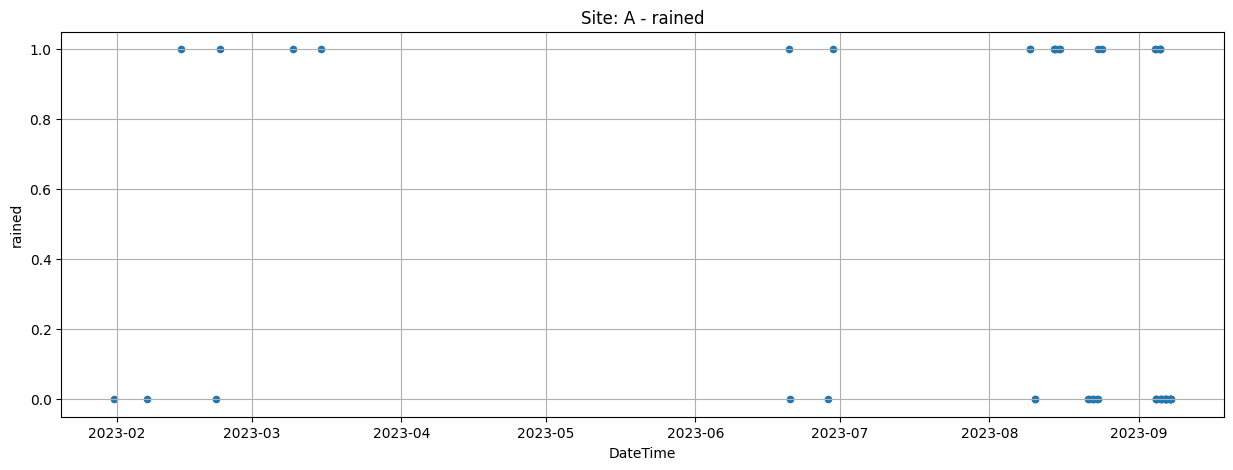

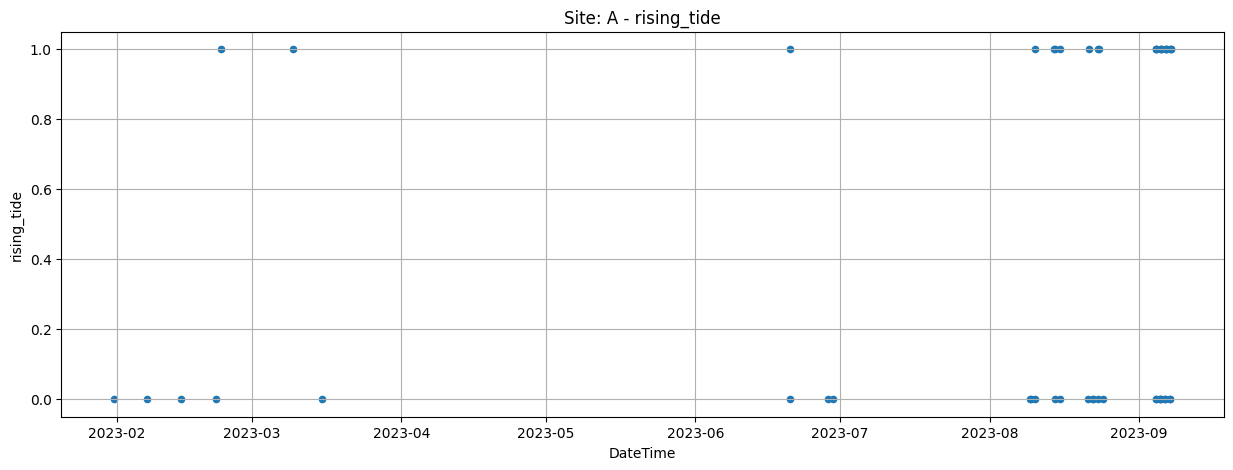

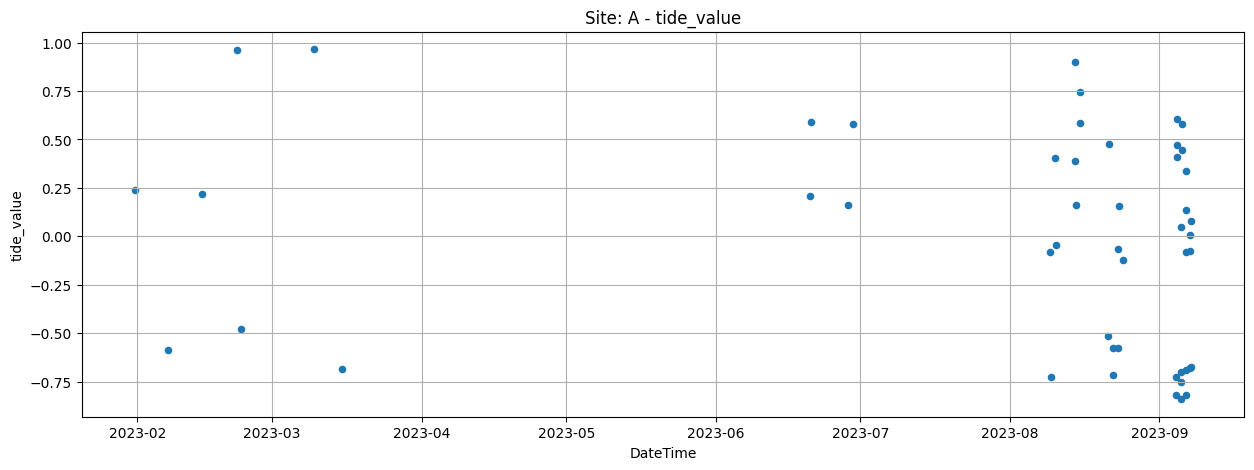

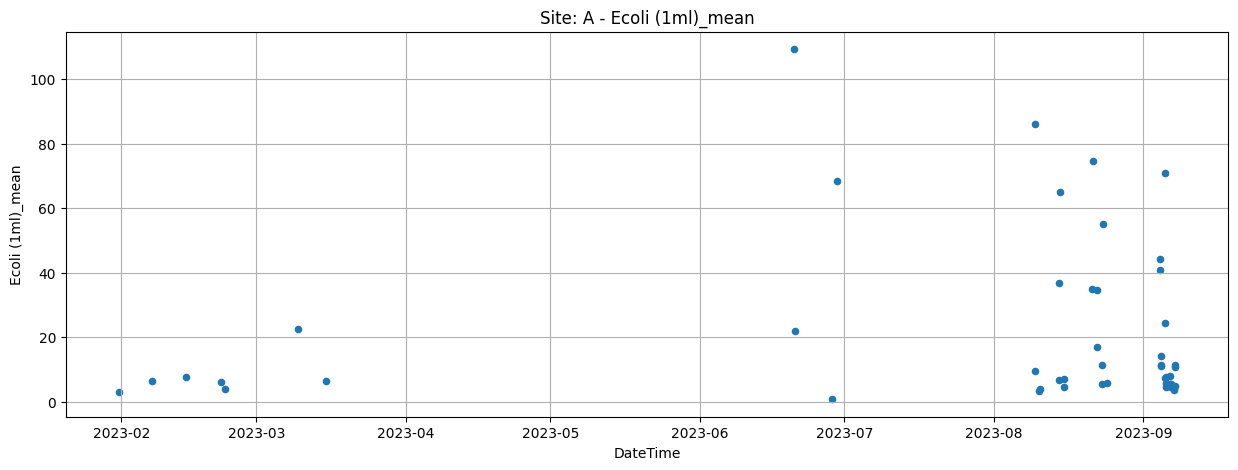

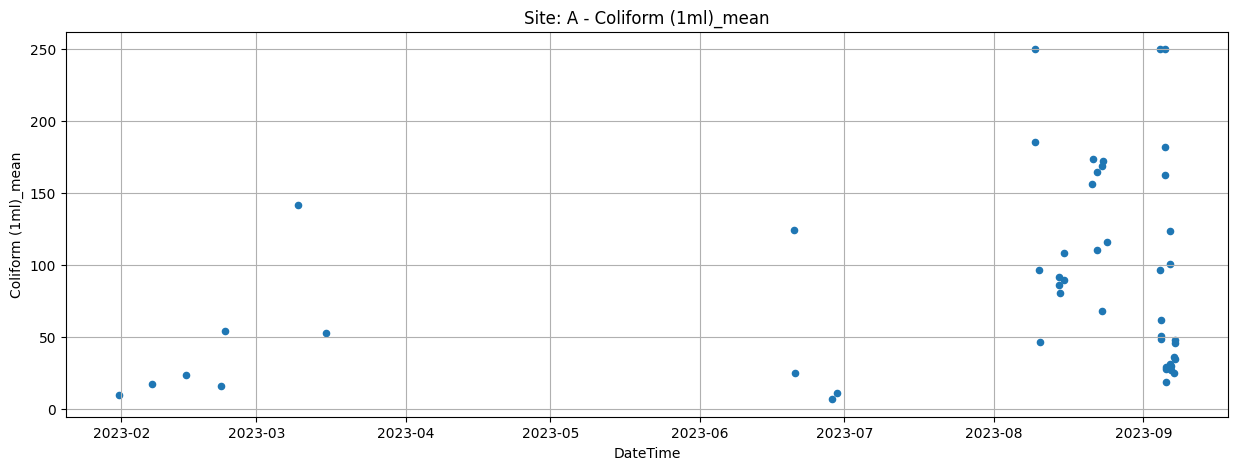

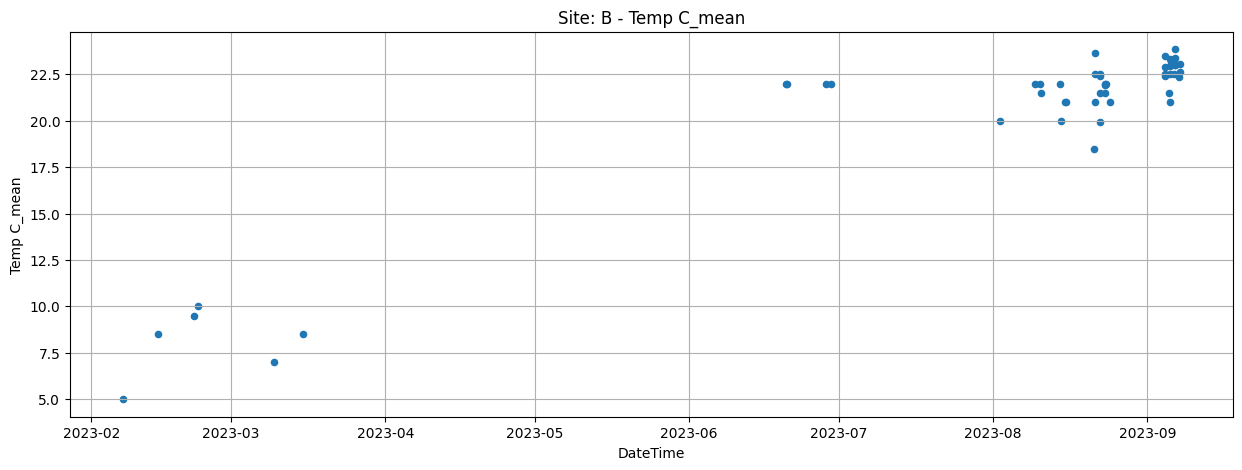

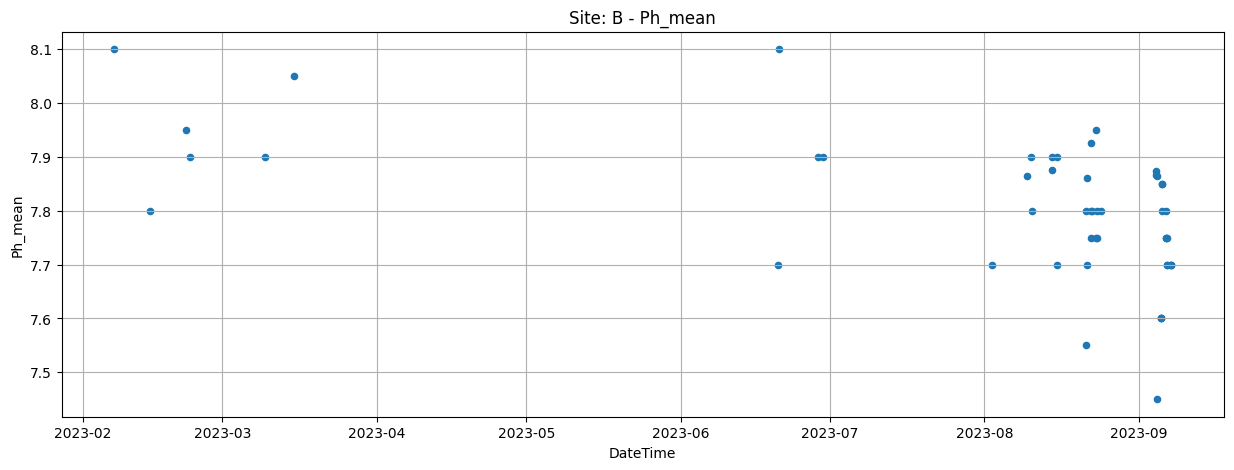

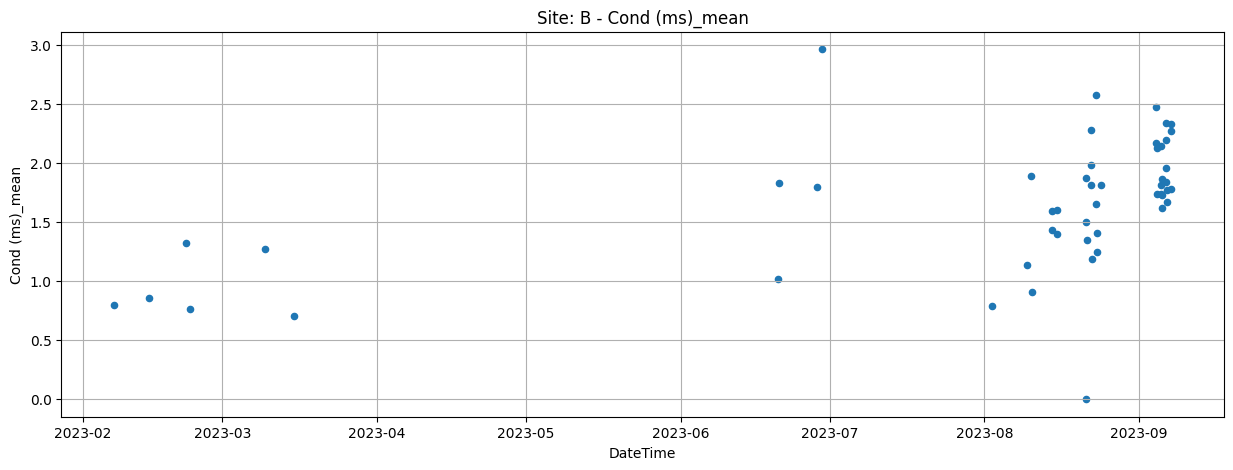

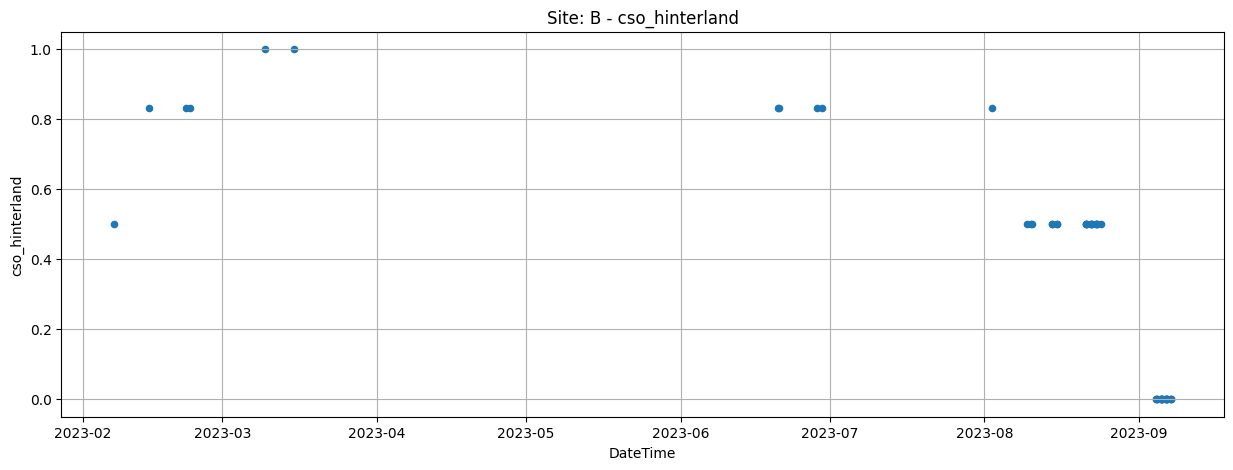

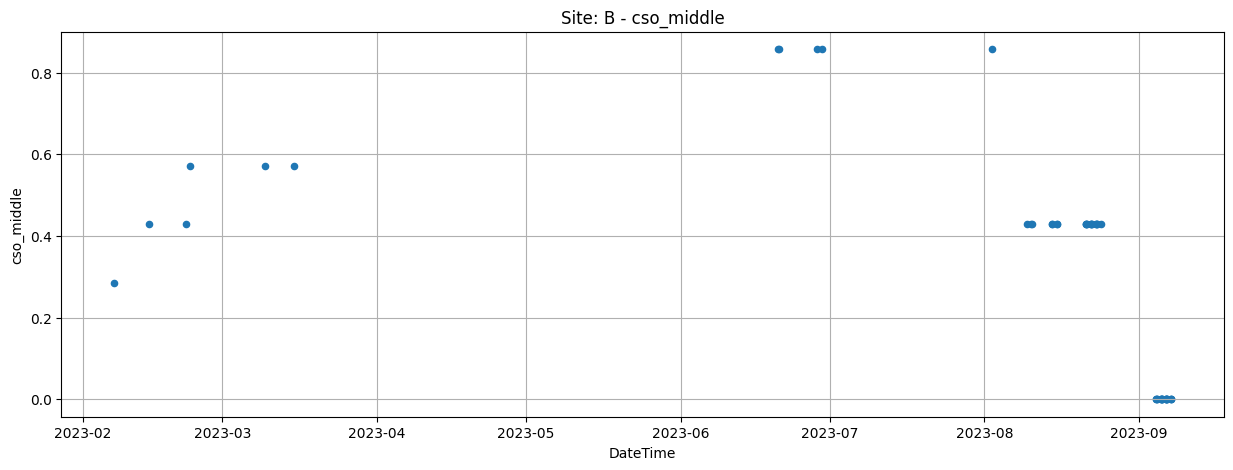

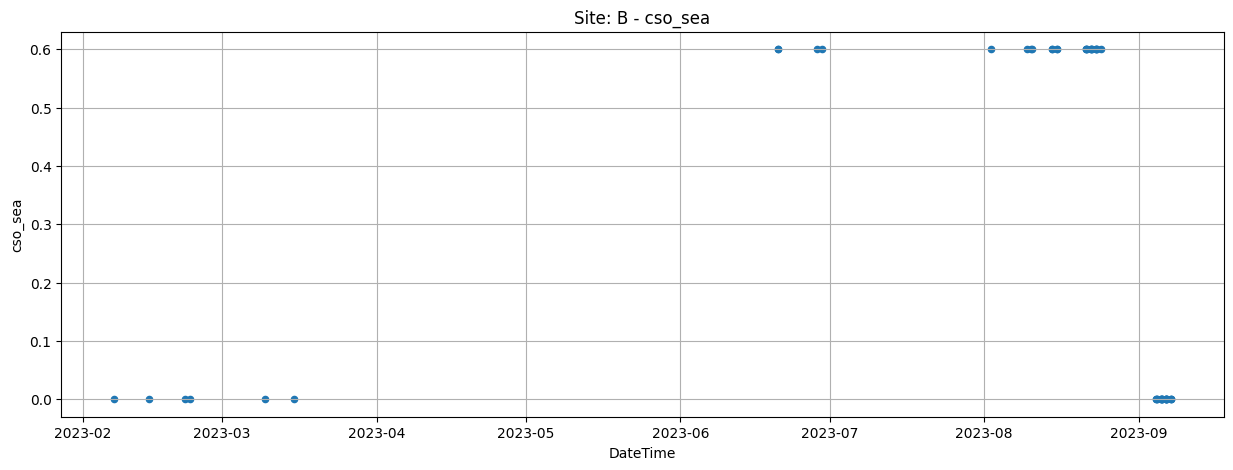

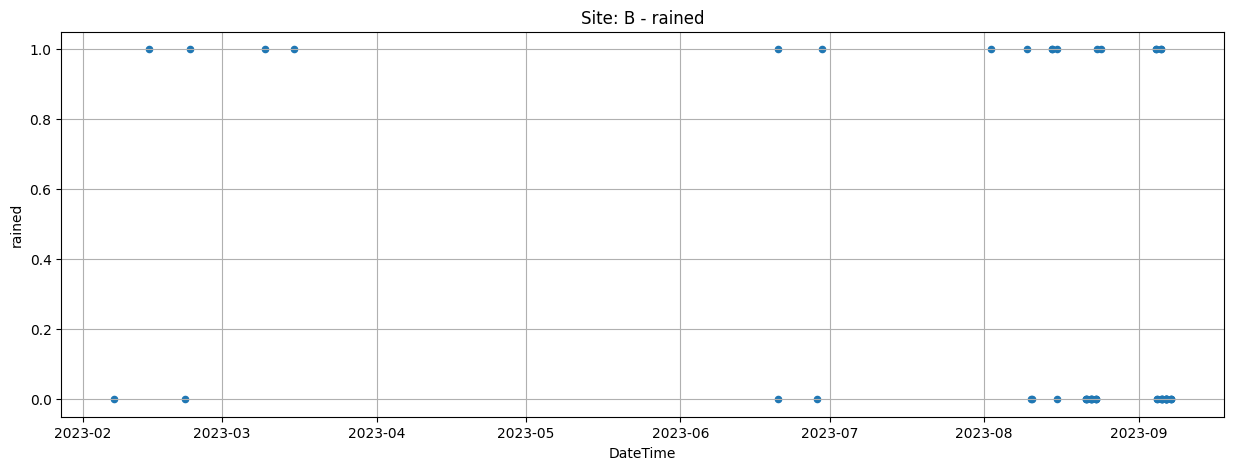

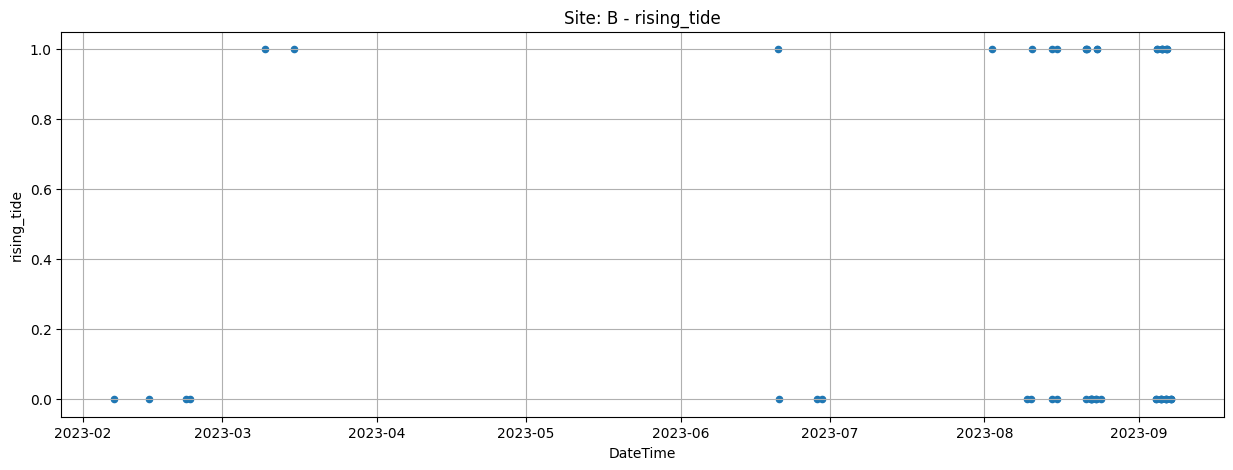

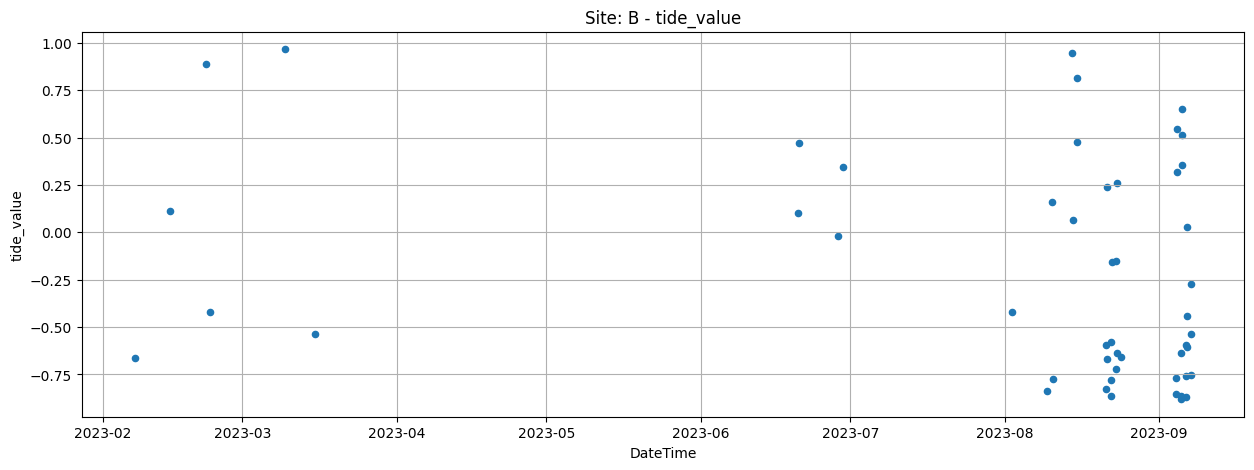

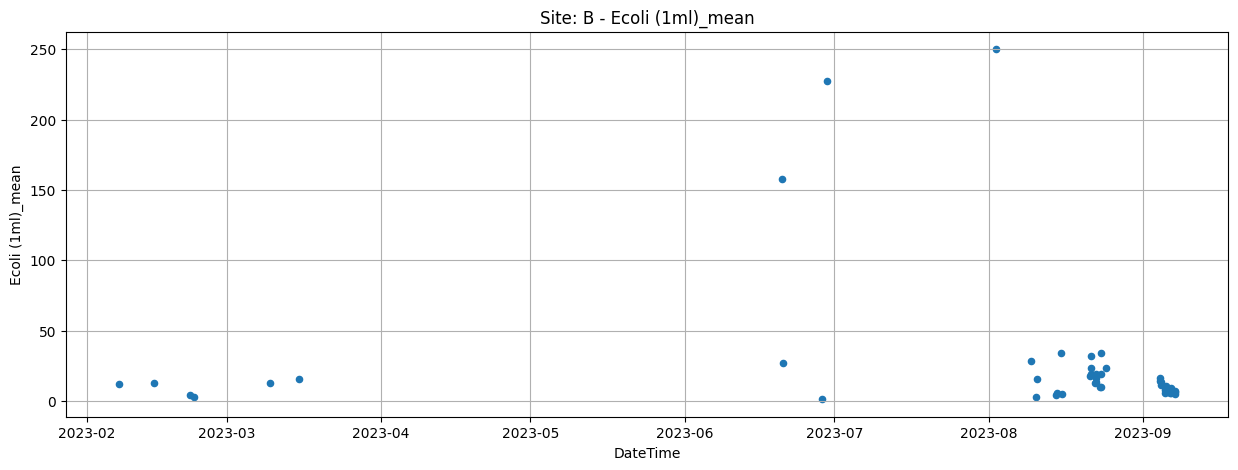

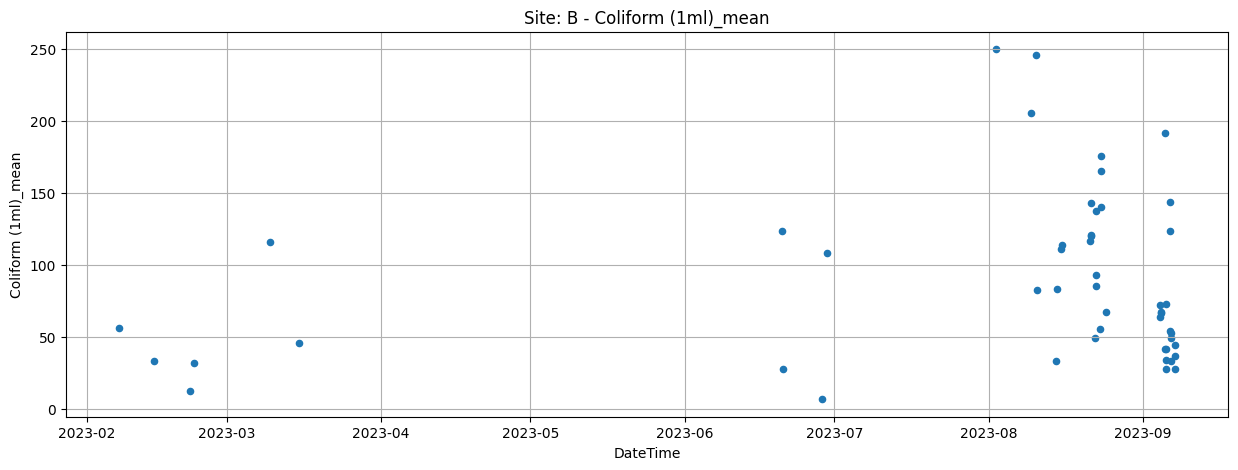

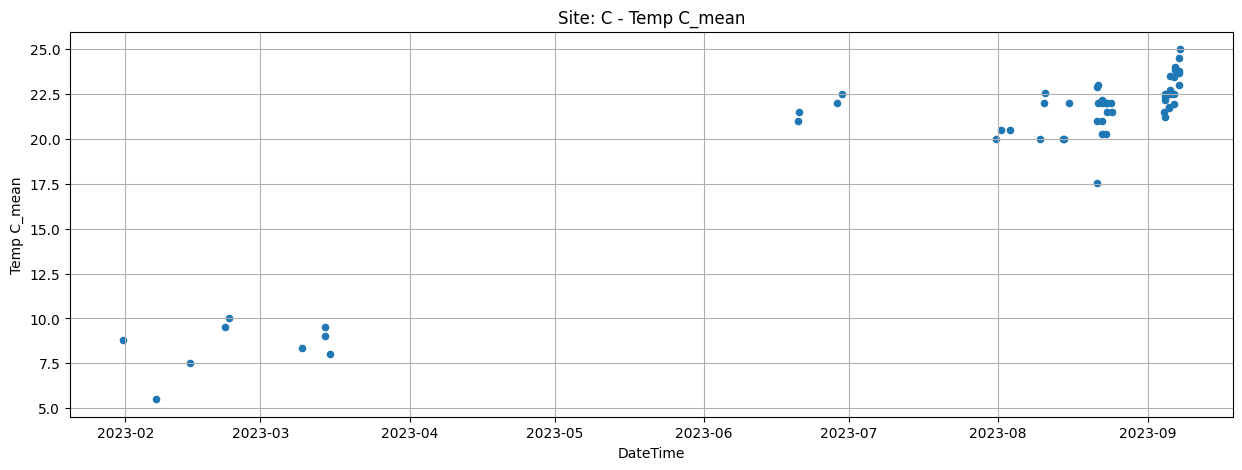

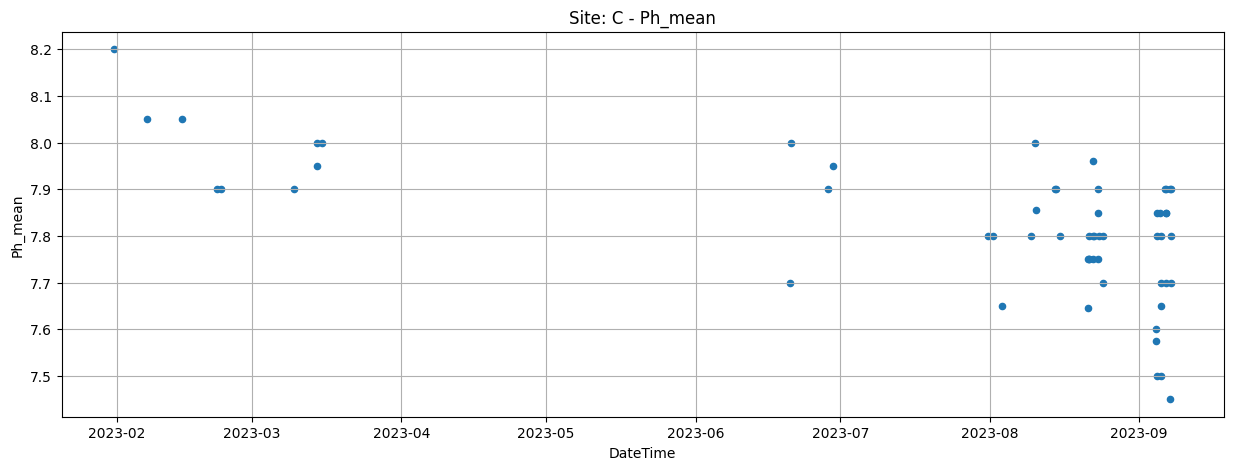

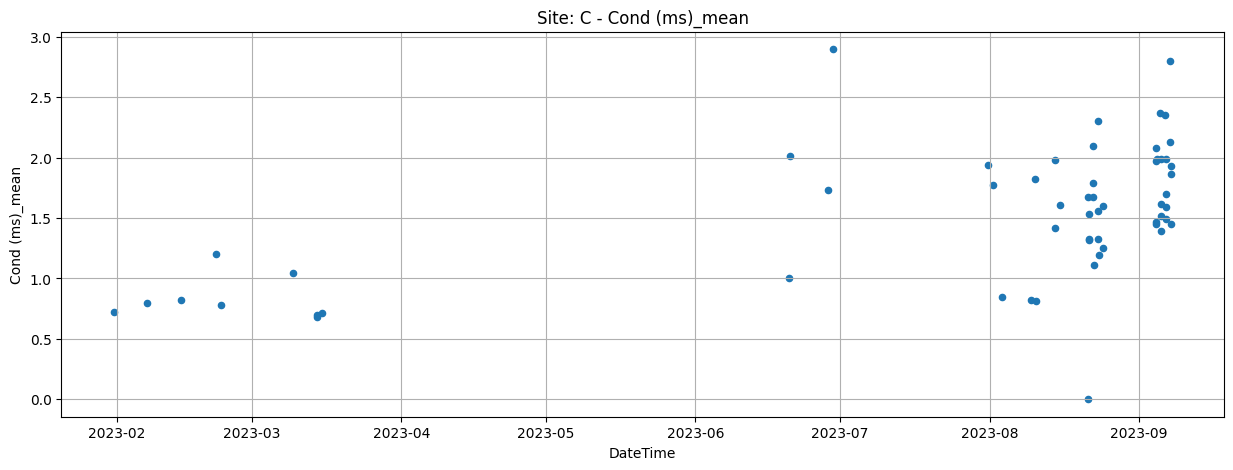

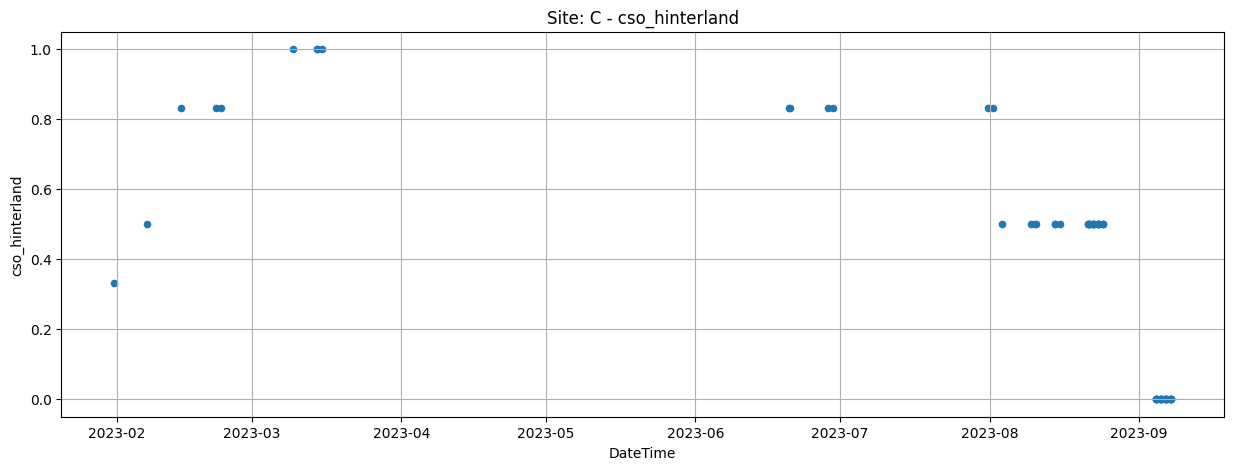

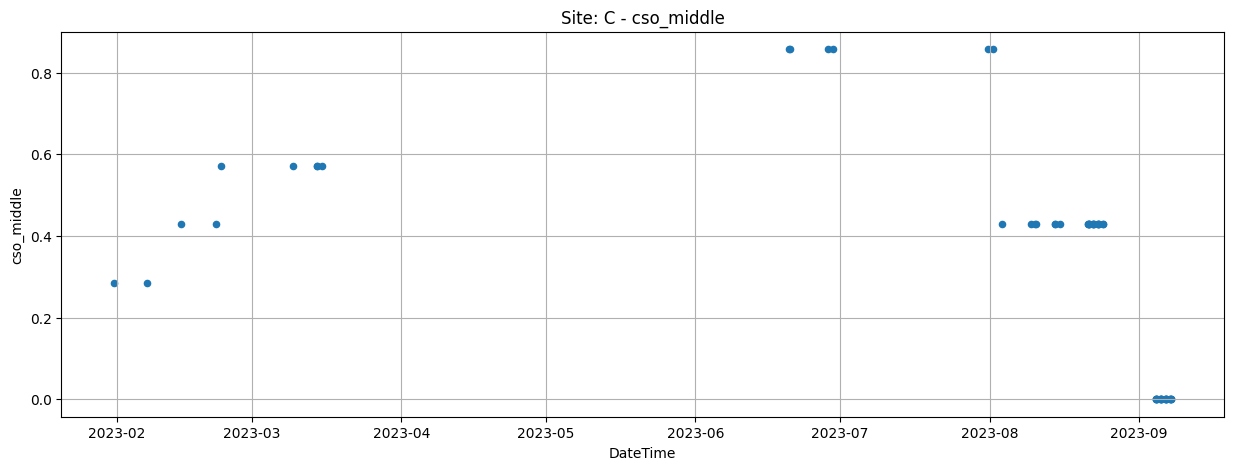

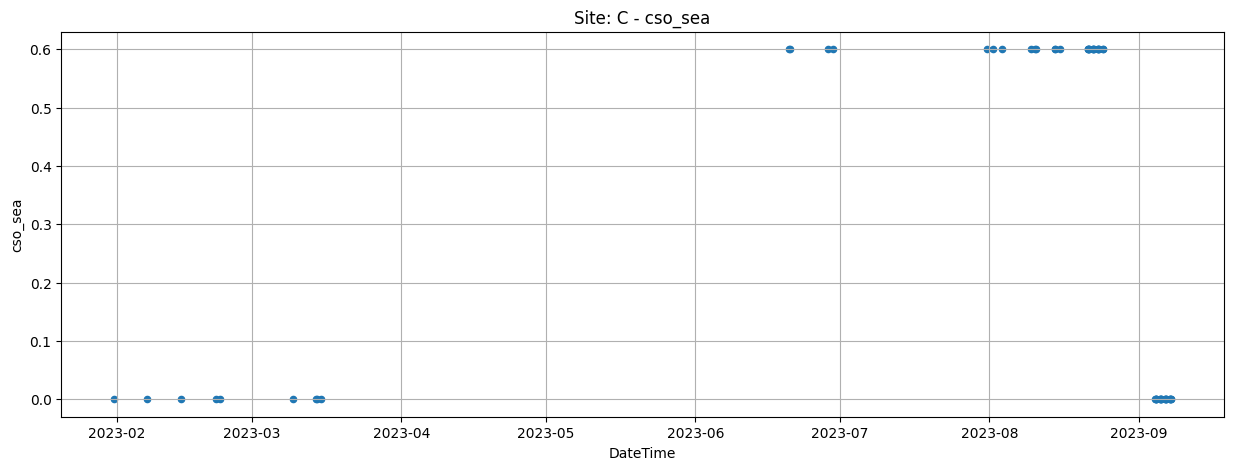

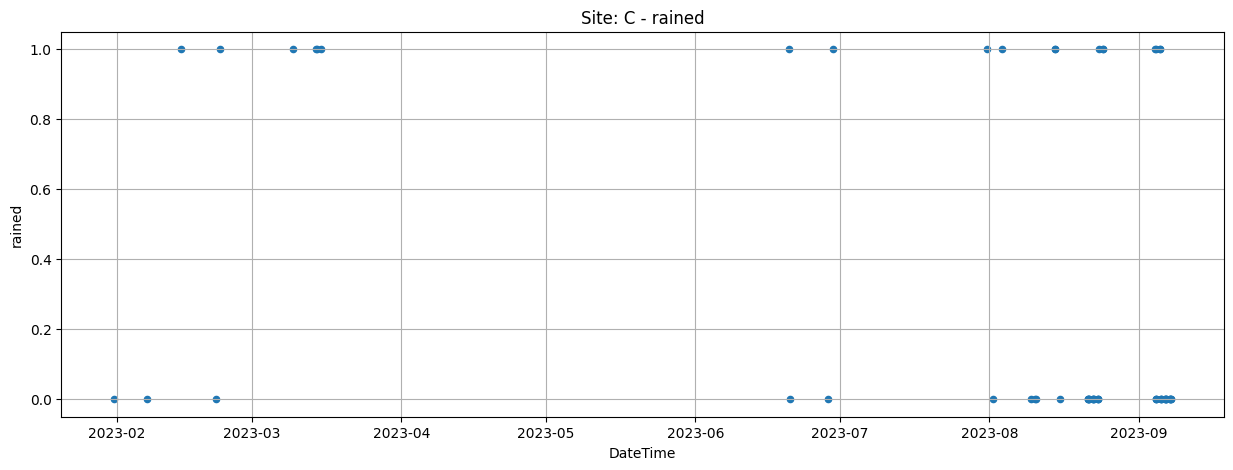

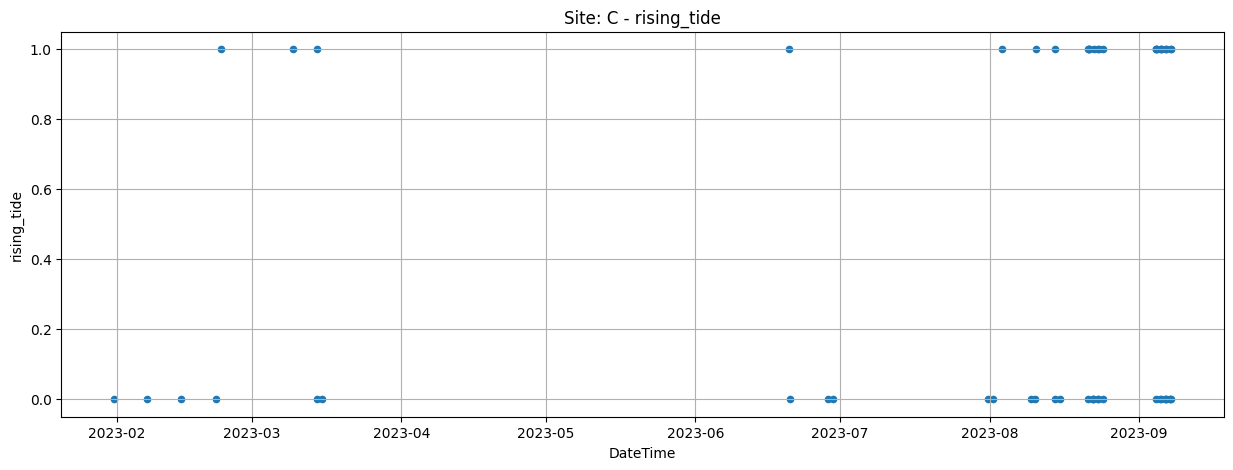

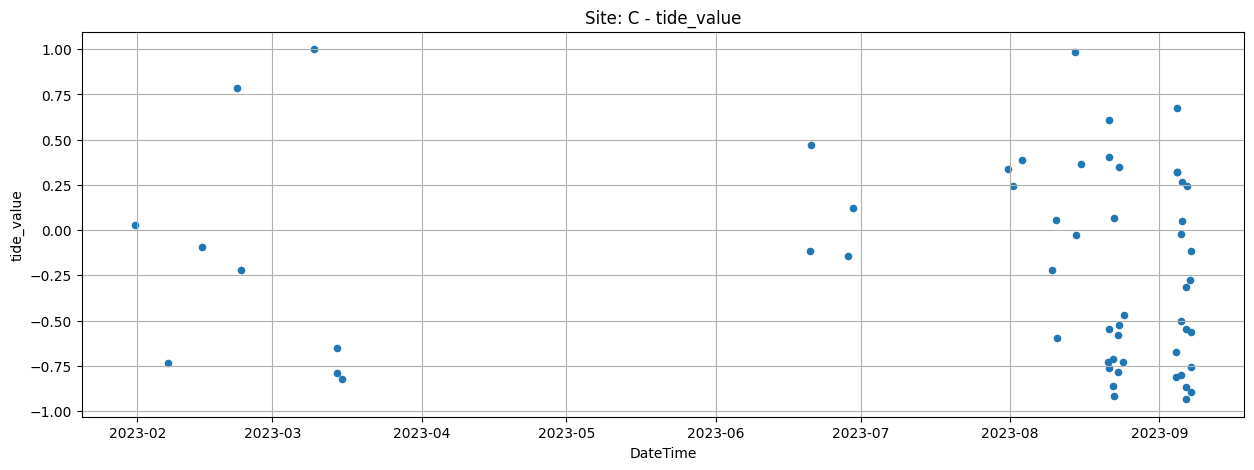

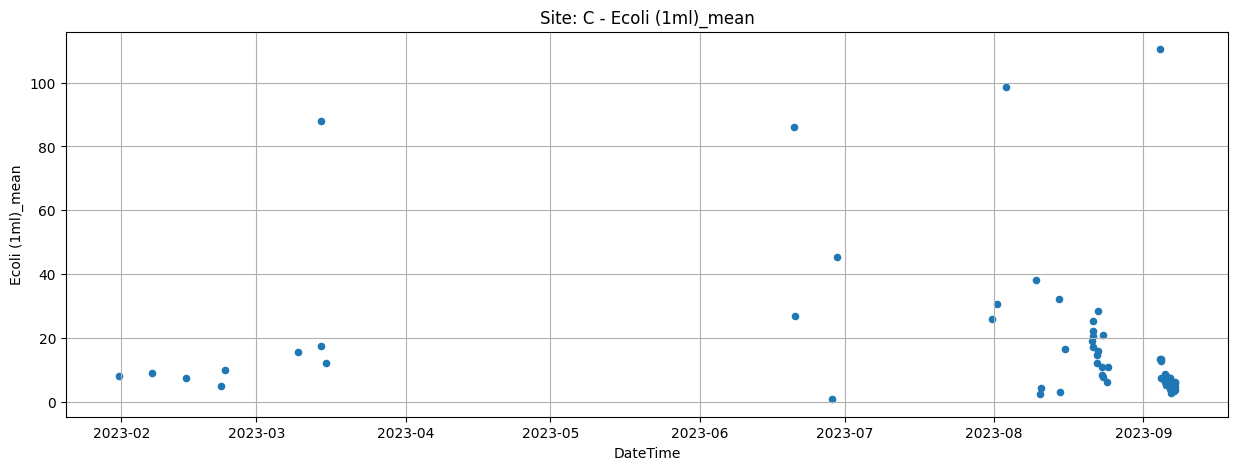

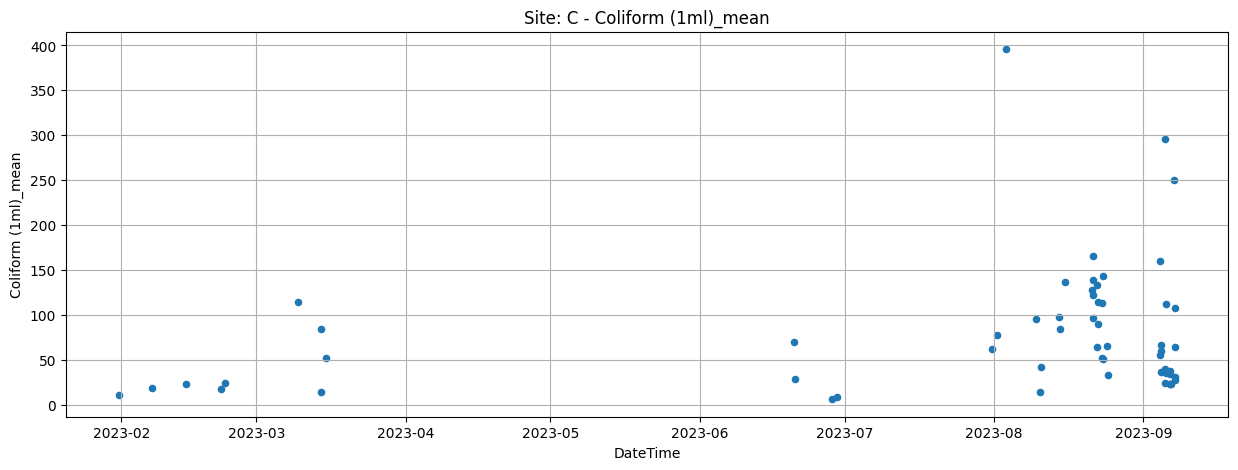

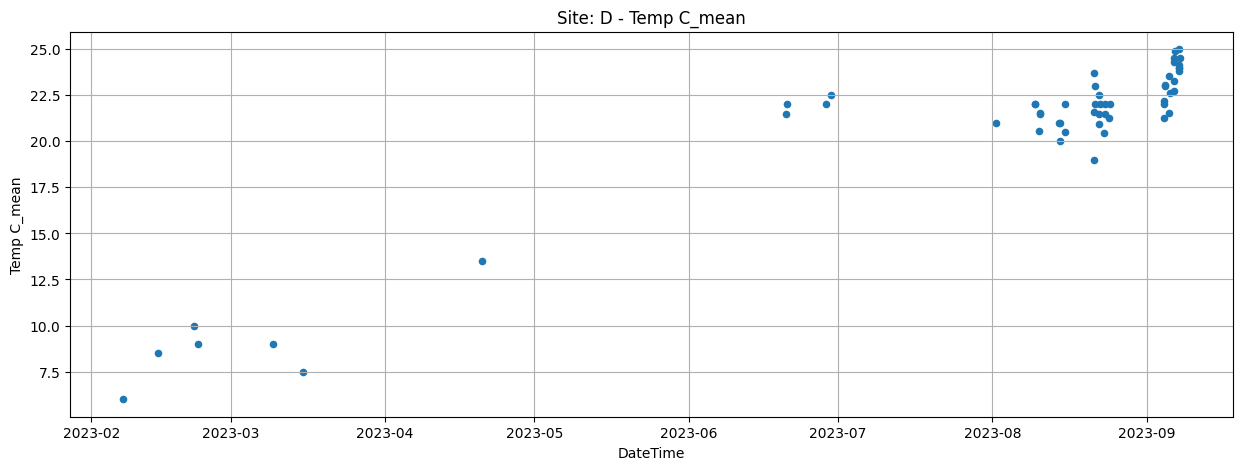

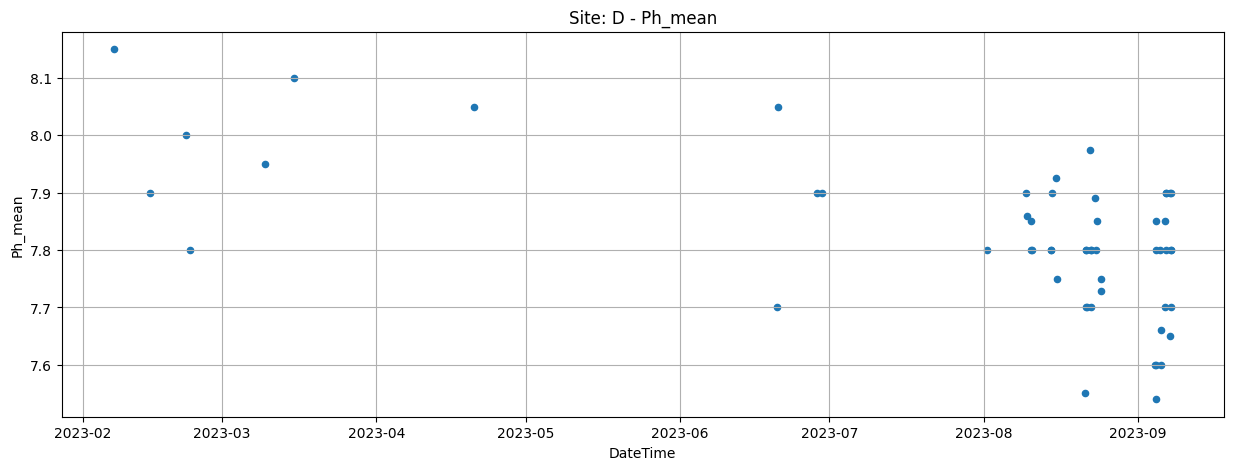

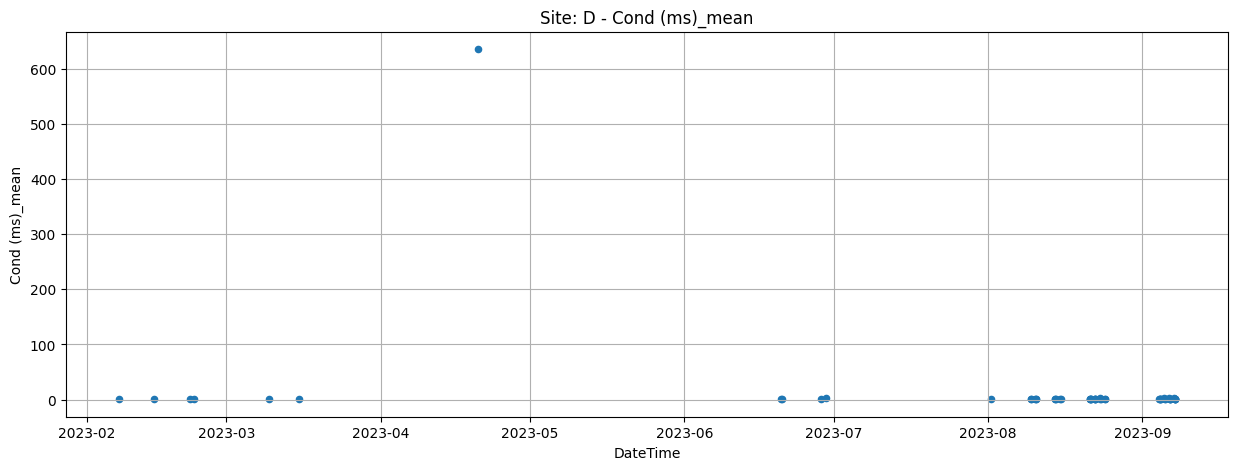

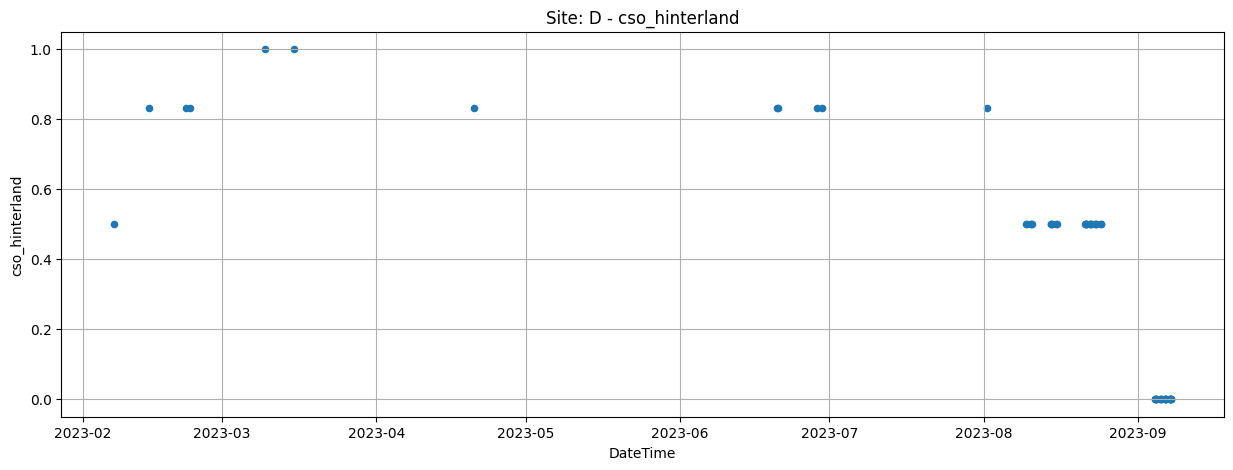

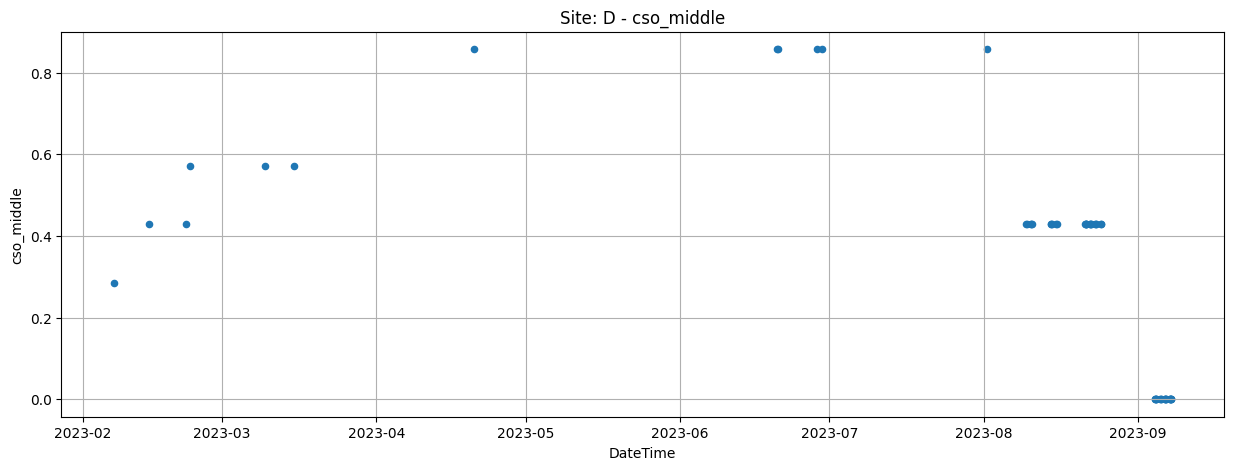

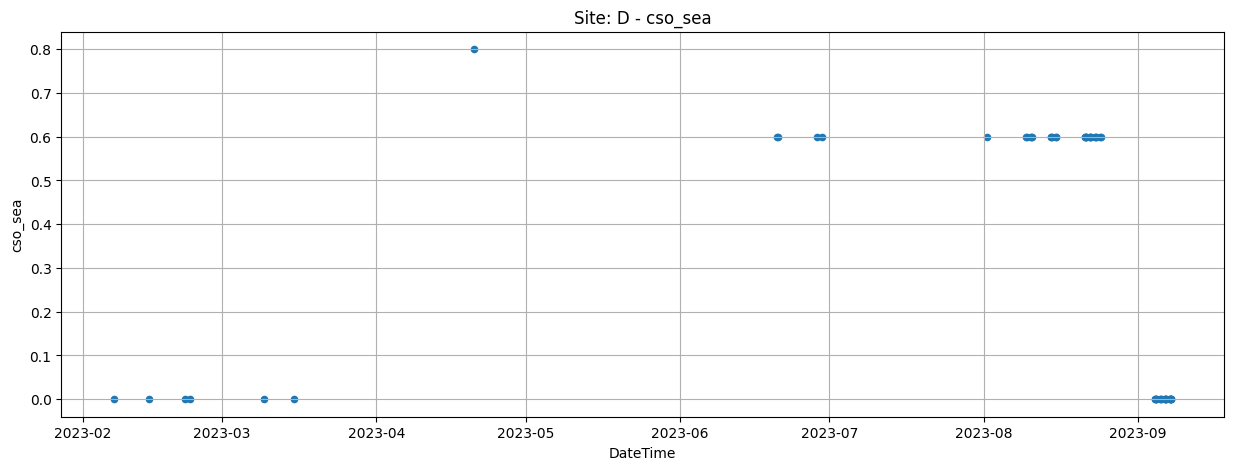

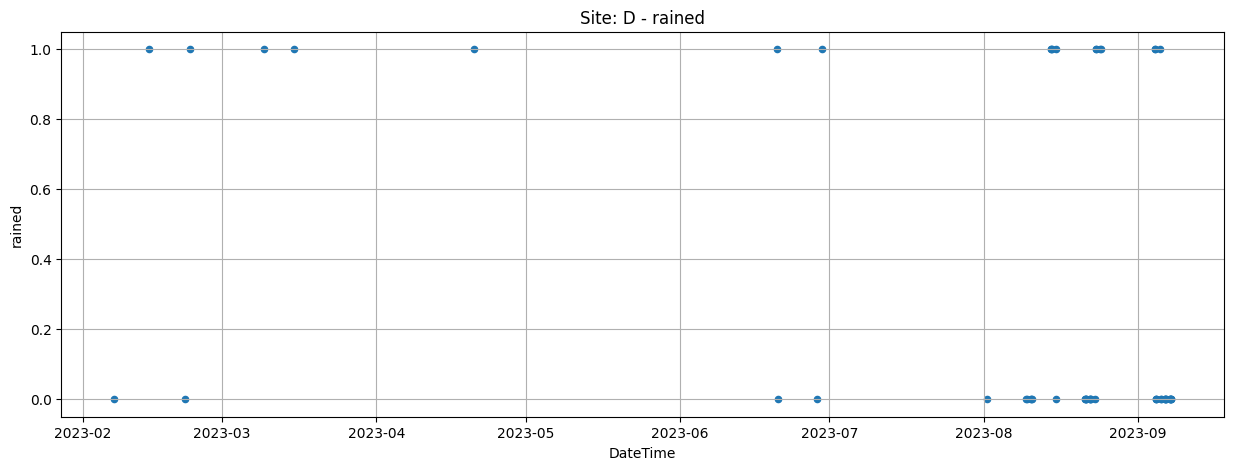

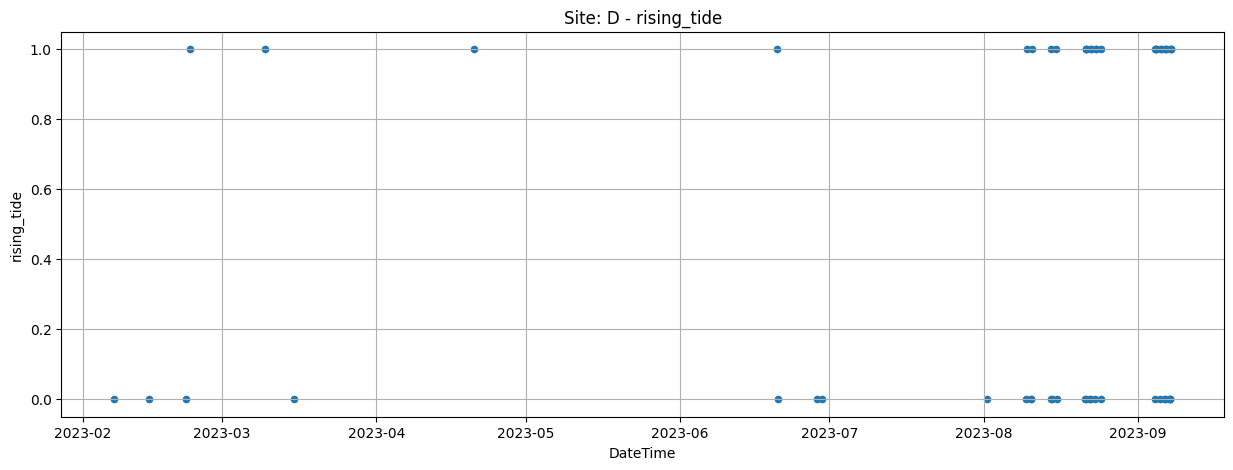

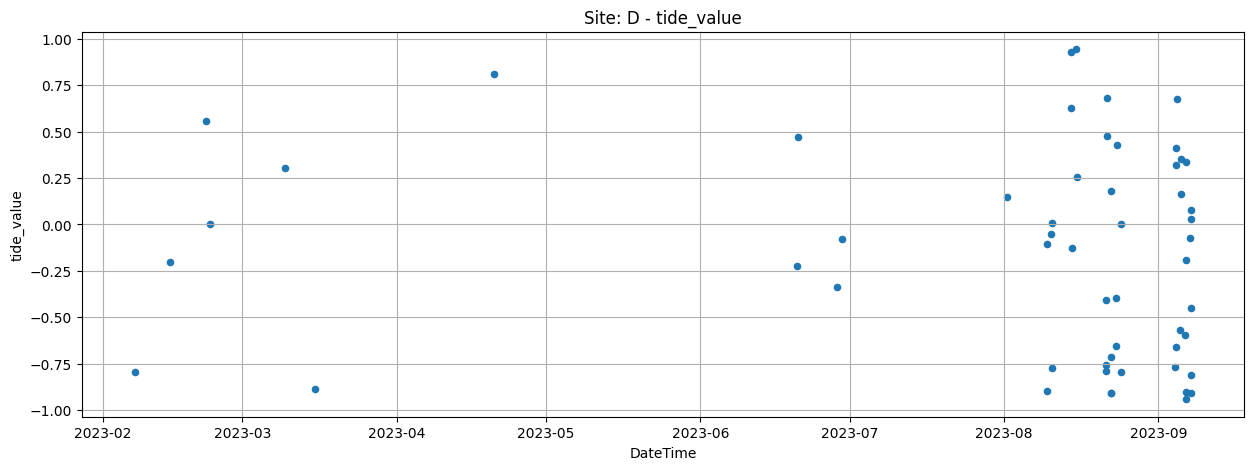

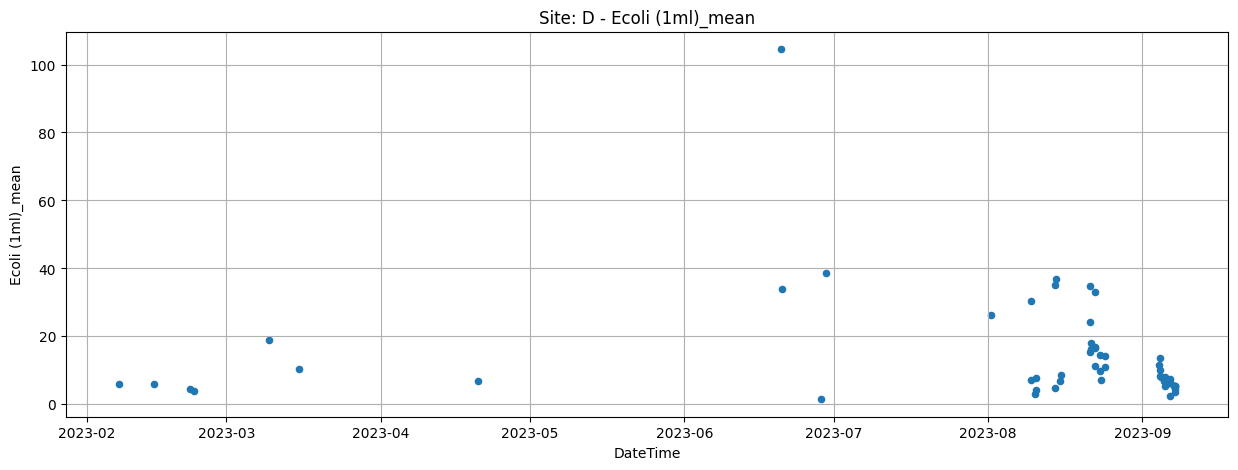

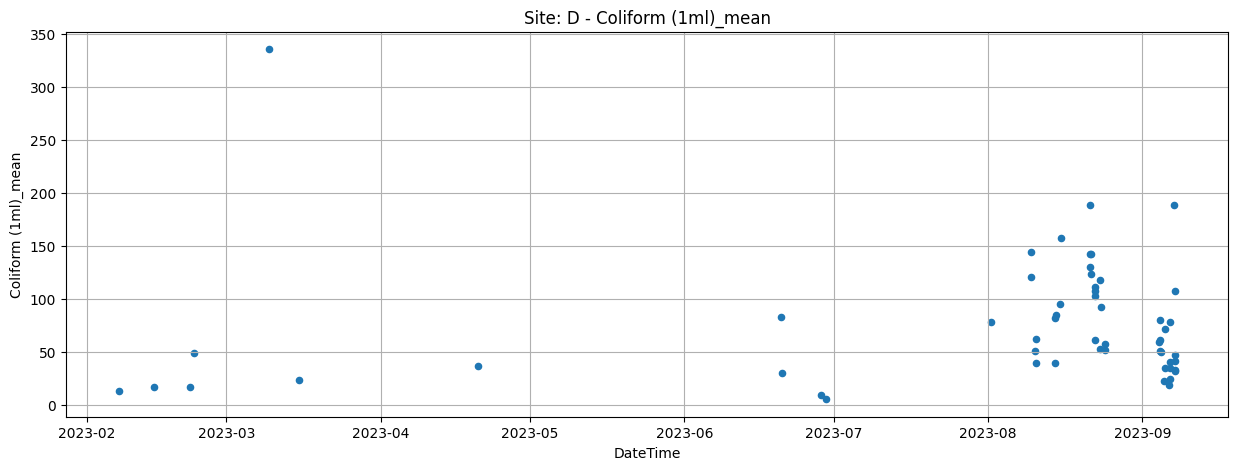

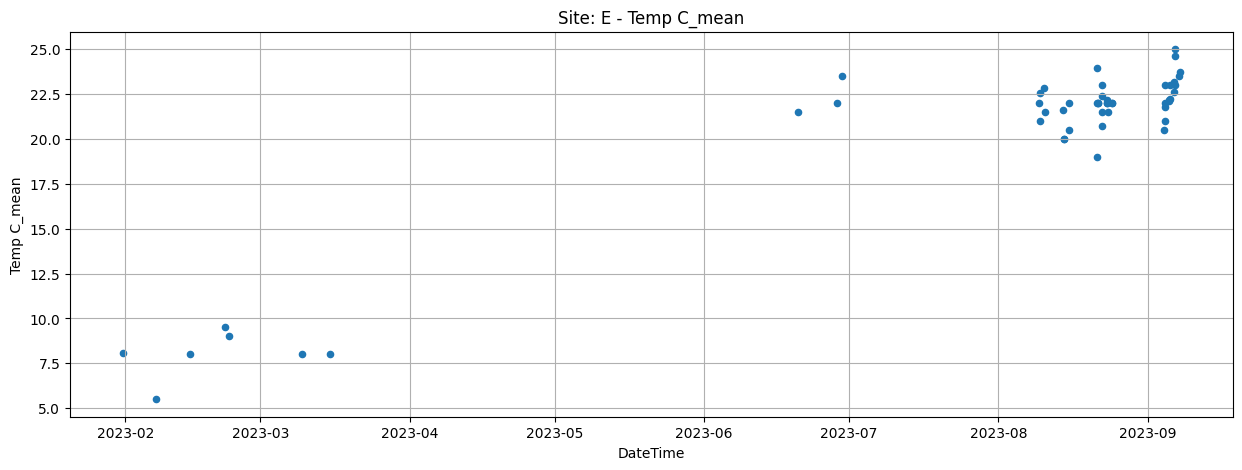

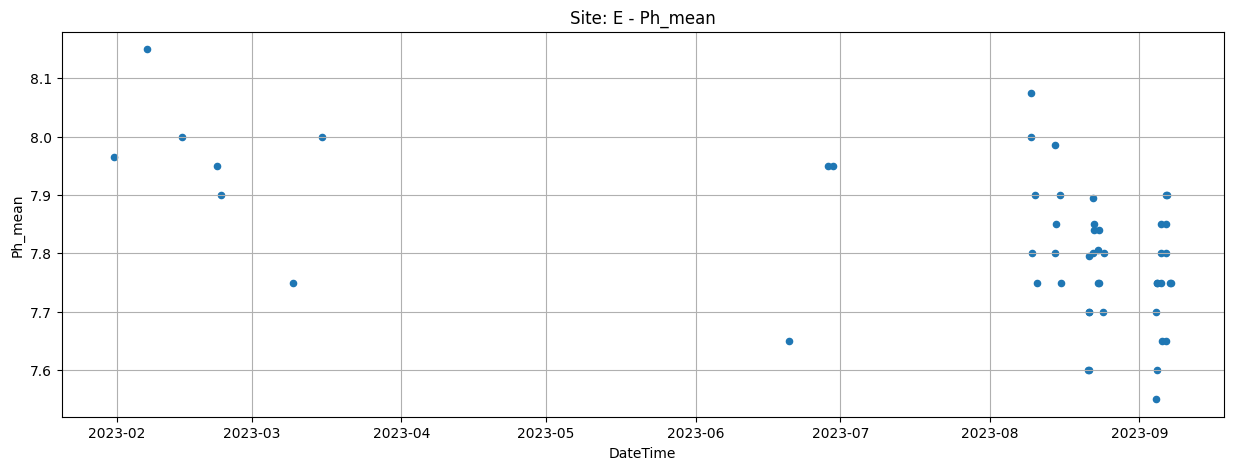

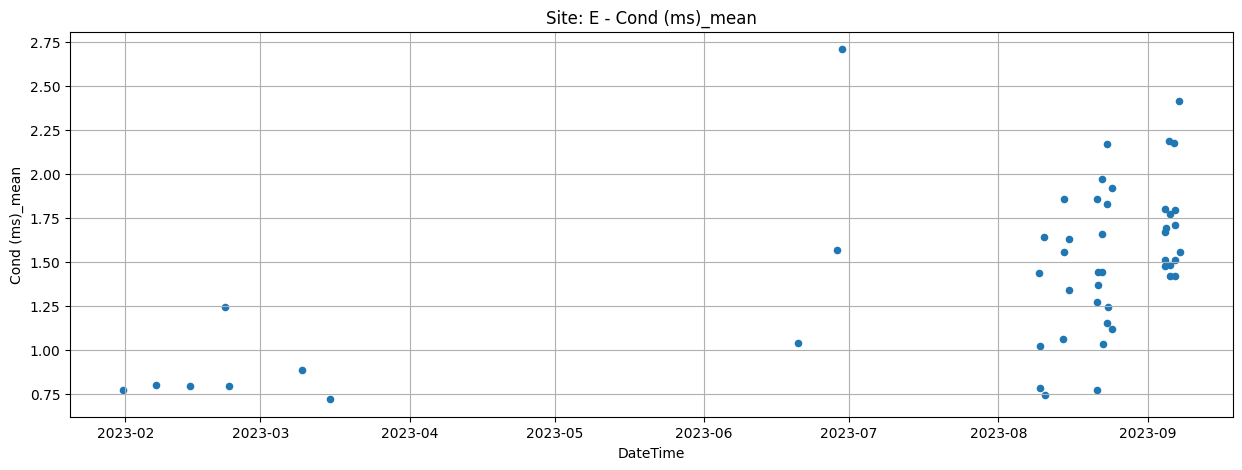

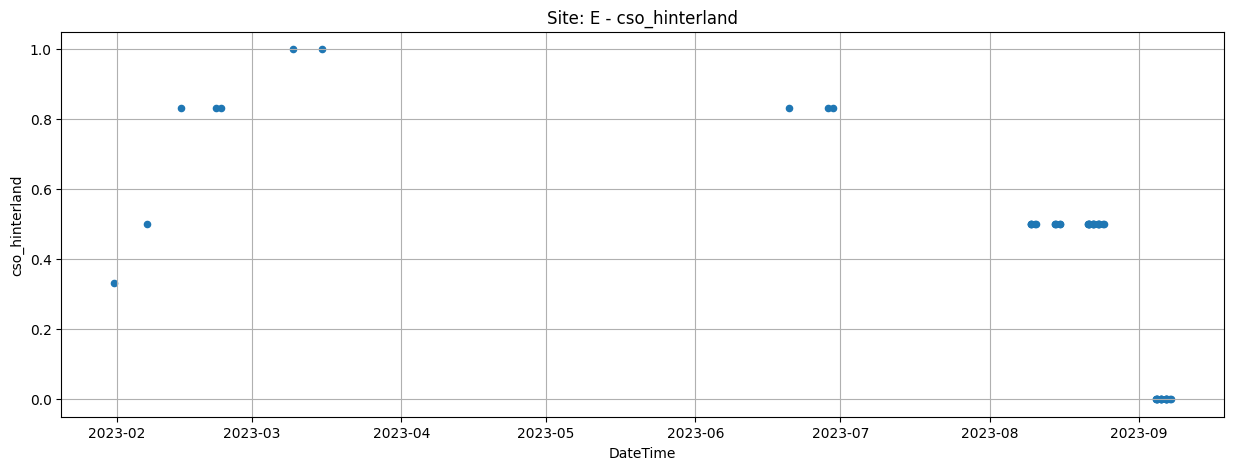

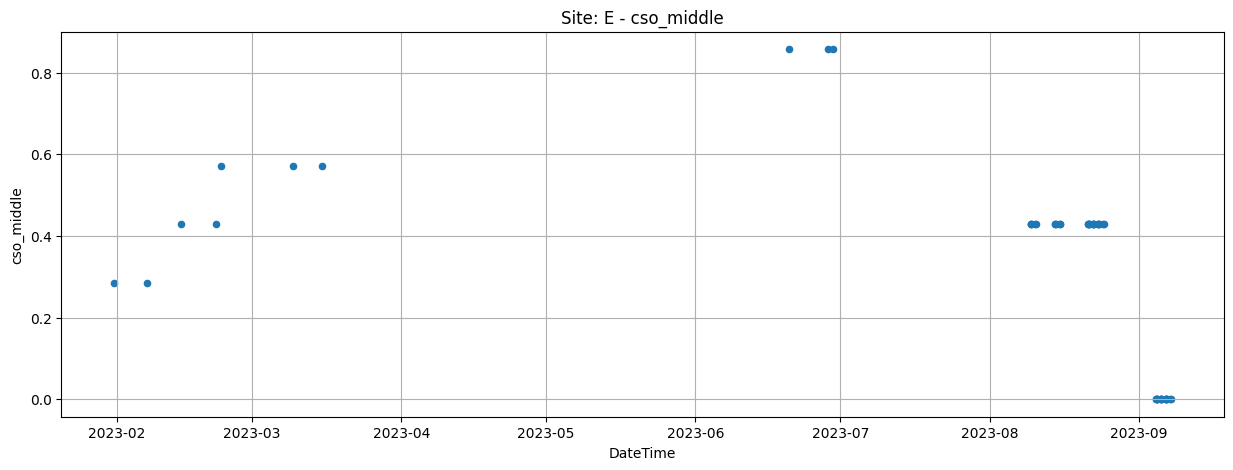

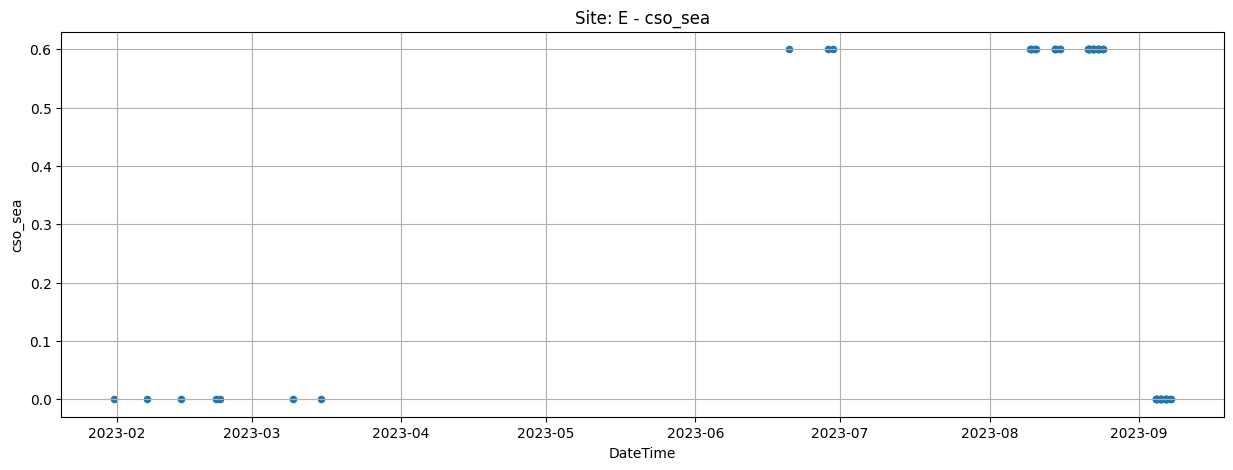

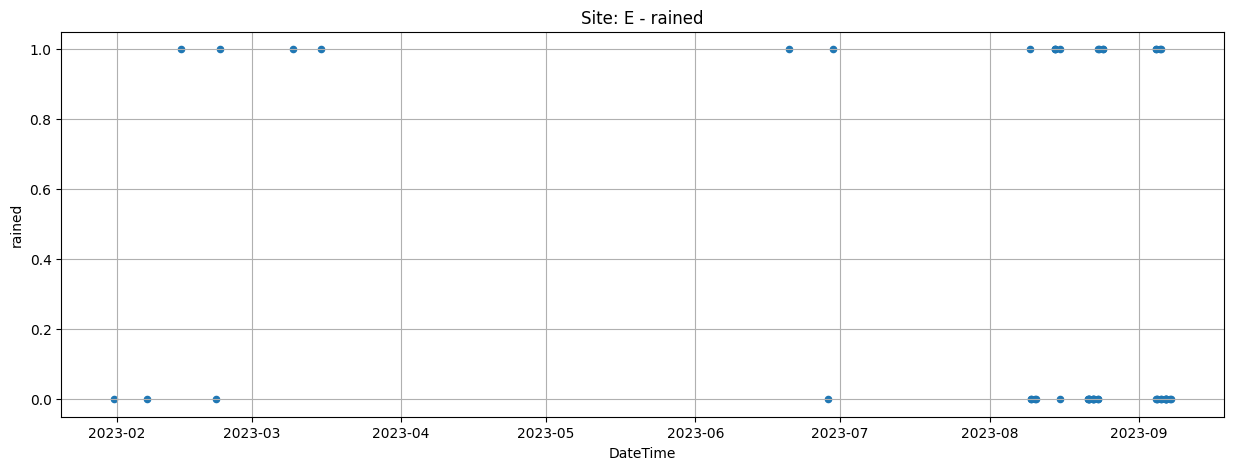

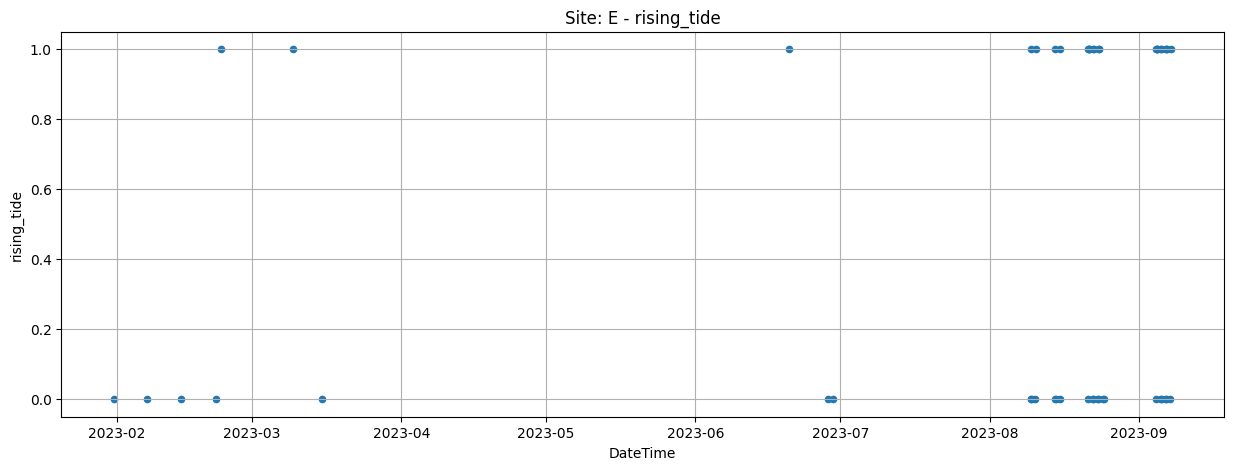

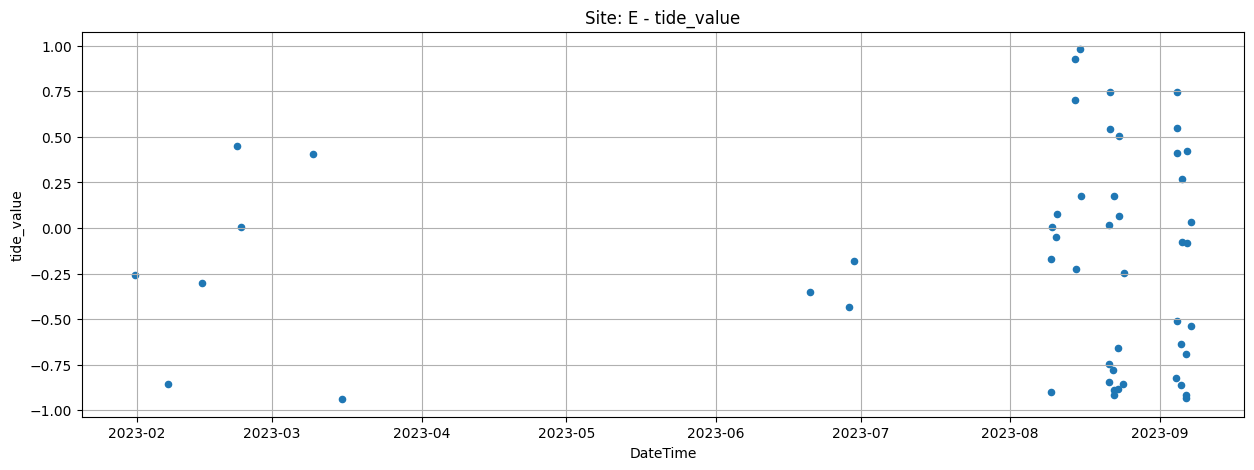

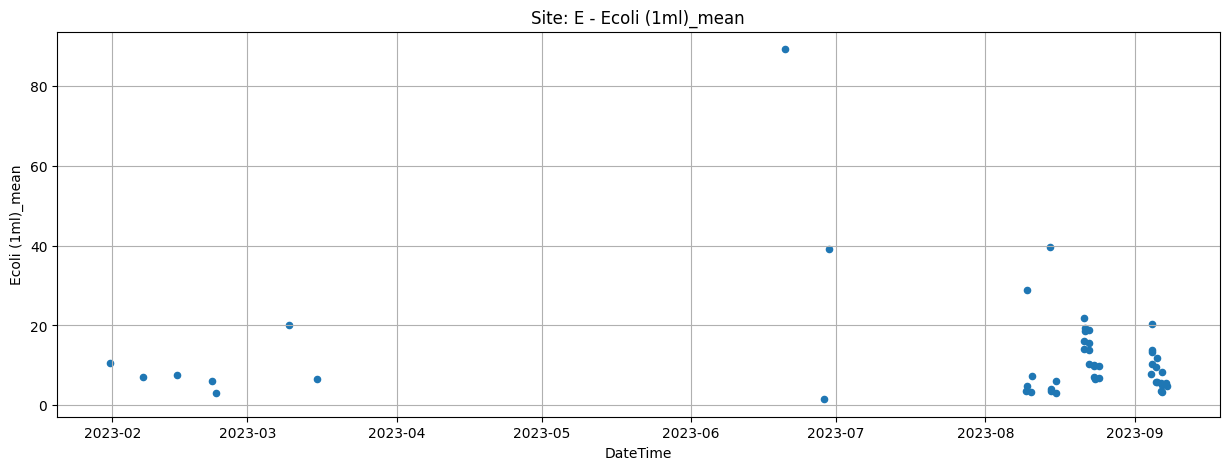

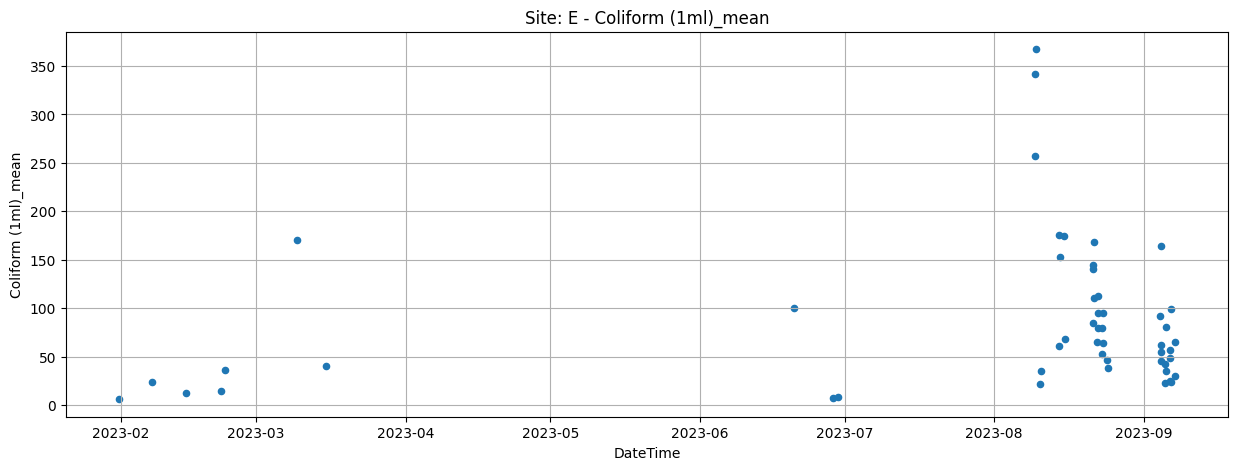

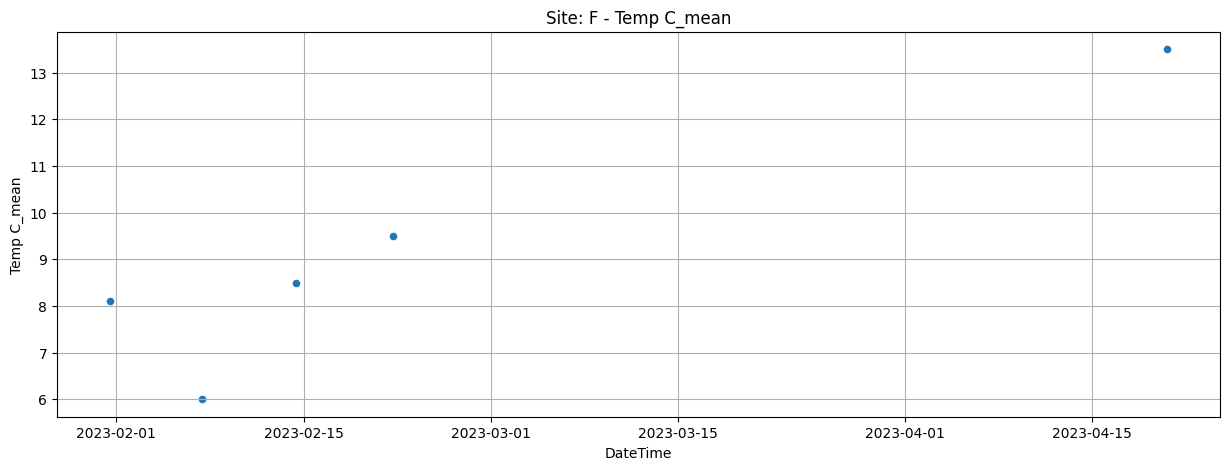

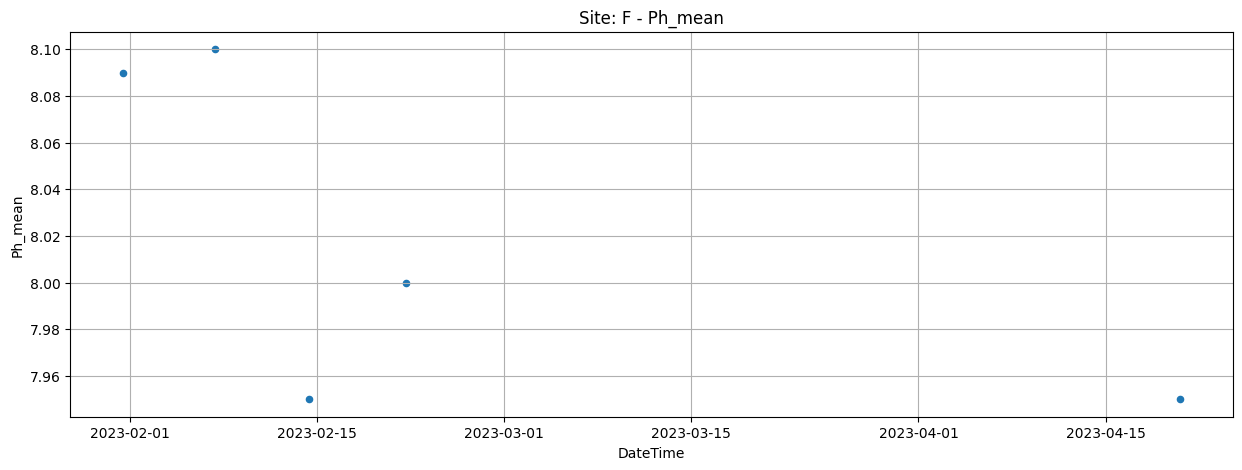

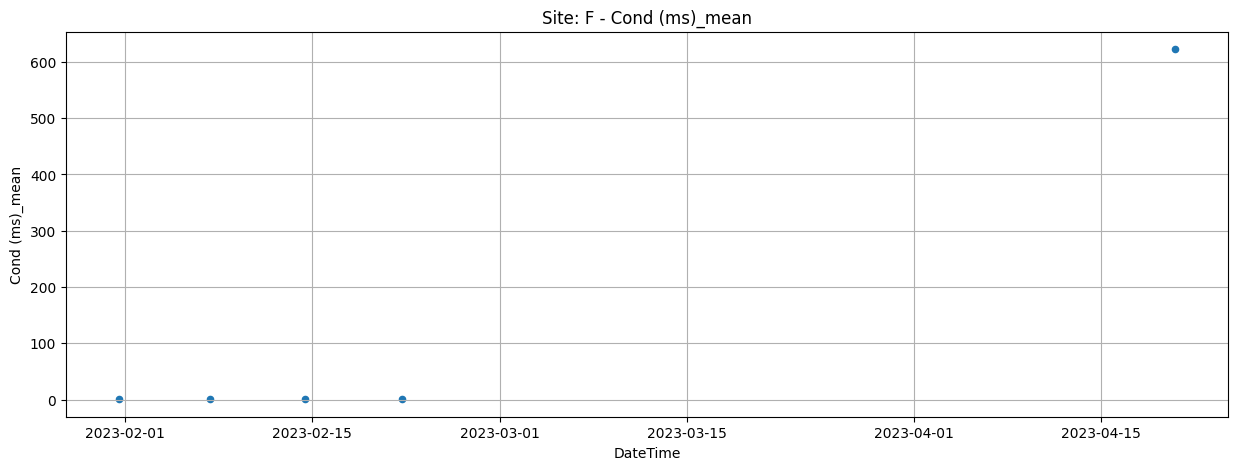

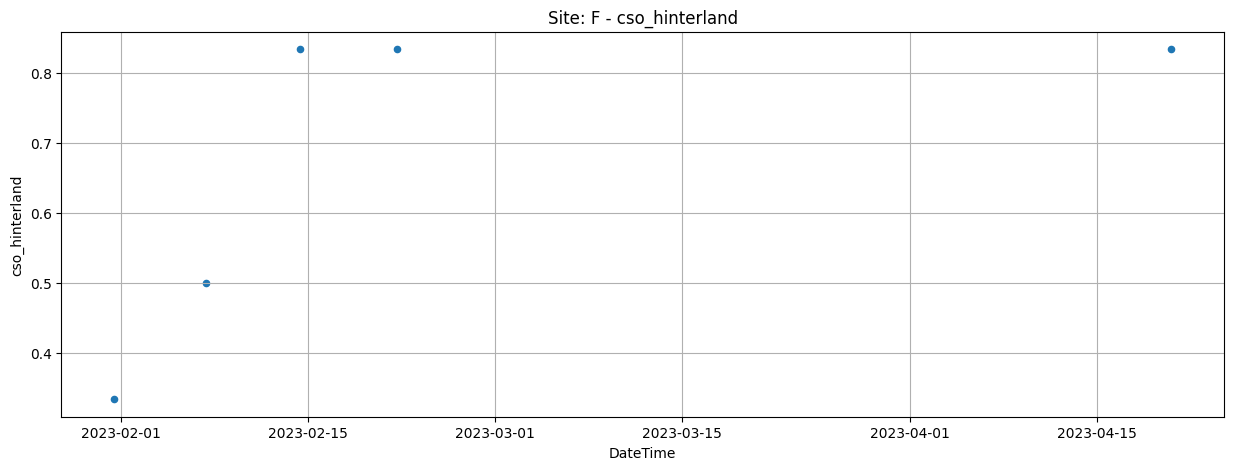

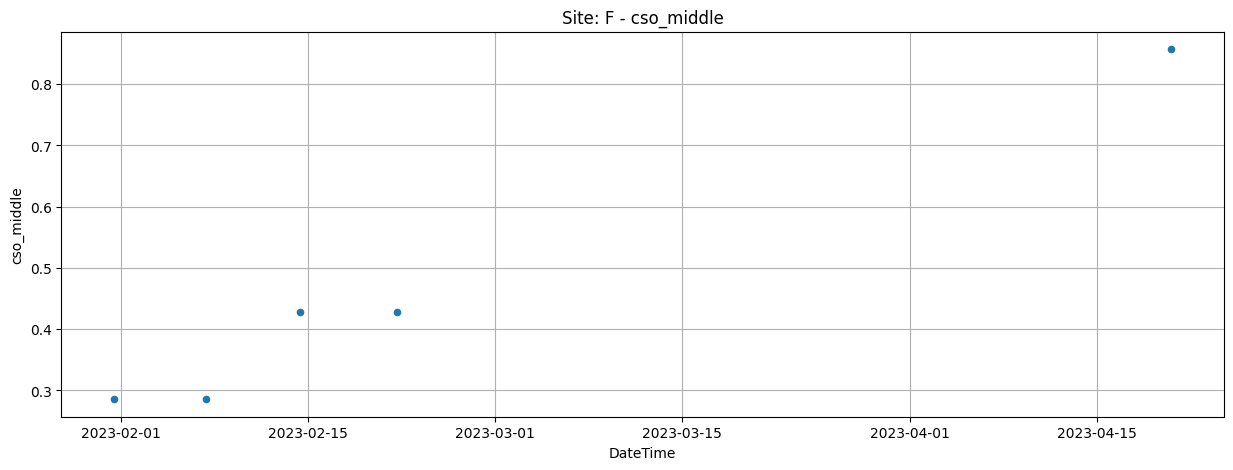

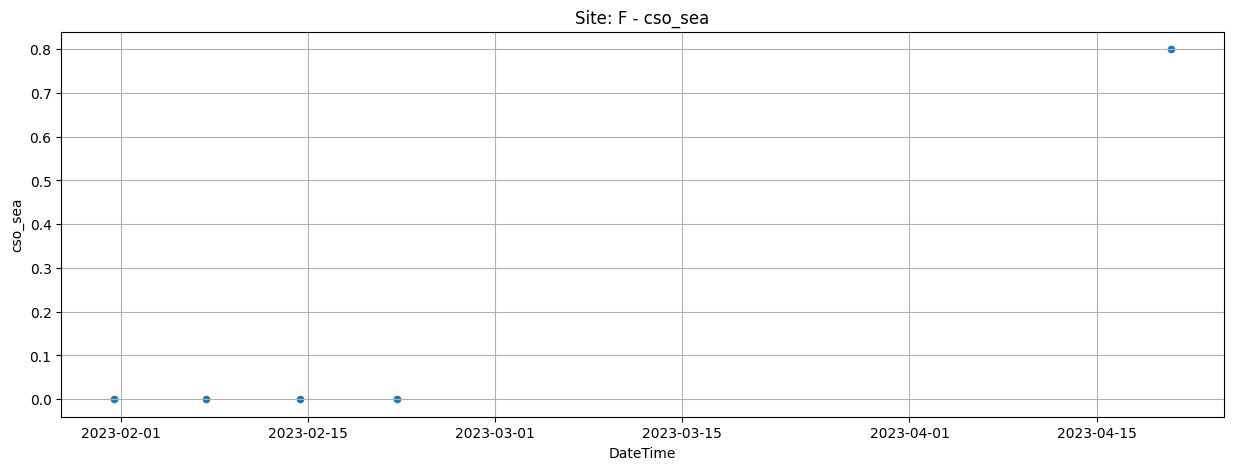

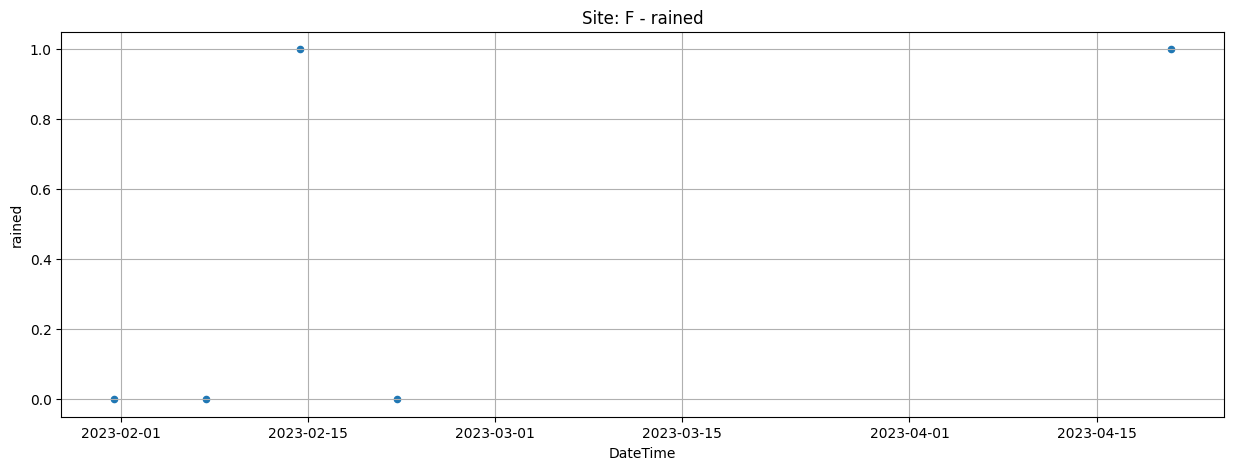

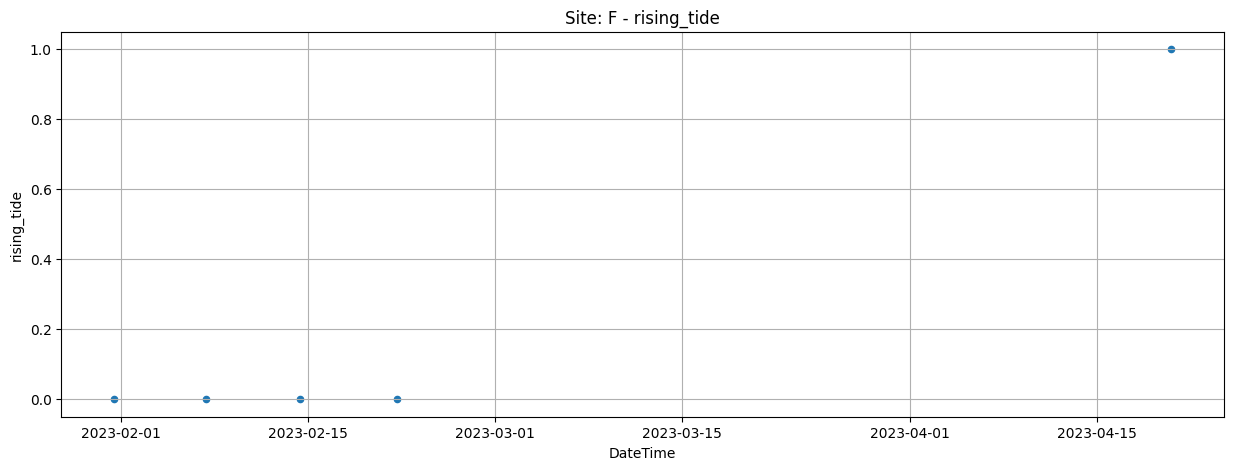

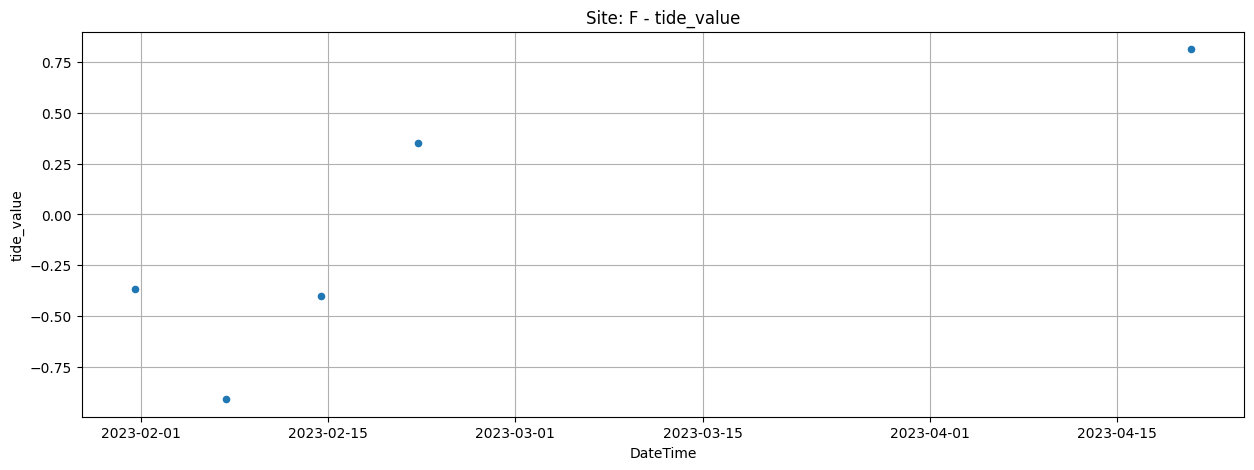

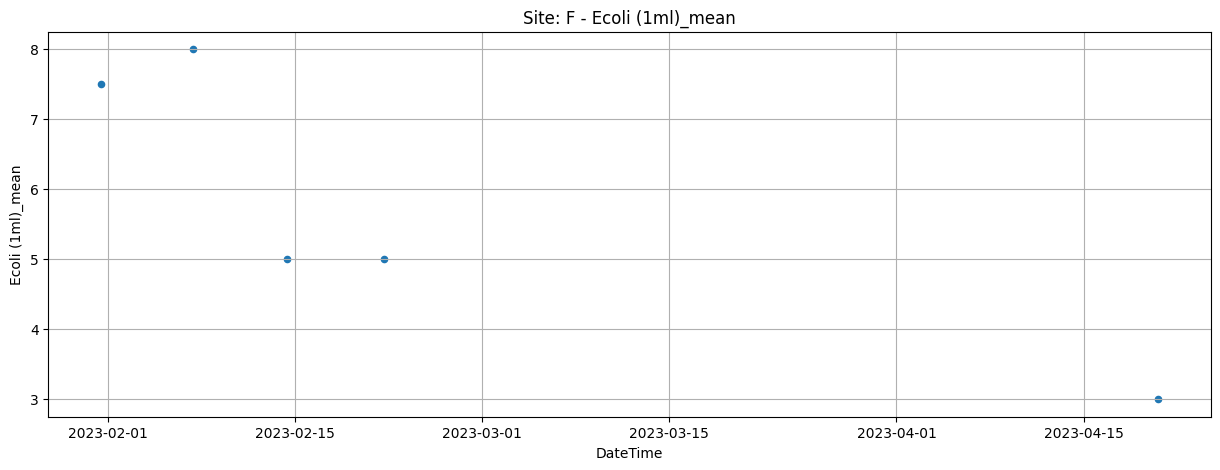

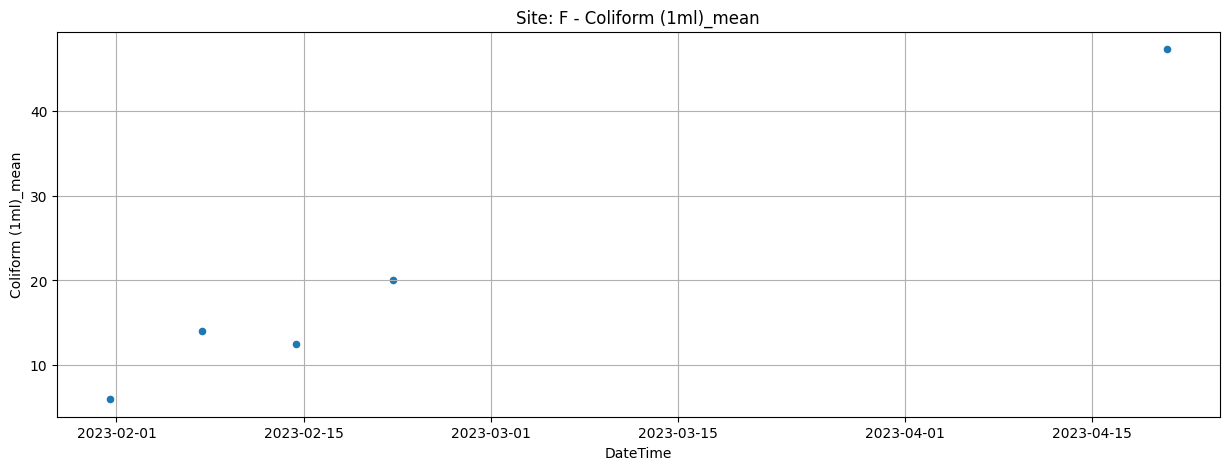

In [55]:
for site in site_dict:
    for col in analyze_columns:
        site_dict[site].plot(
            x="DateTime", y=col, figsize=(15, 5), grid=True, kind="scatter"
        )
        plt.title("Site: " + site + " - " + col)